In [5]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [6]:
L = 0.1                         # Length of rod
n = 10                        # number of points on the rod
T0 = 0                       # Initial temperature for internal points
T1s = 40
T2s = 20
dx = L/n                      # number of time steps
alpha = 0.0001                   # Diffusion Coefficient
t_final = 45
dt = 0.1

x = np.linspace(0,L,n) #-dx/2

T = np.ones(n)*T0
T = -200*x+40
dTdt = np.empty(n)

t = np.arange(0, t_final,dt)

Total_T=[]
Total_T.append(T)
plt.figure()
plt.ion()

<Figure size 432x288 with 0 Axes>

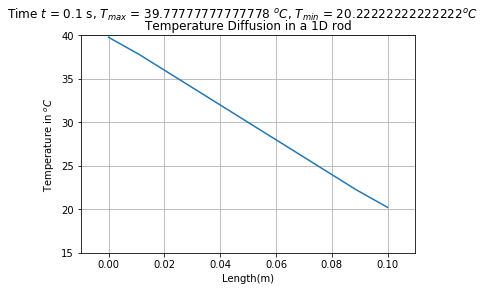

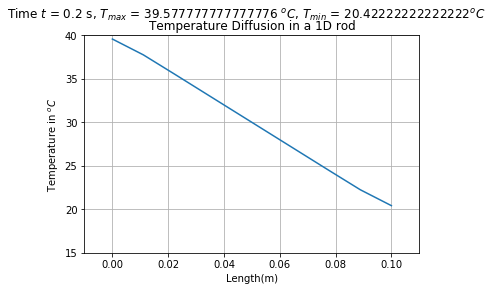

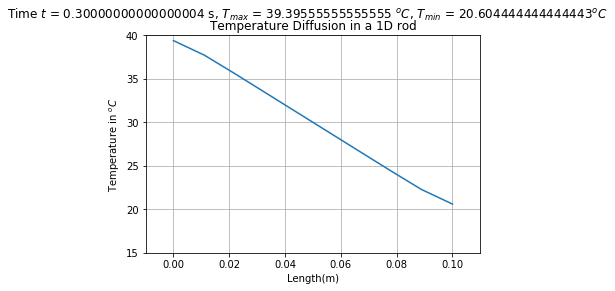

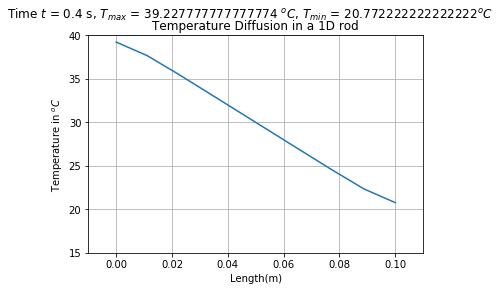

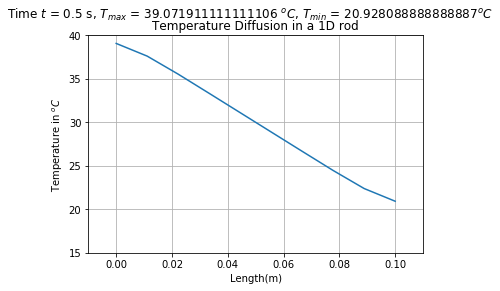

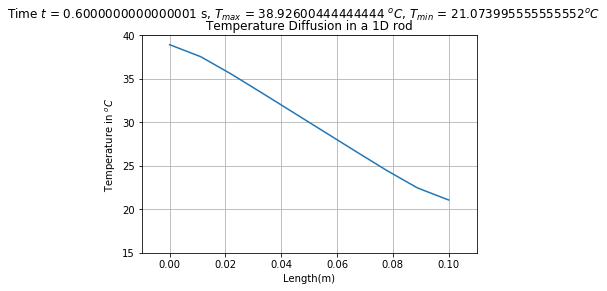

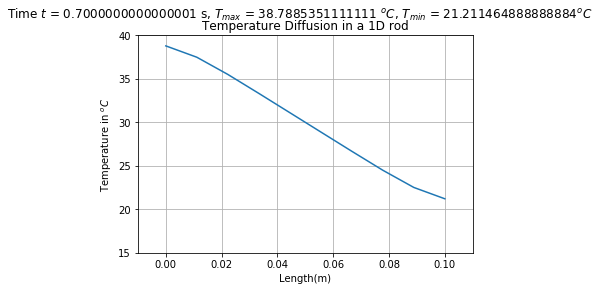

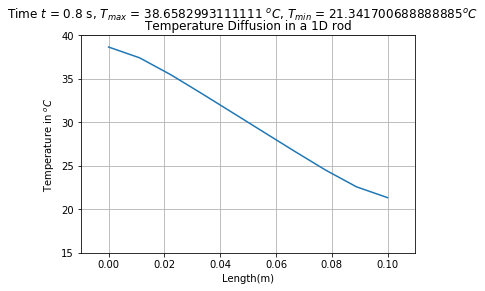

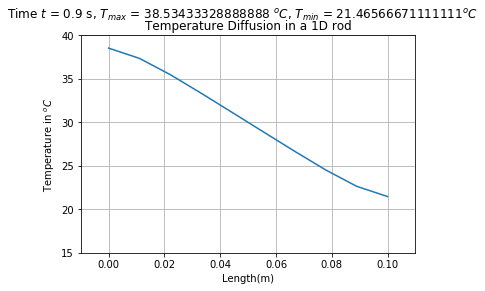

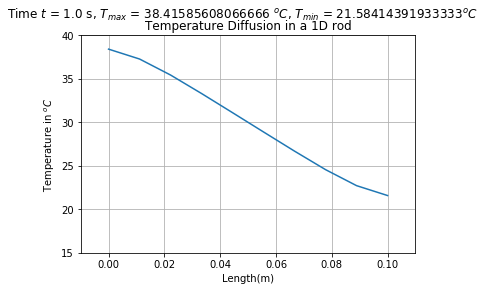

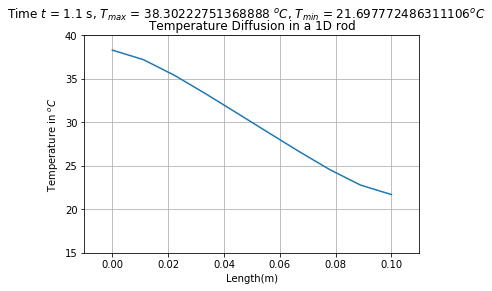

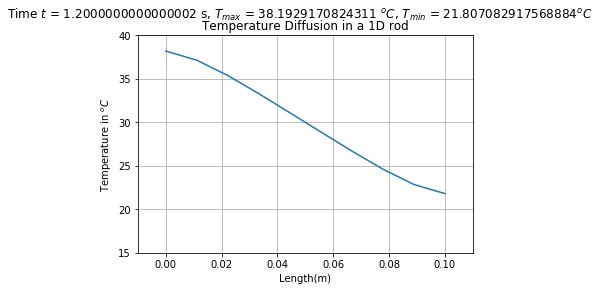

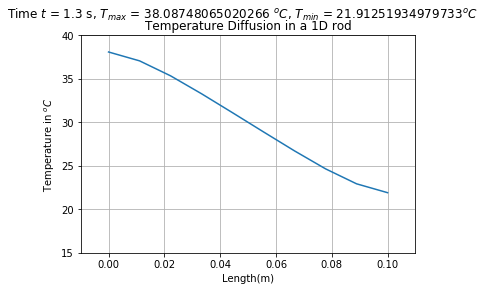

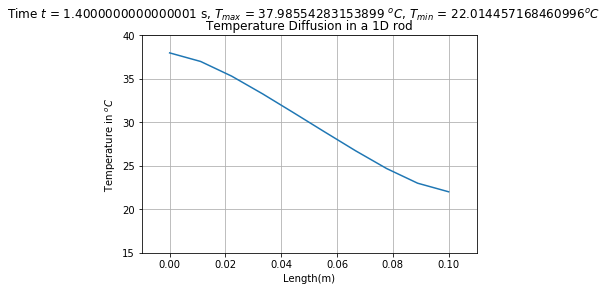

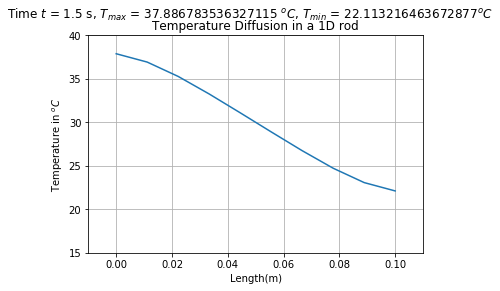

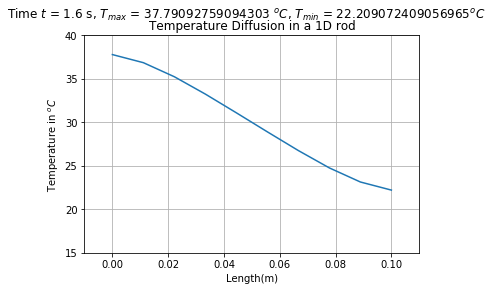

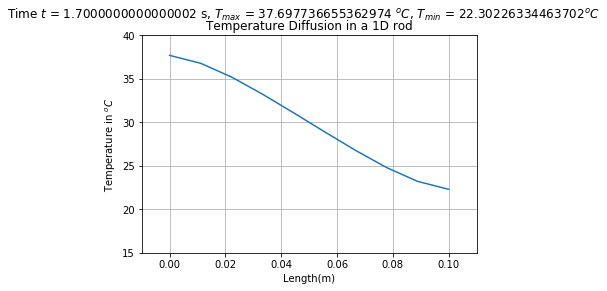

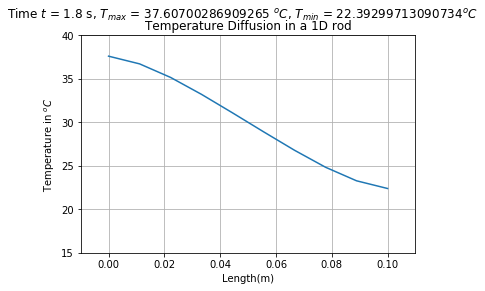

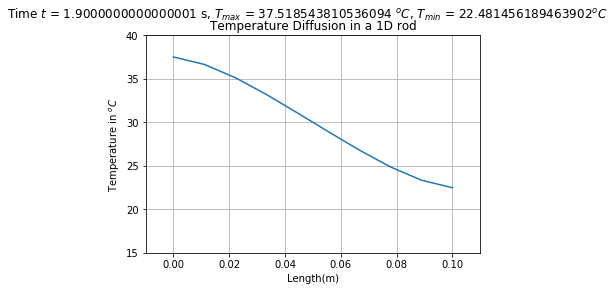

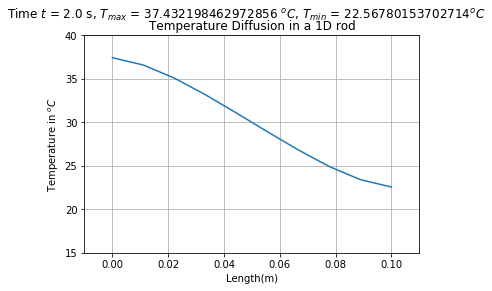

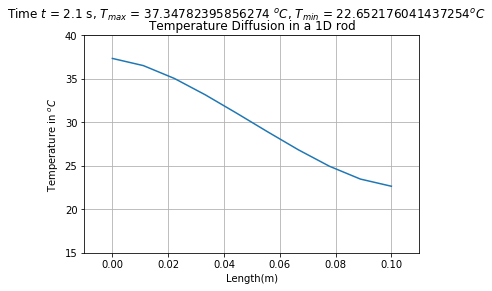

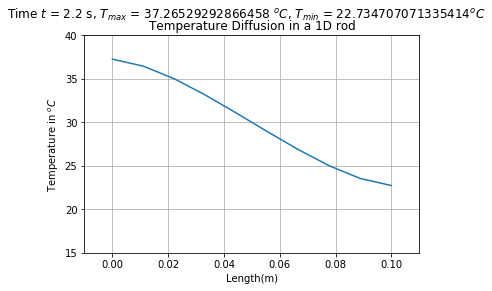

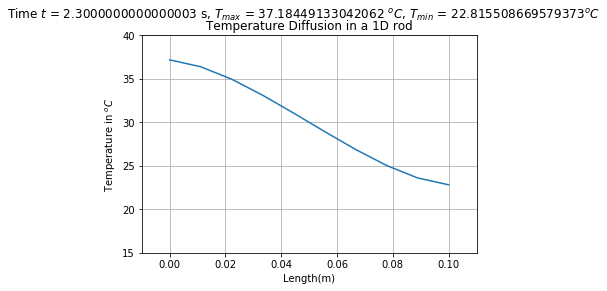

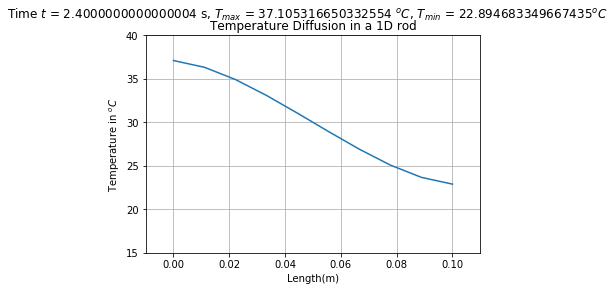

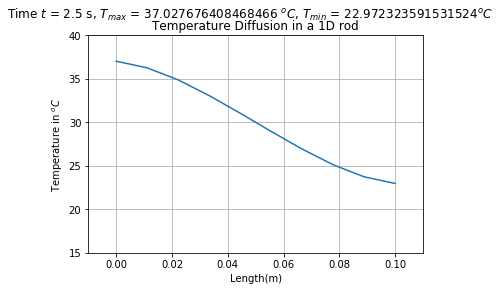

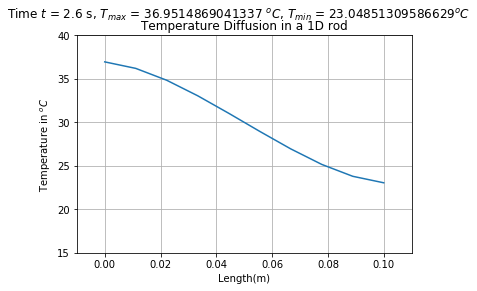

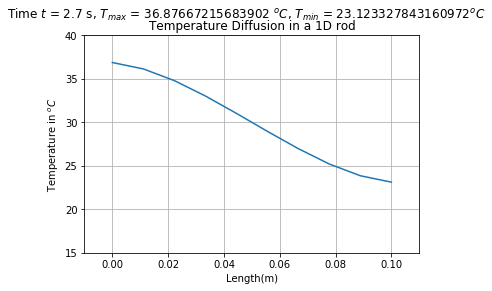

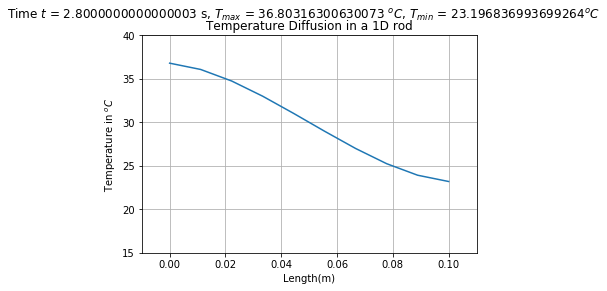

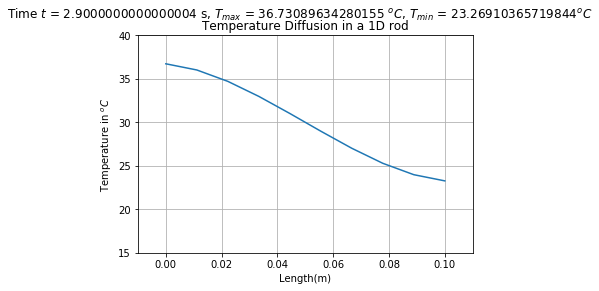

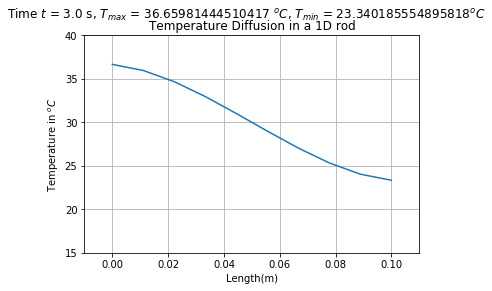

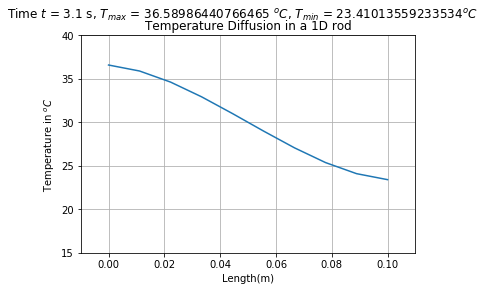

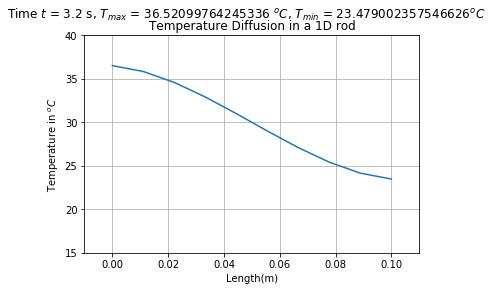

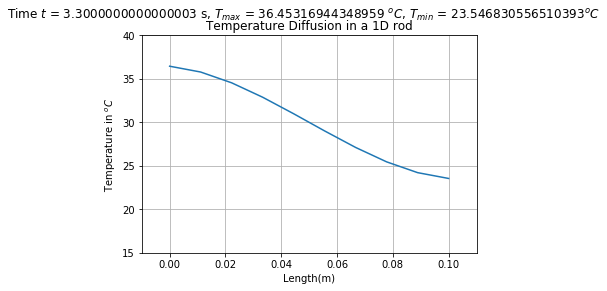

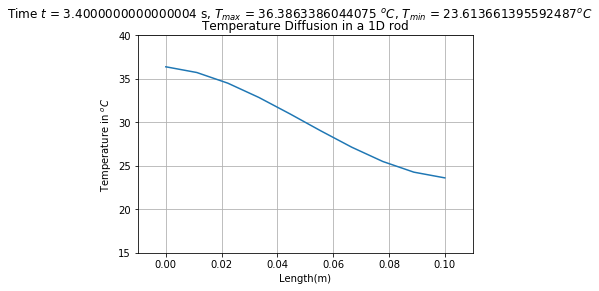

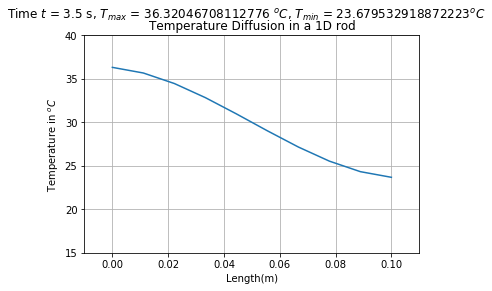

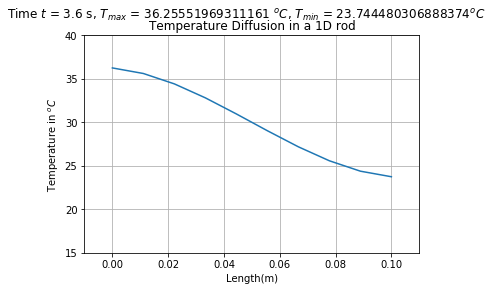

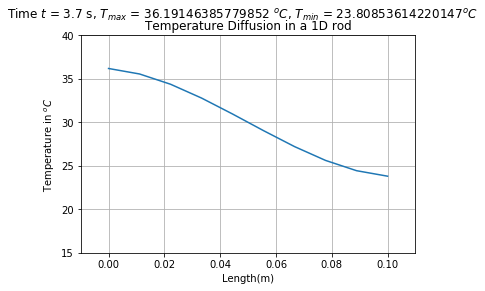

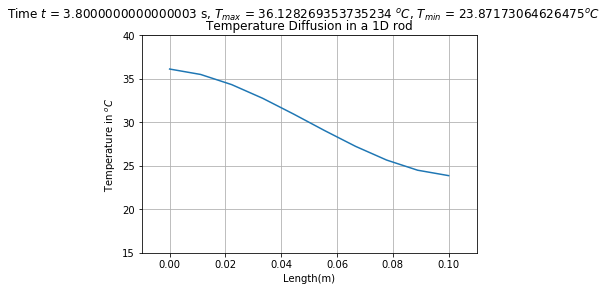

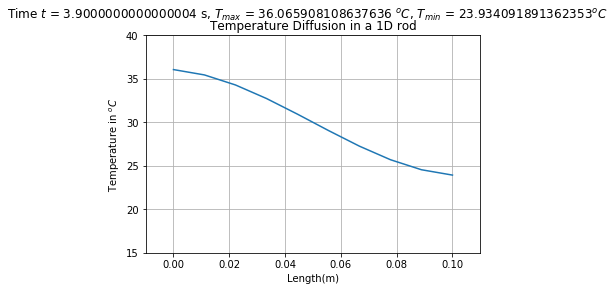

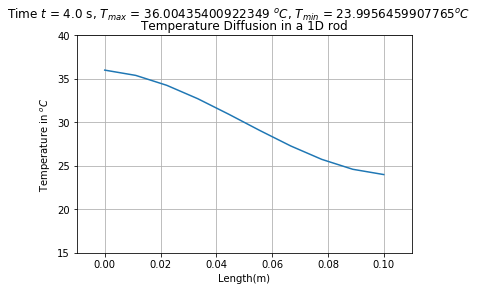

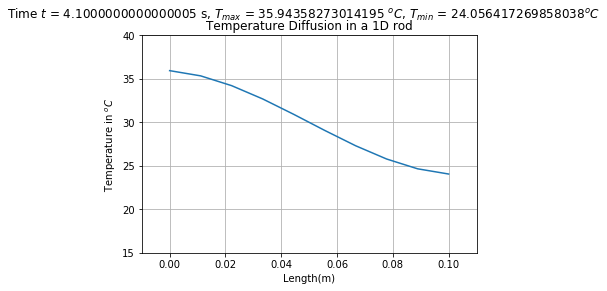

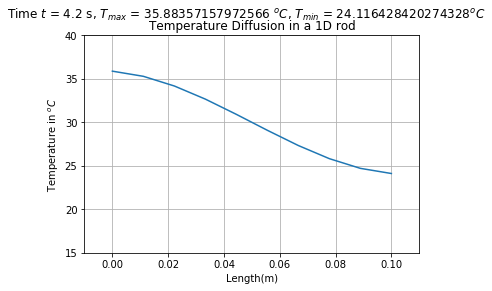

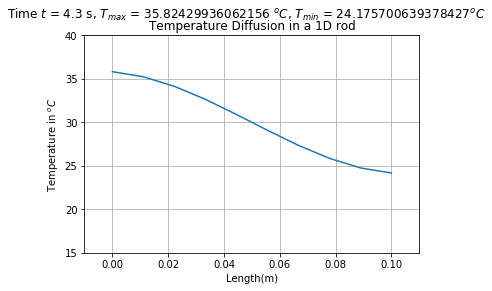

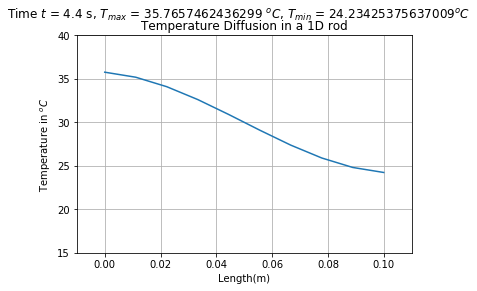

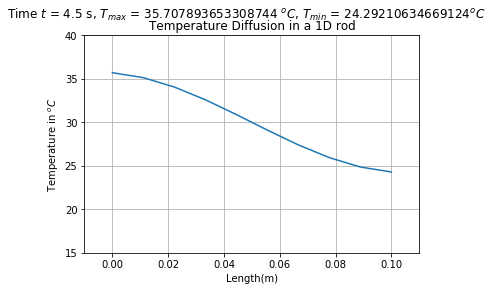

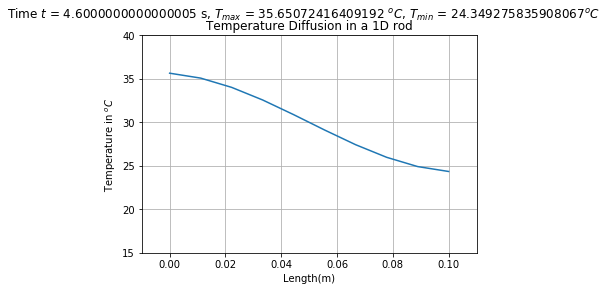

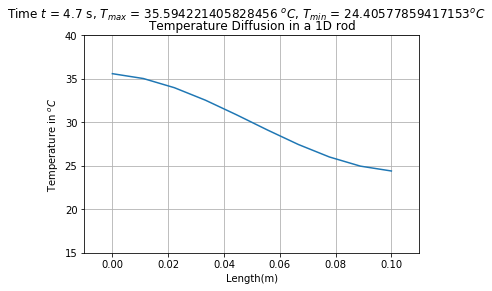

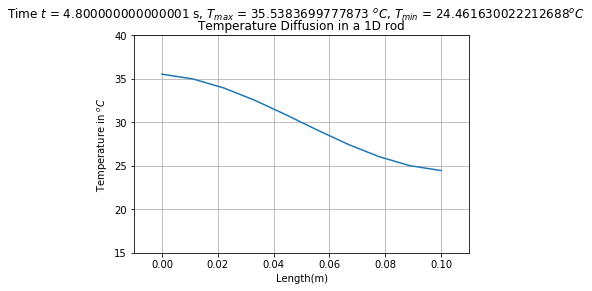

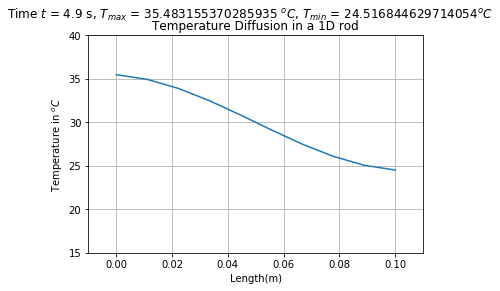

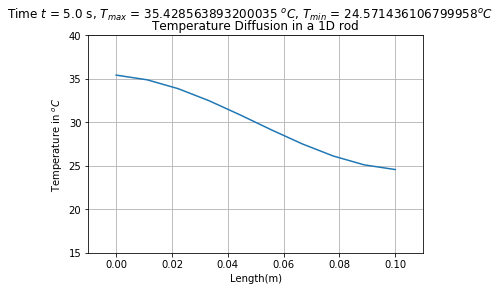

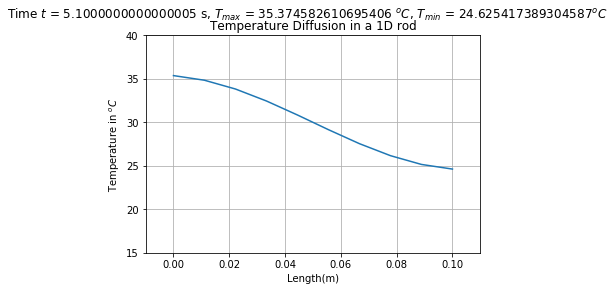

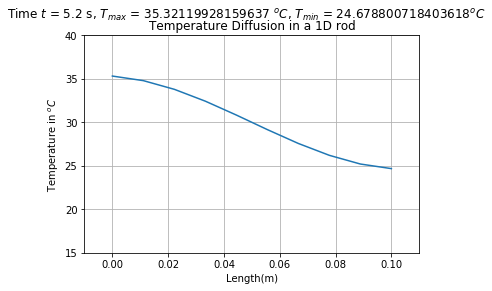

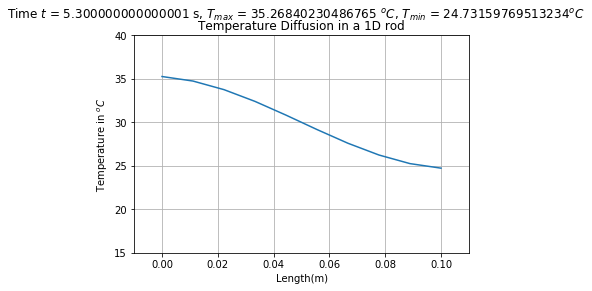

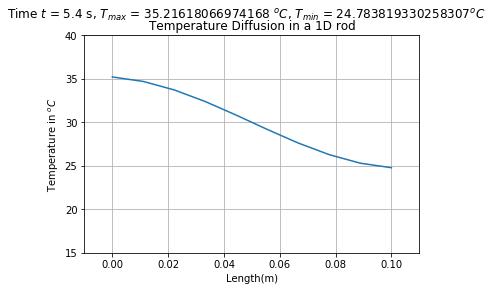

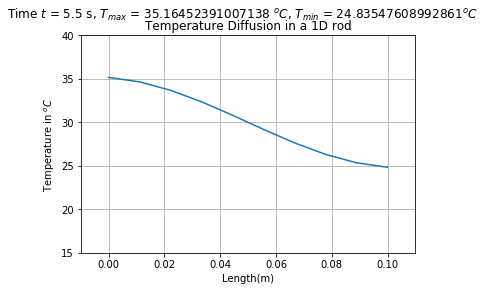

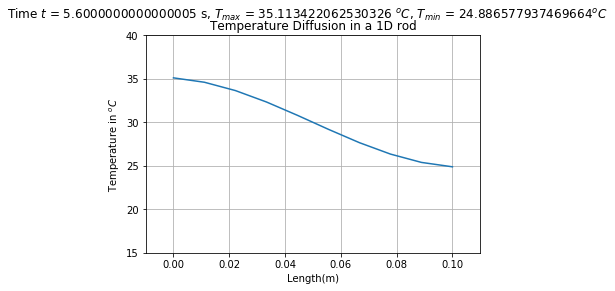

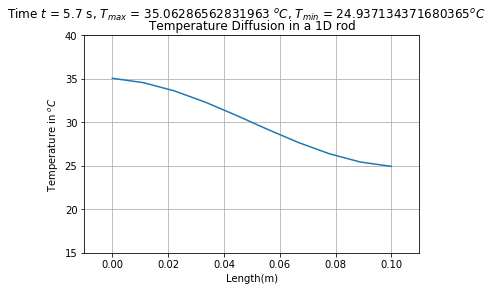

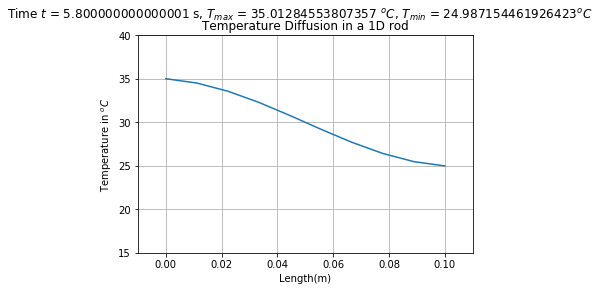

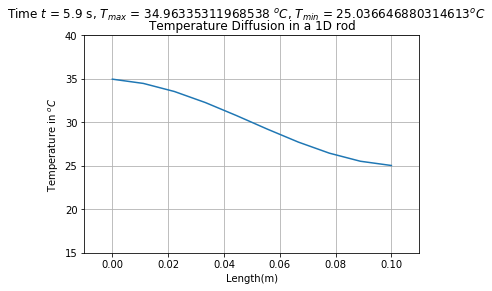

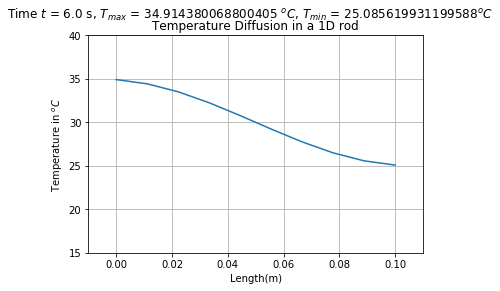

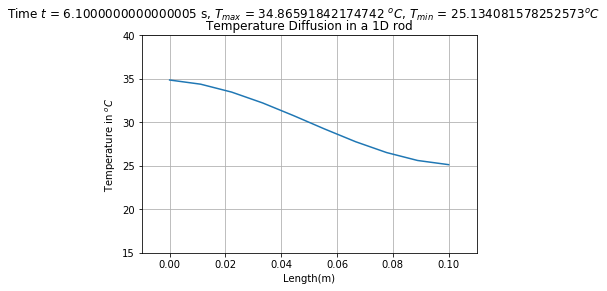

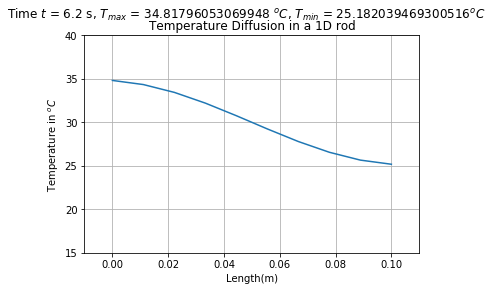

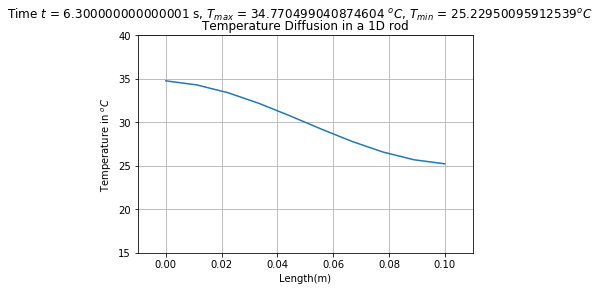

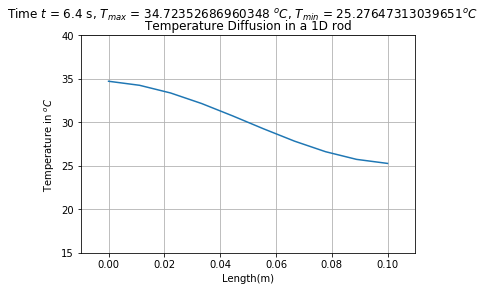

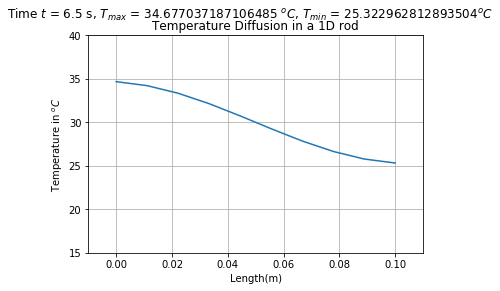

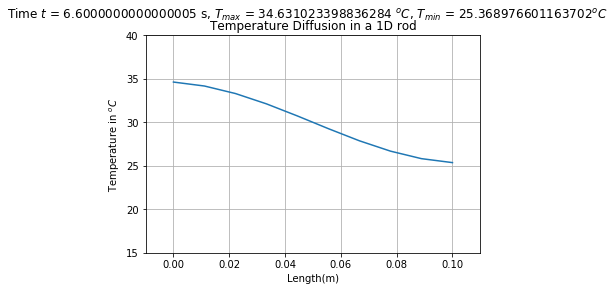

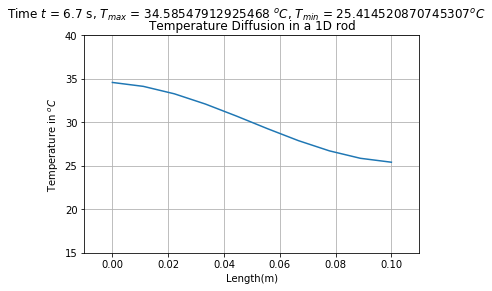

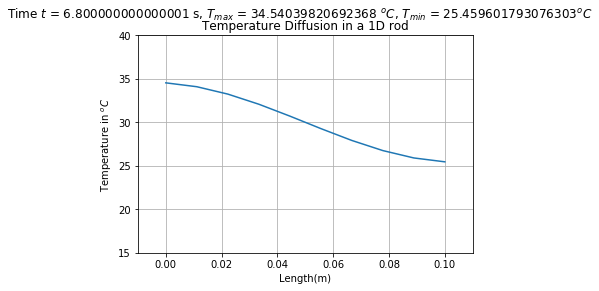

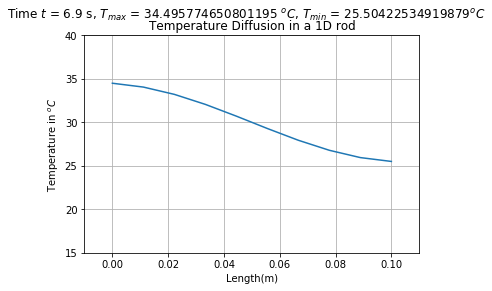

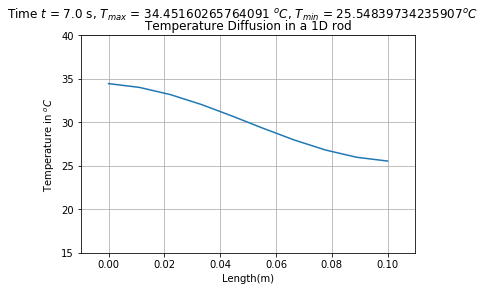

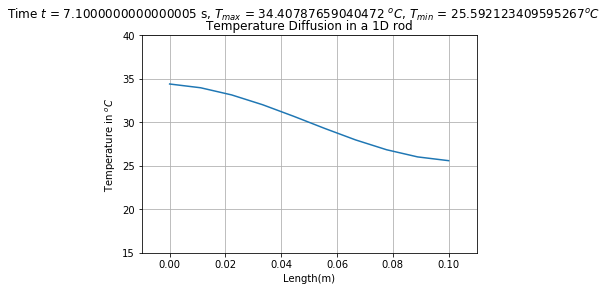

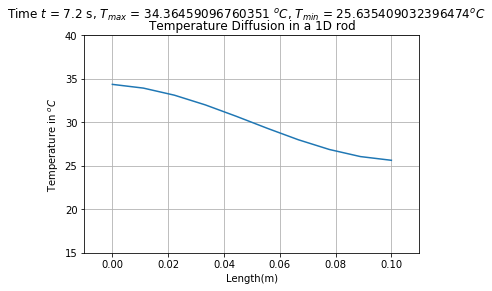

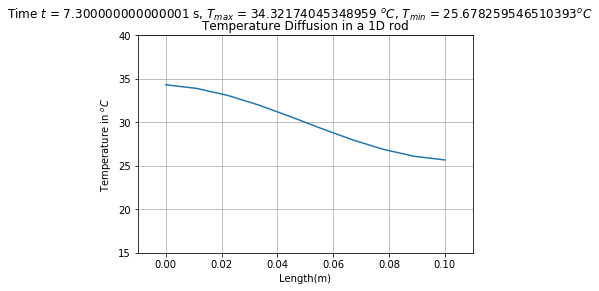

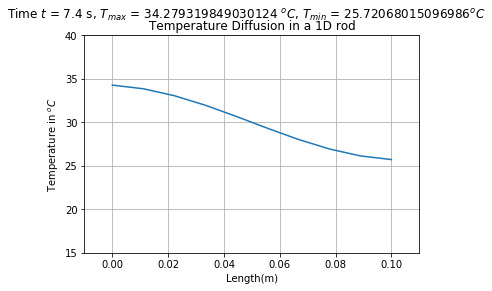

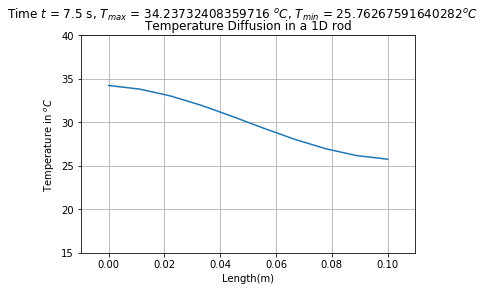

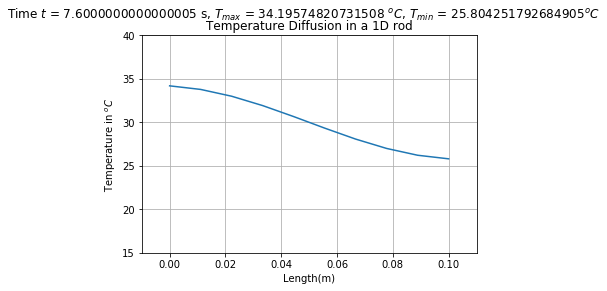

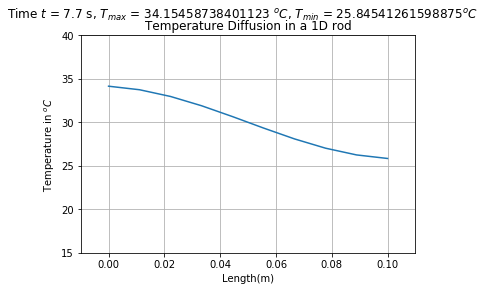

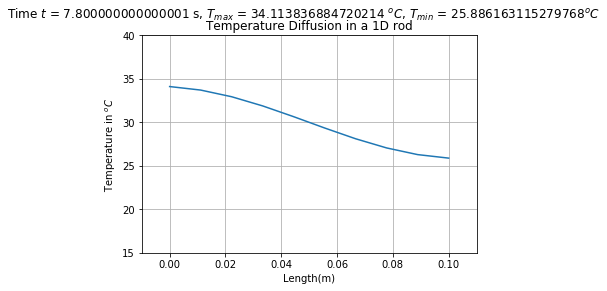

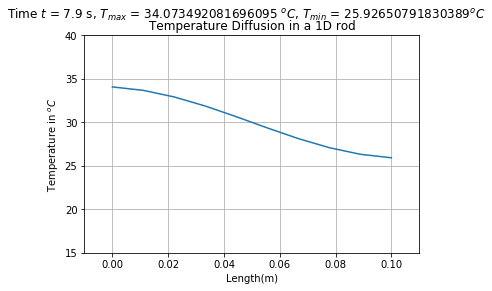

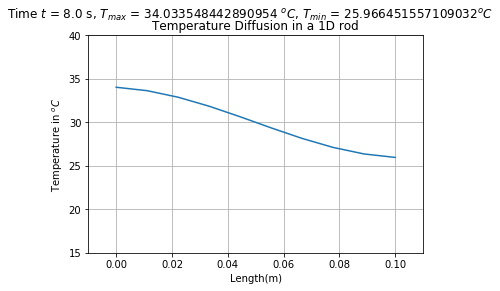

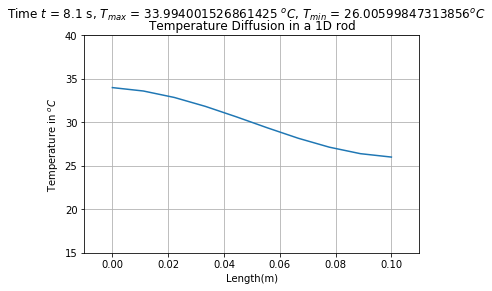

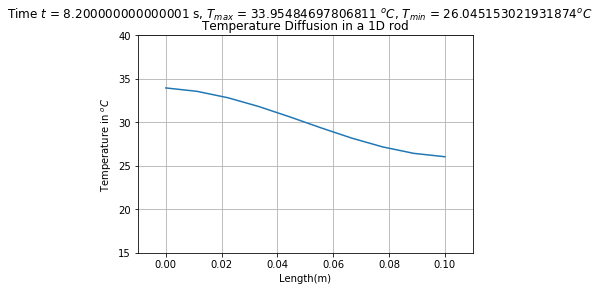

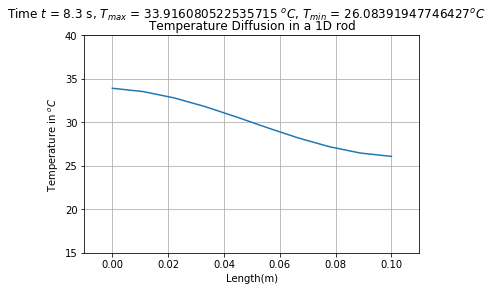

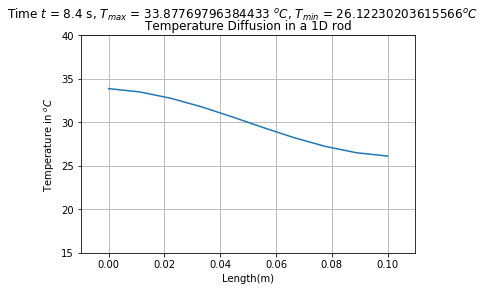

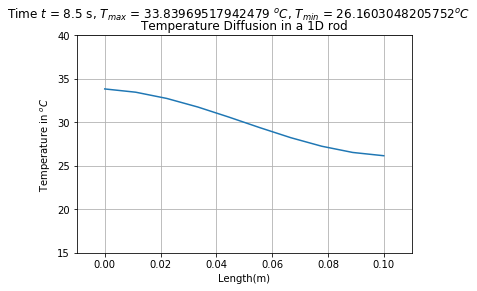

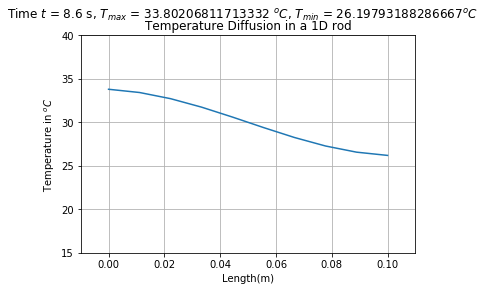

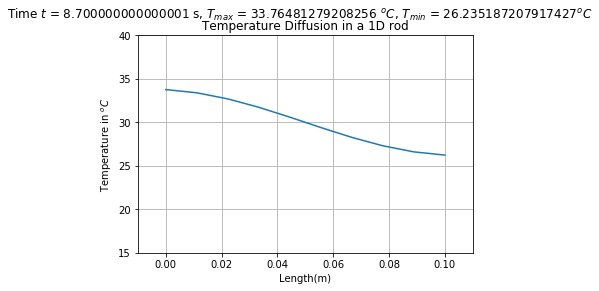

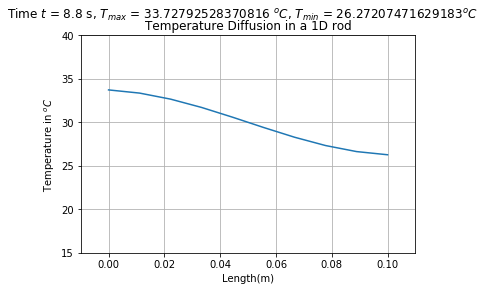

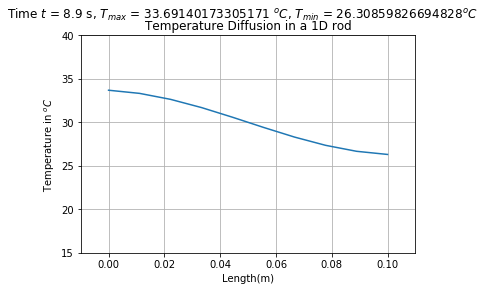

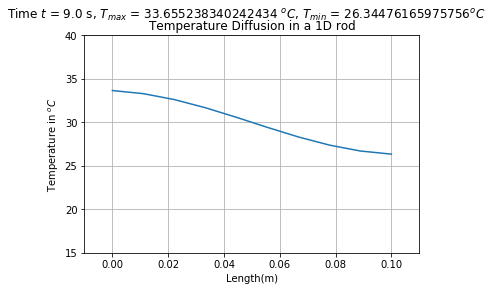

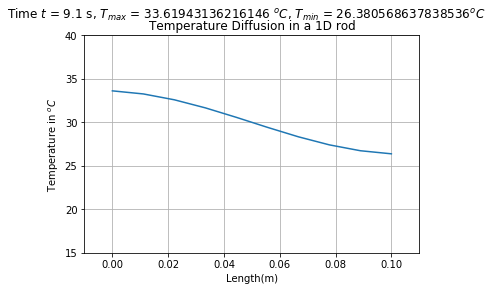

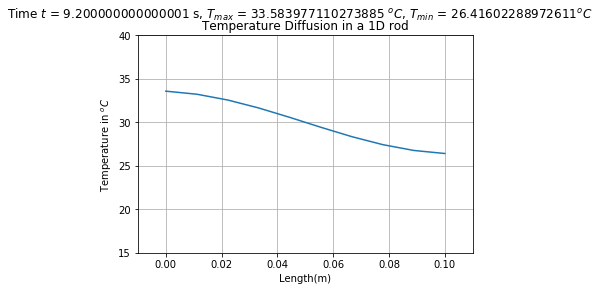

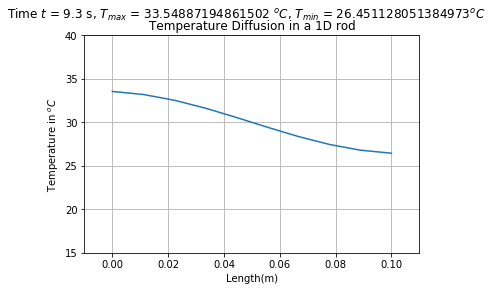

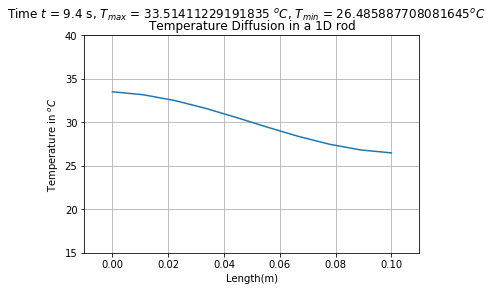

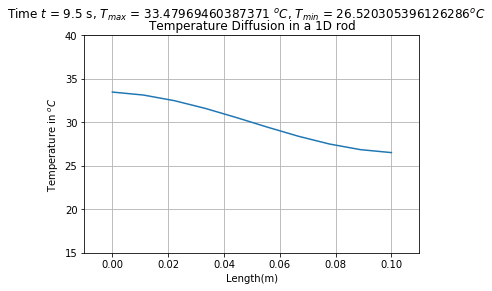

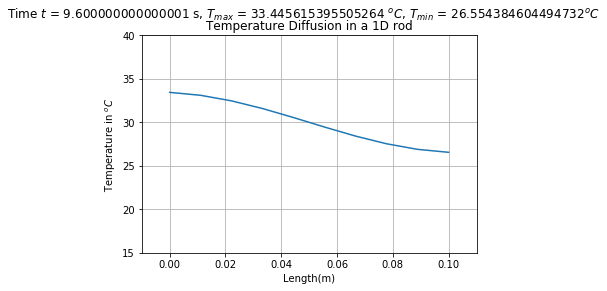

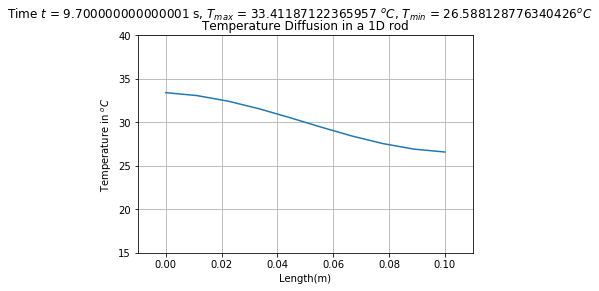

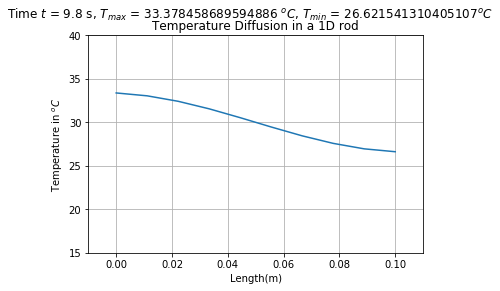

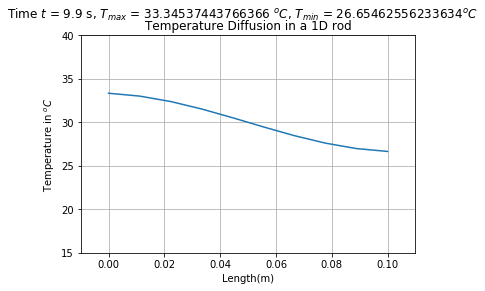

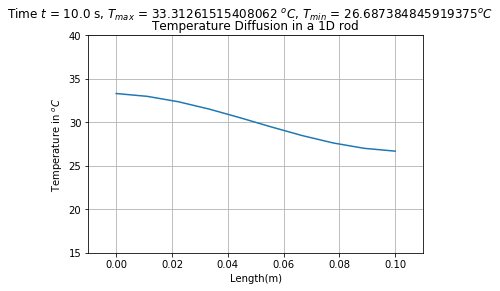

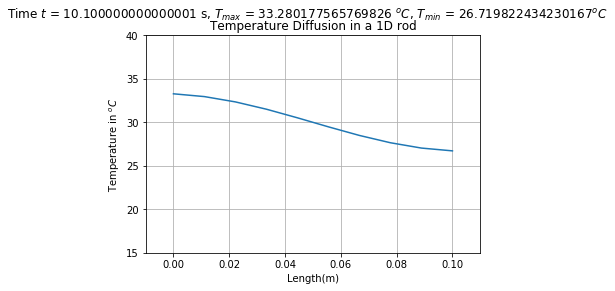

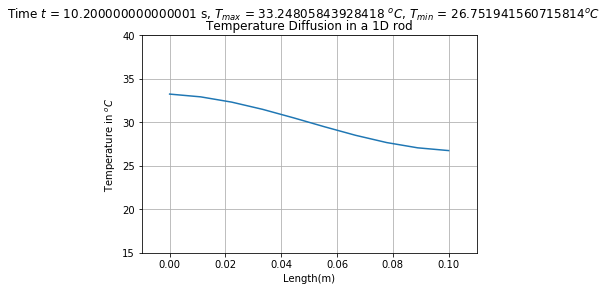

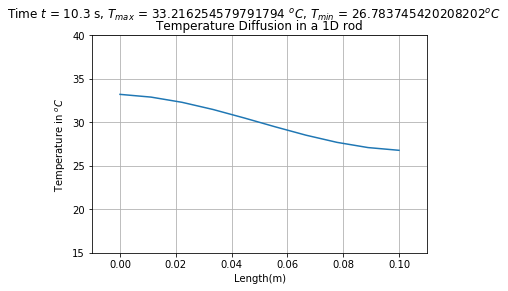

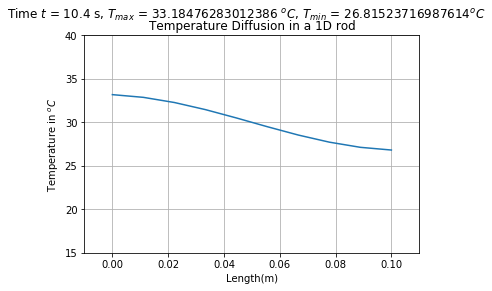

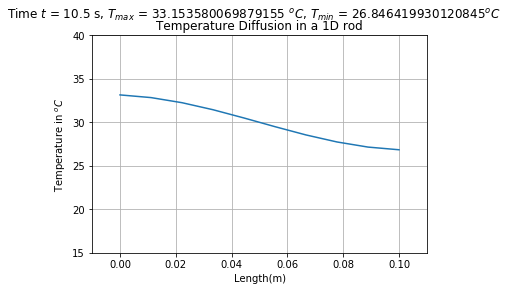

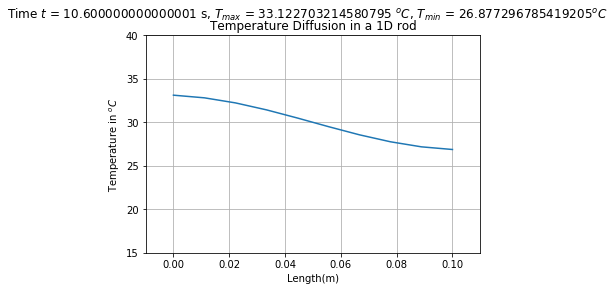

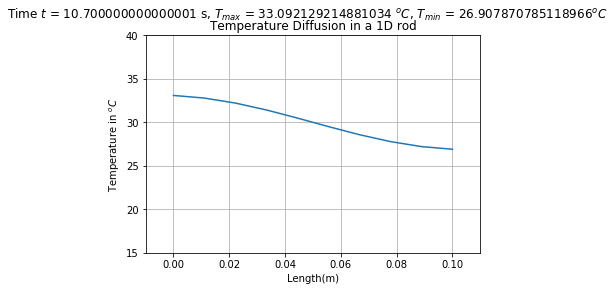

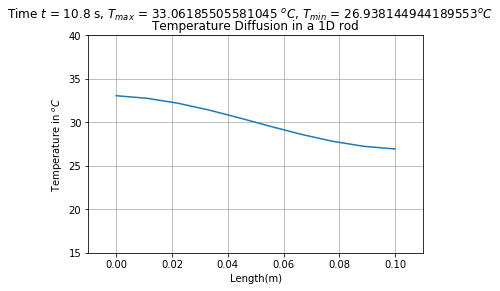

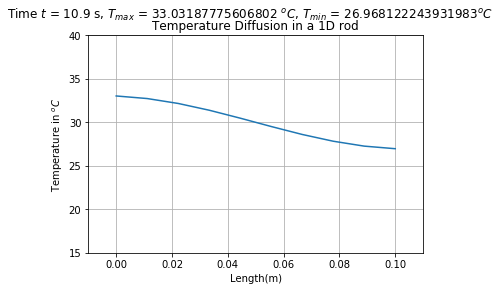

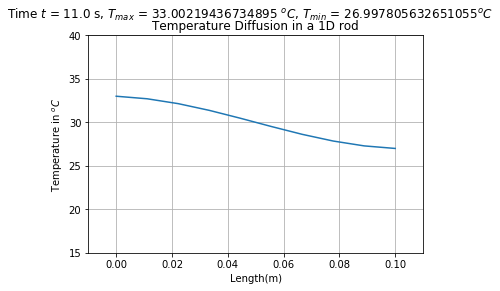

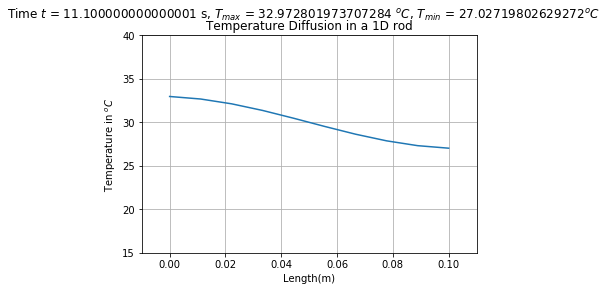

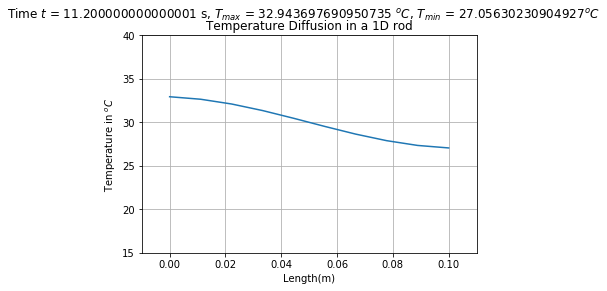

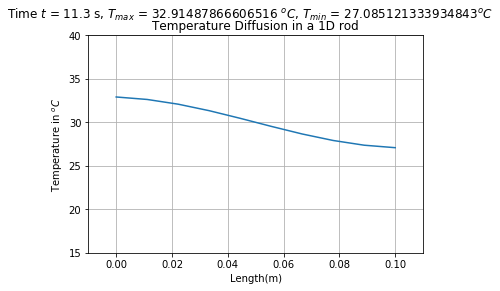

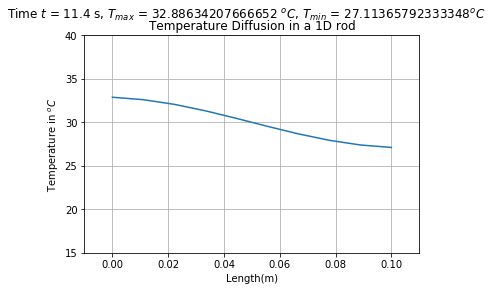

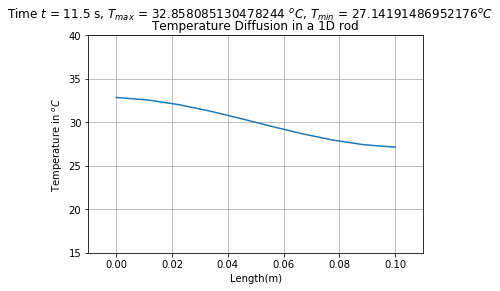

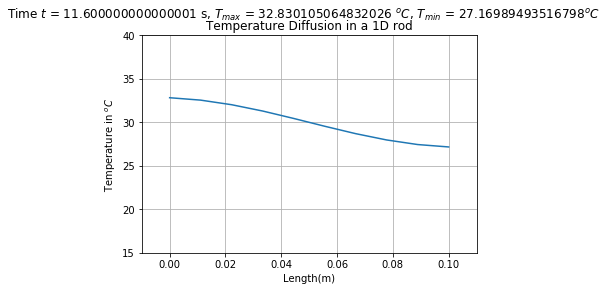

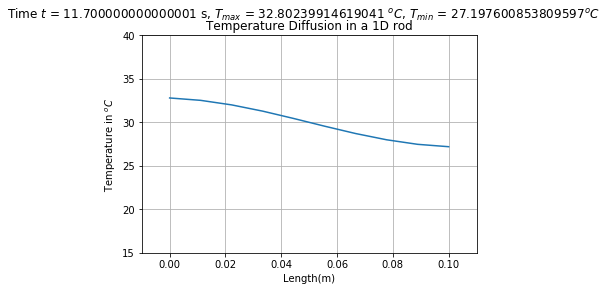

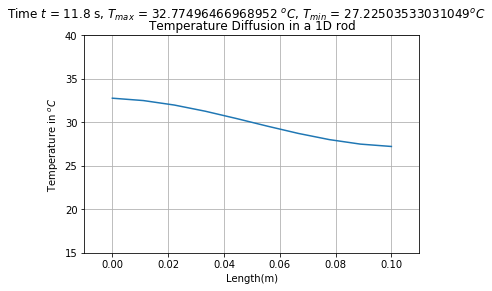

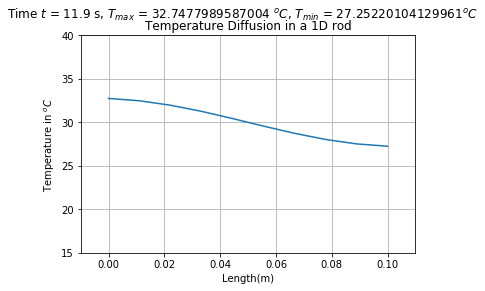

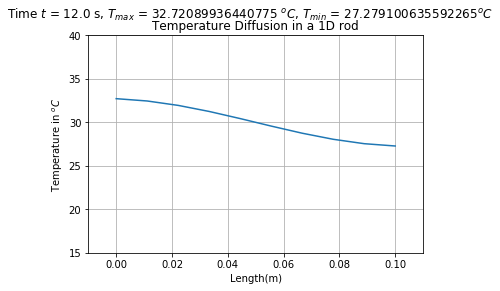

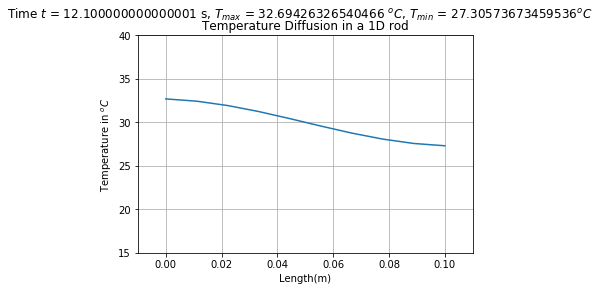

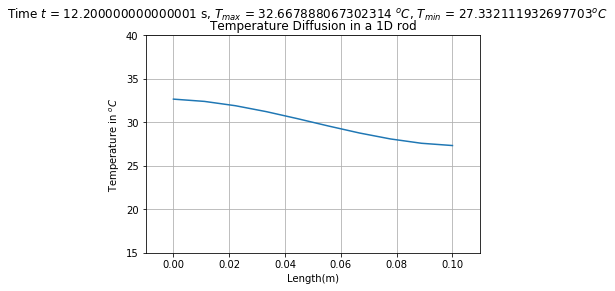

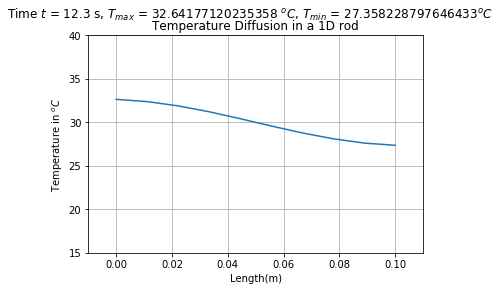

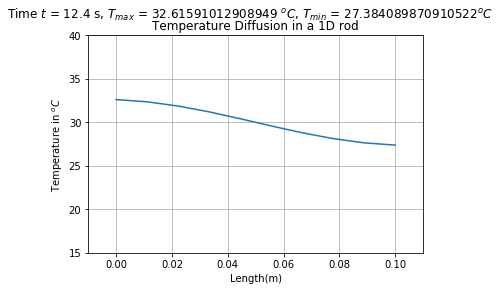

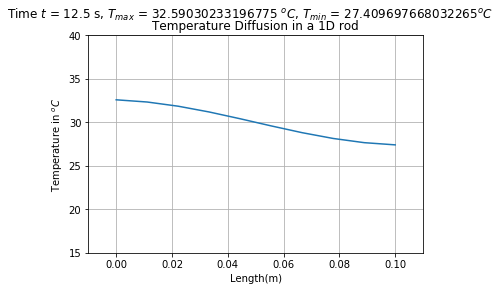

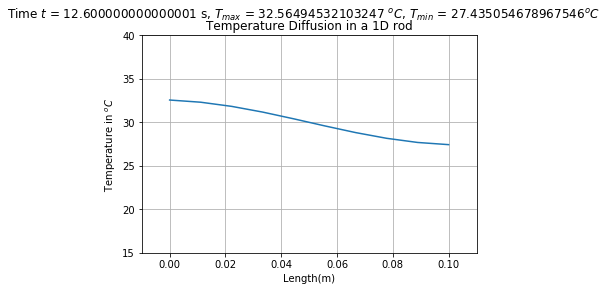

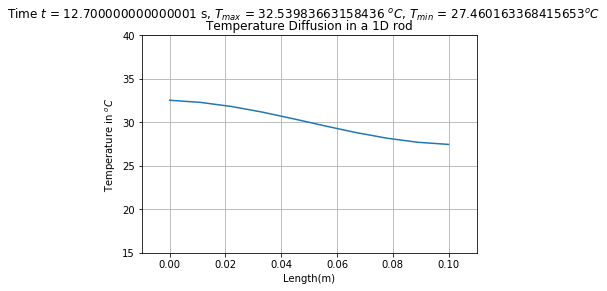

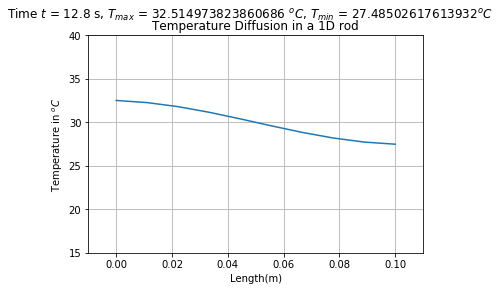

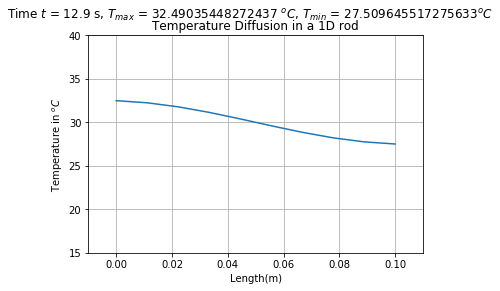

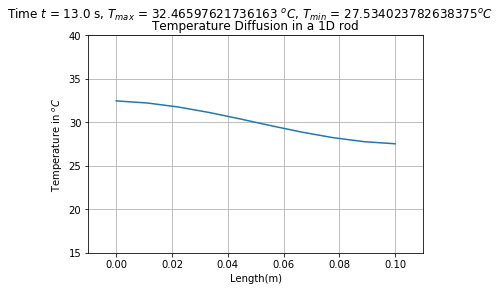

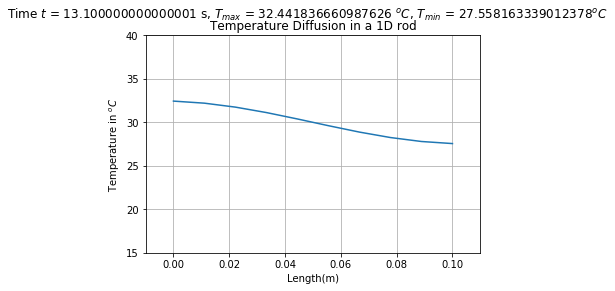

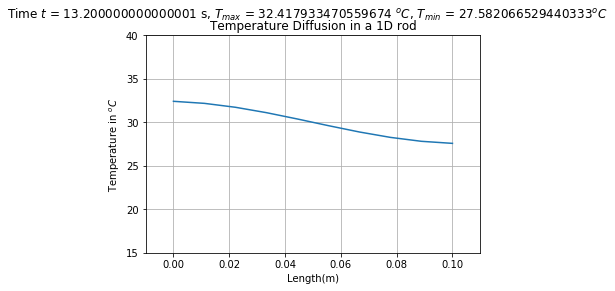

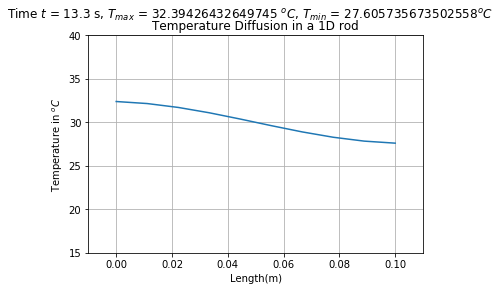

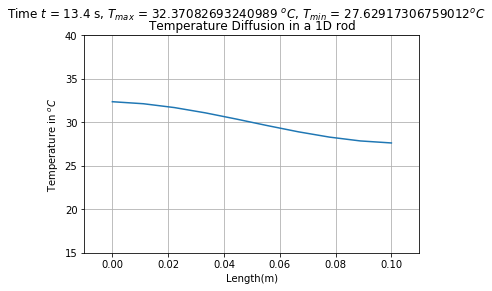

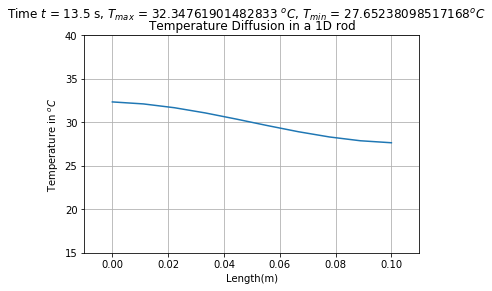

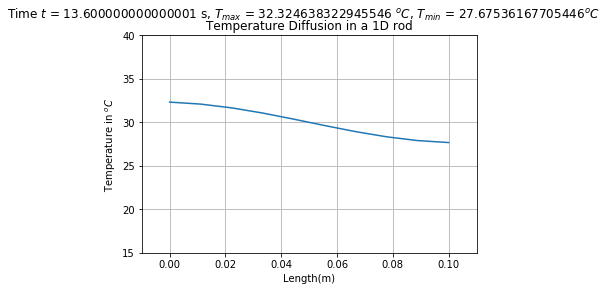

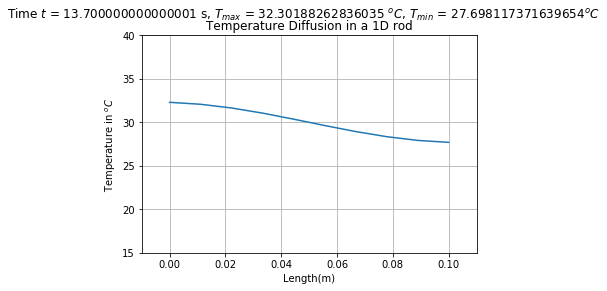

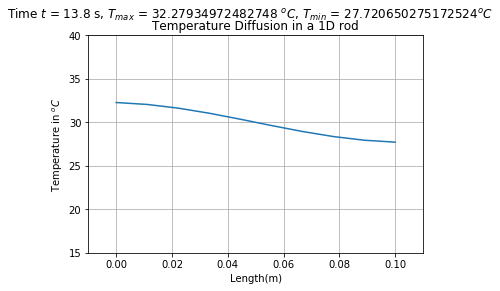

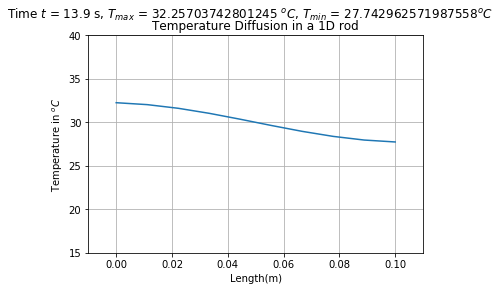

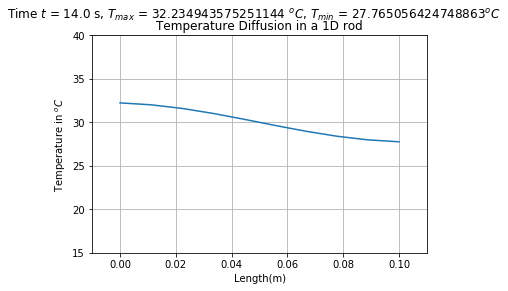

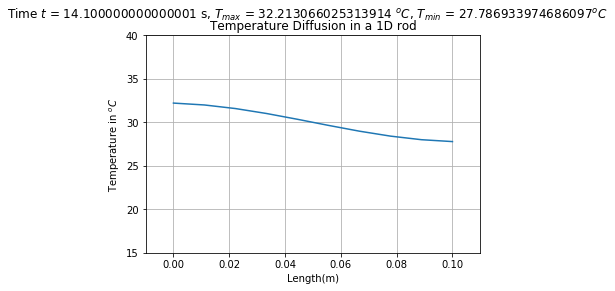

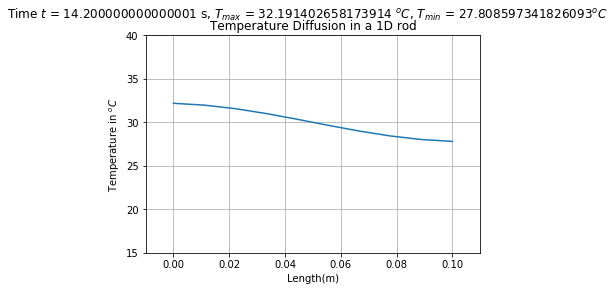

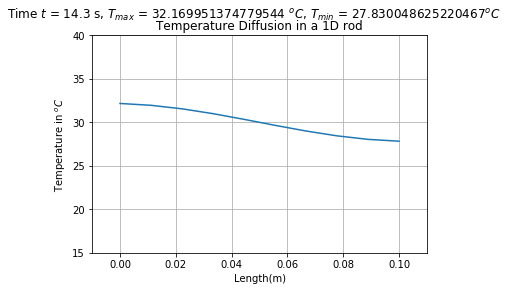

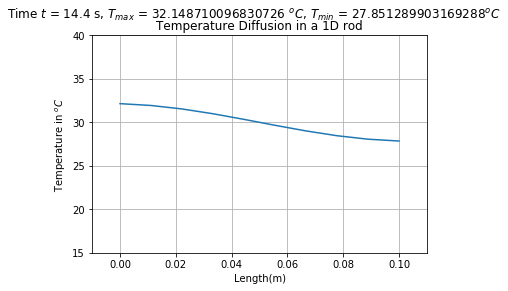

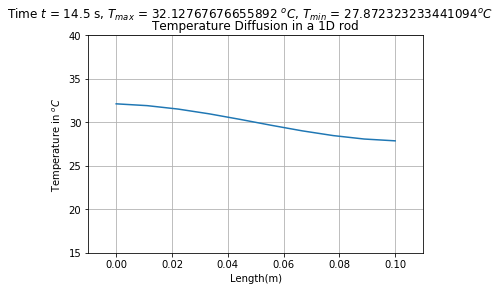

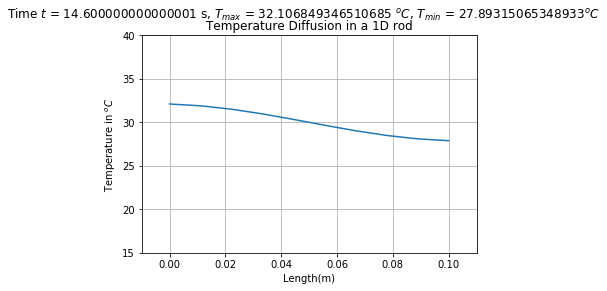

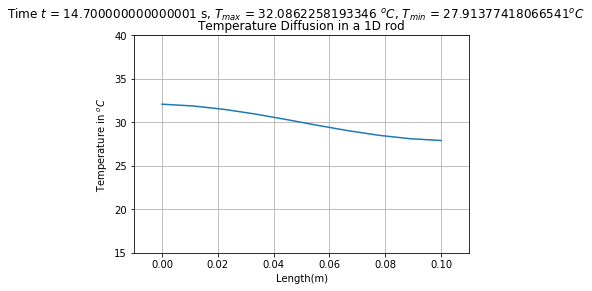

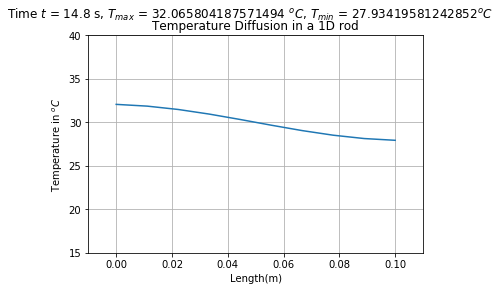

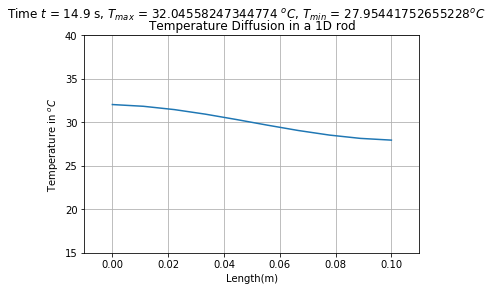

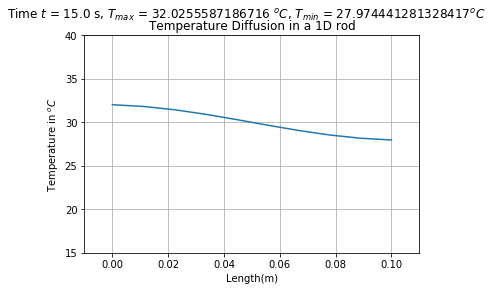

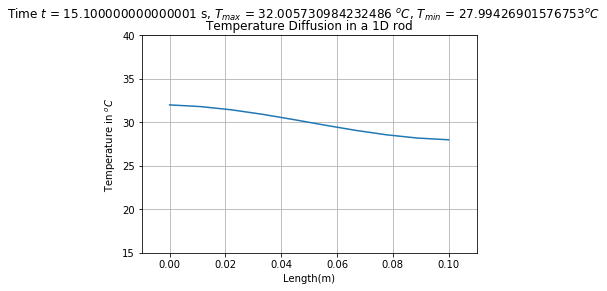

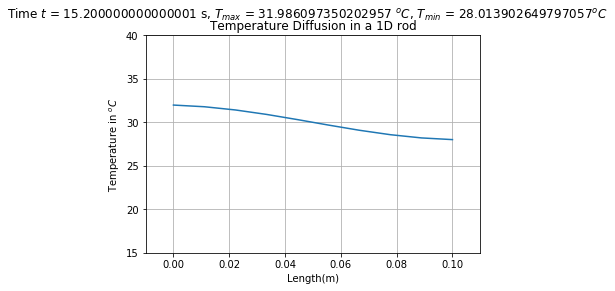

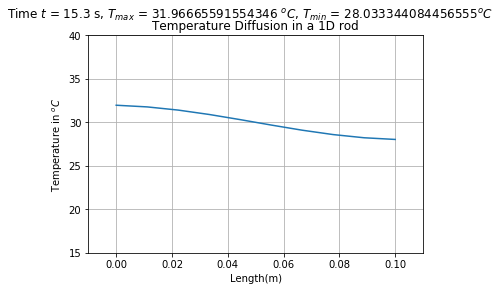

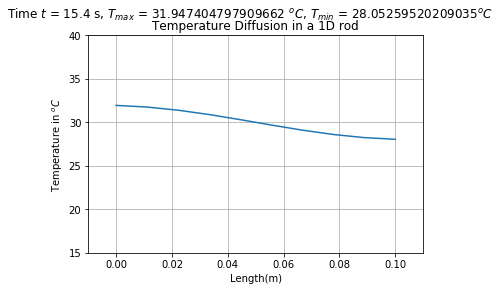

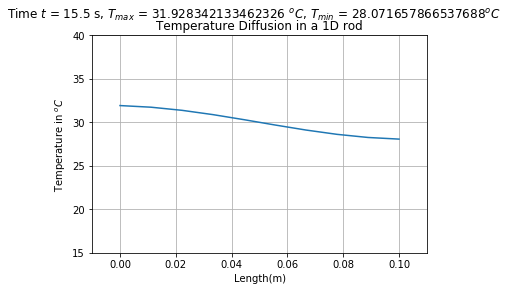

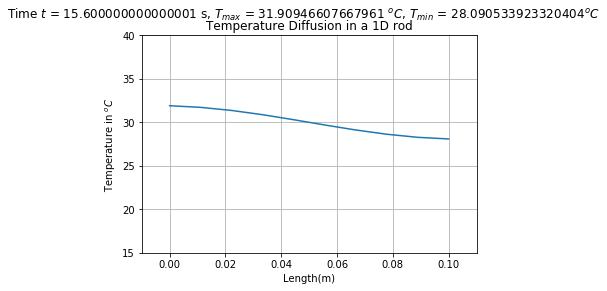

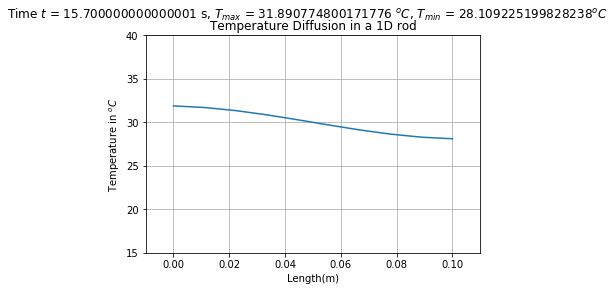

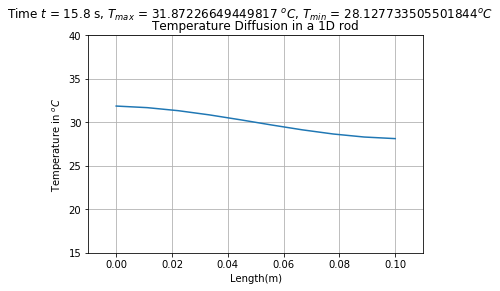

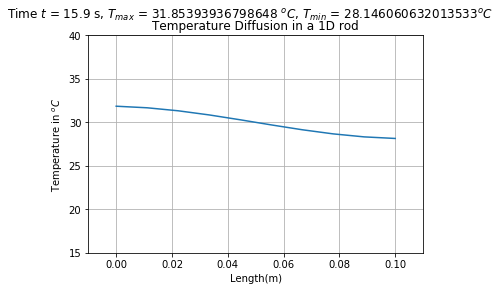

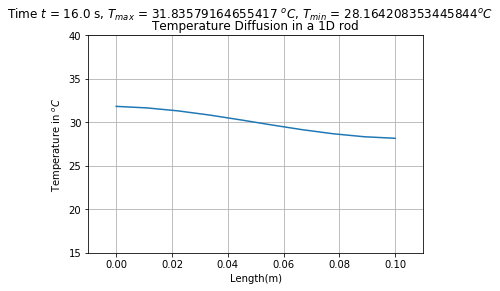

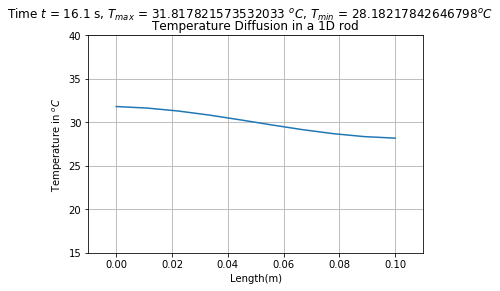

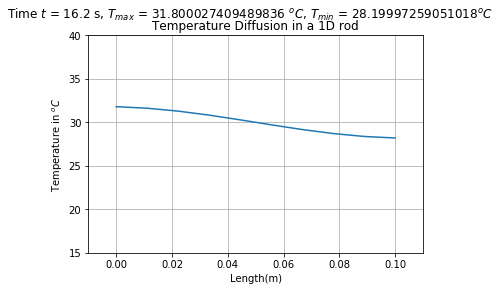

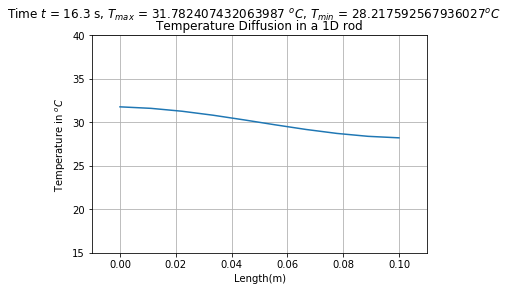

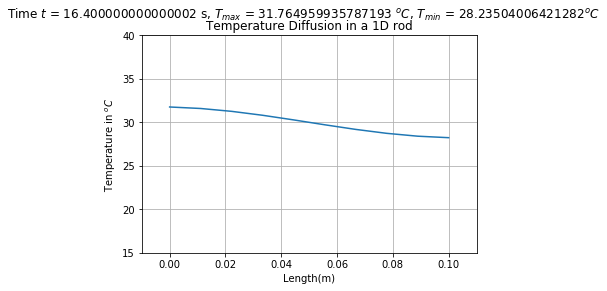

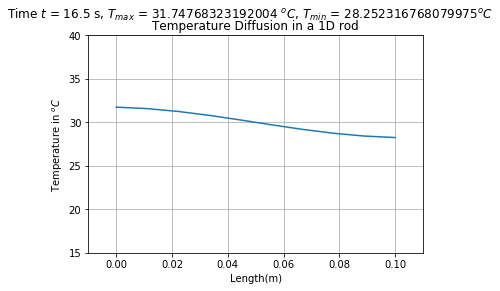

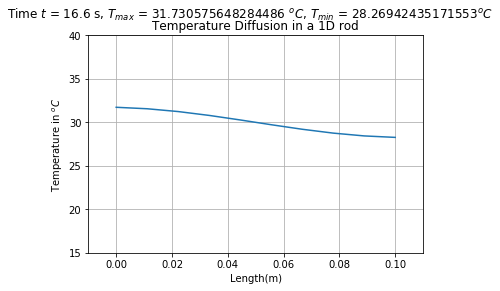

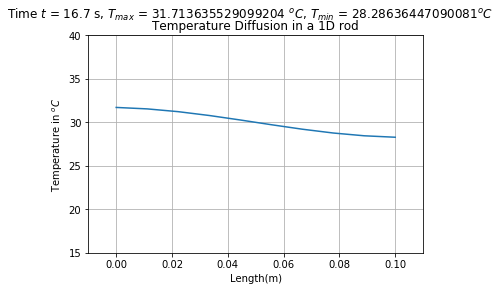

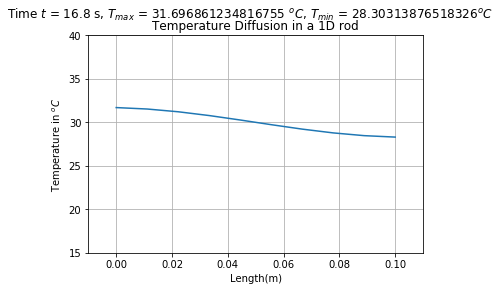

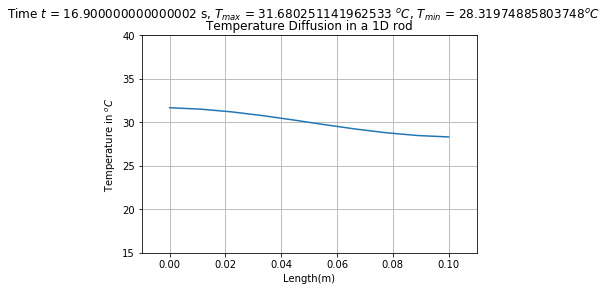

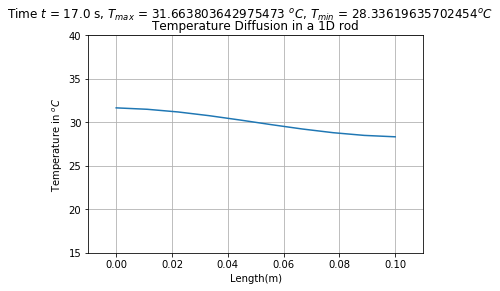

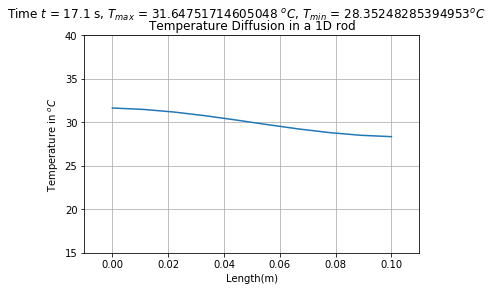

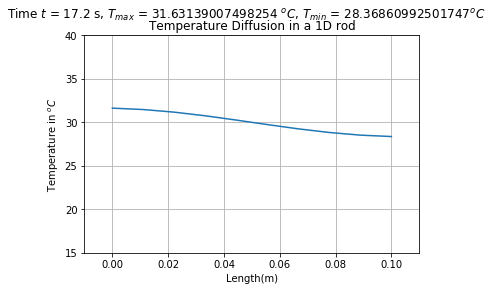

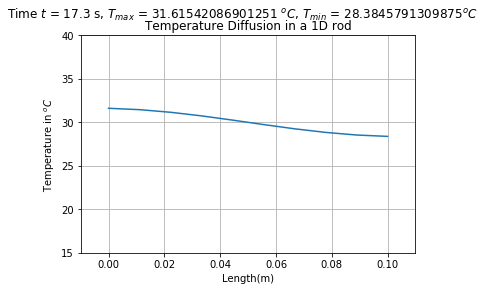

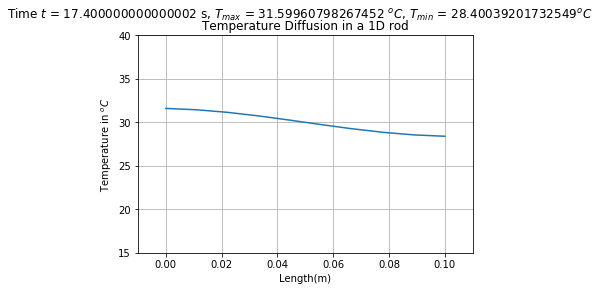

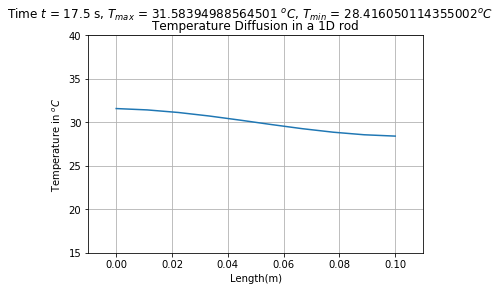

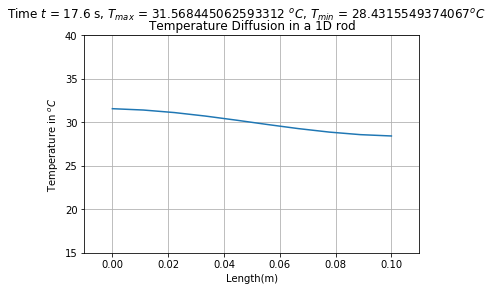

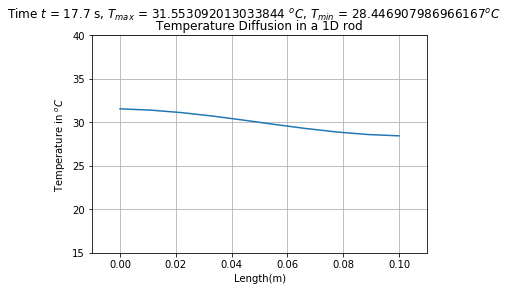

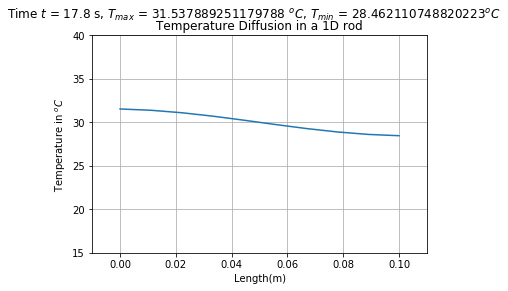

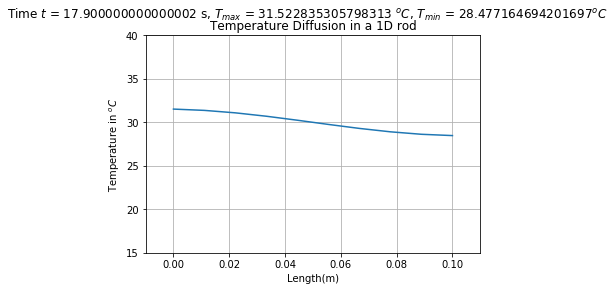

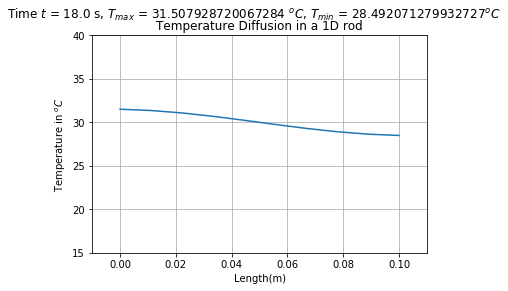

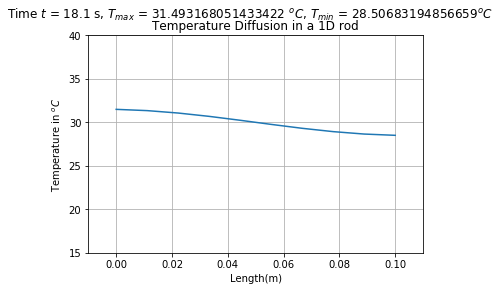

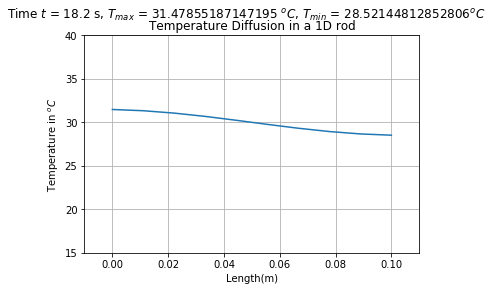

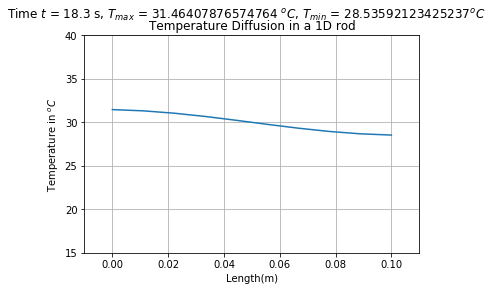

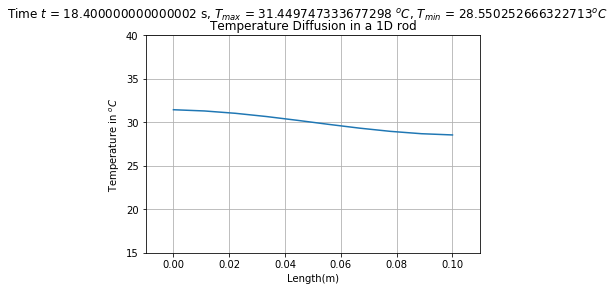

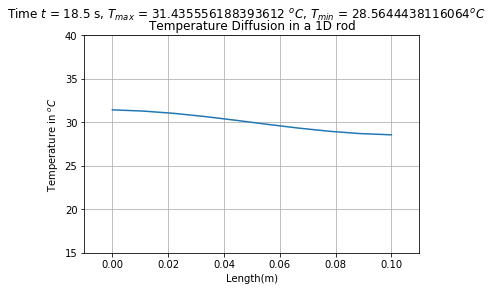

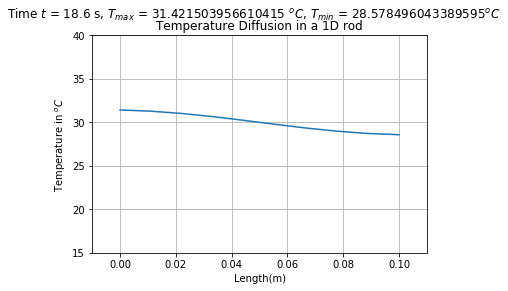

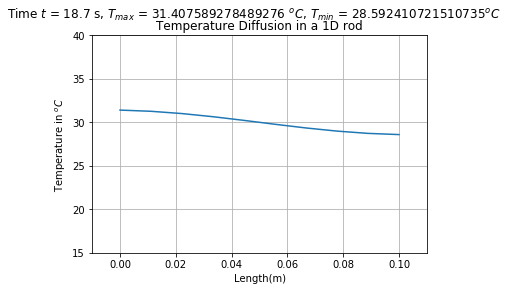

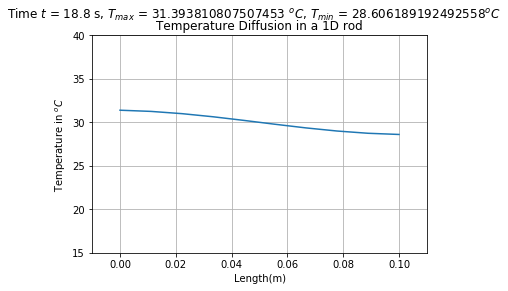

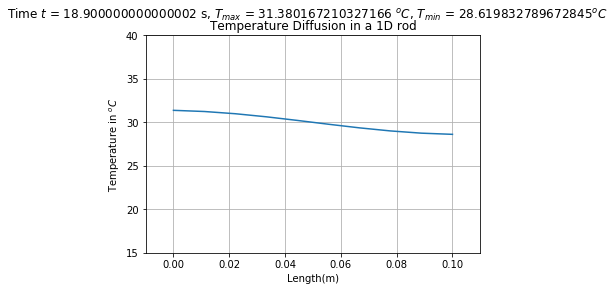

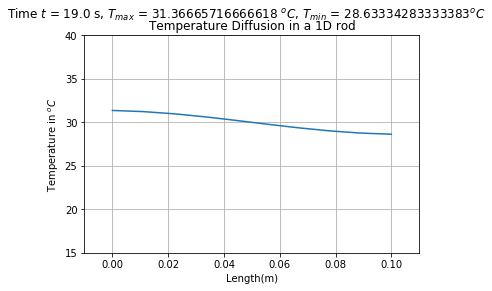

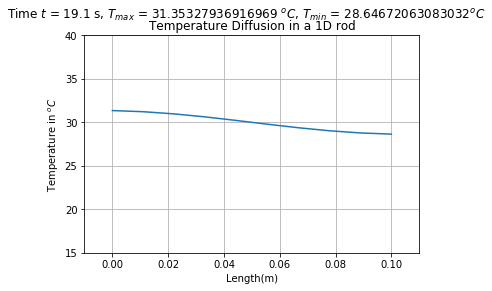

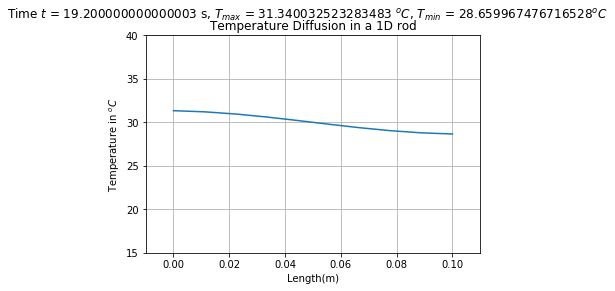

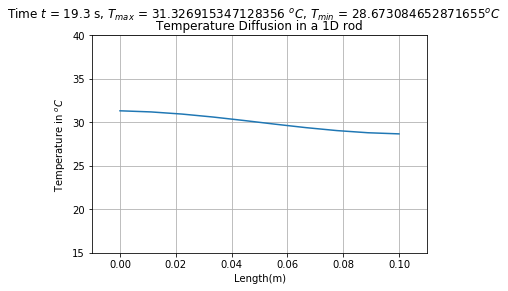

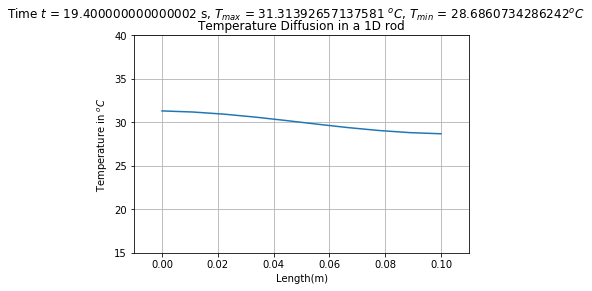

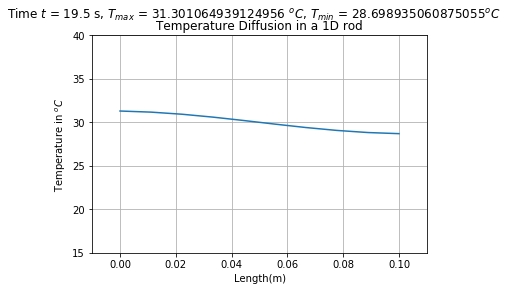

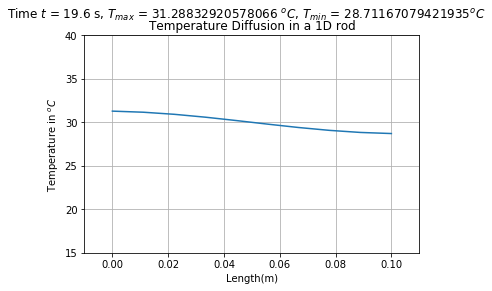

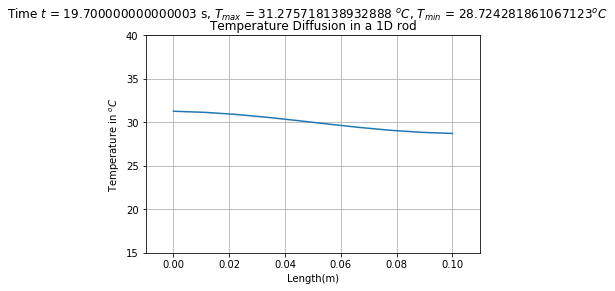

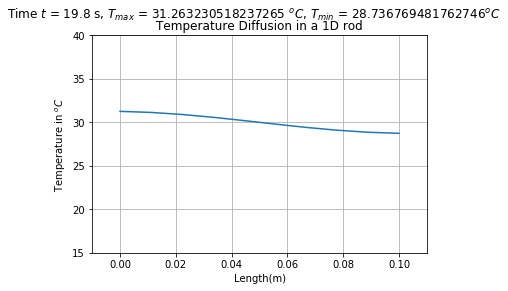

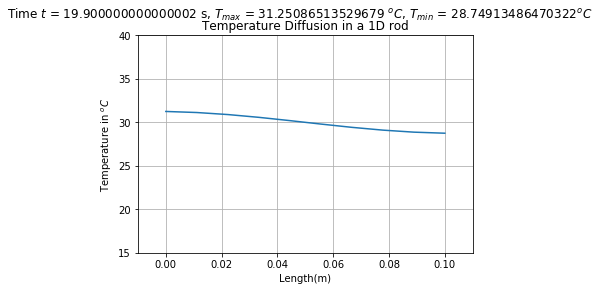

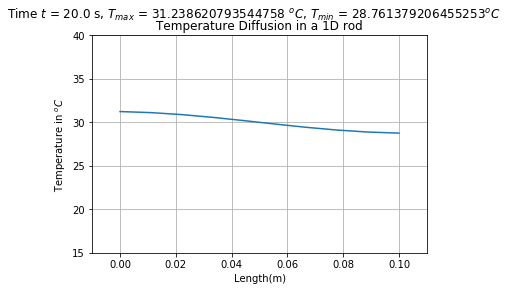

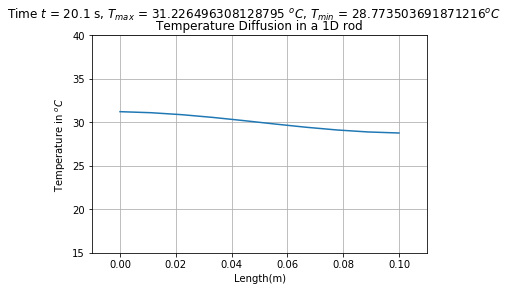

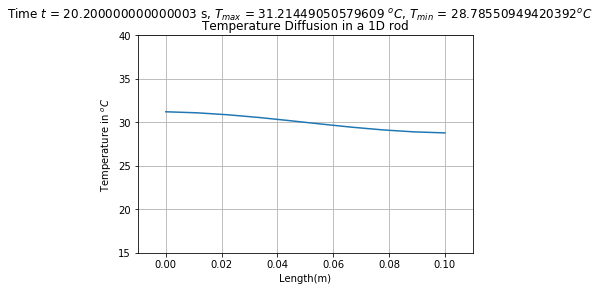

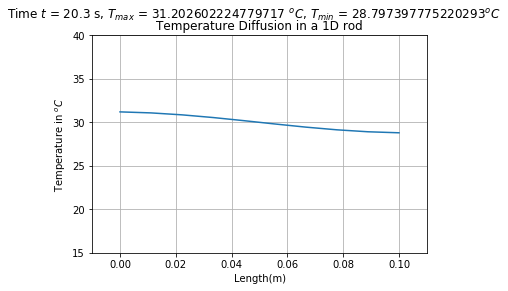

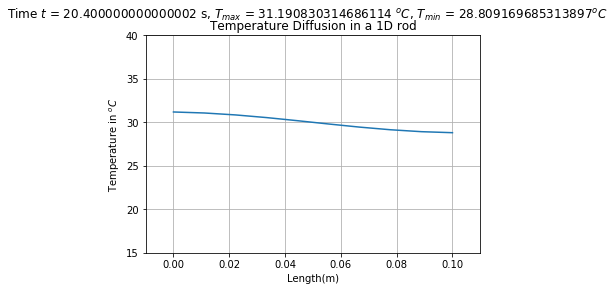

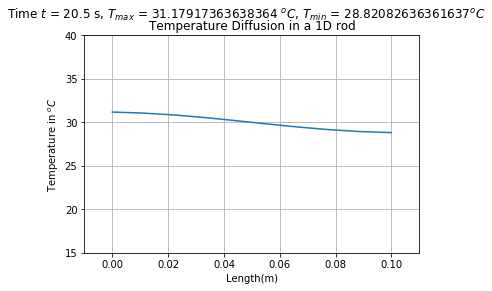

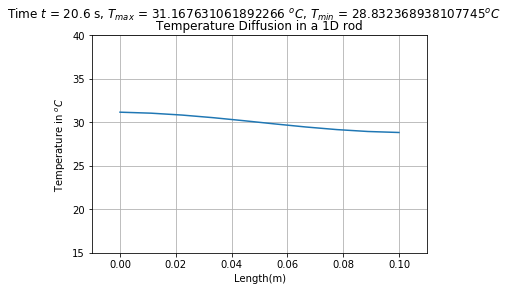

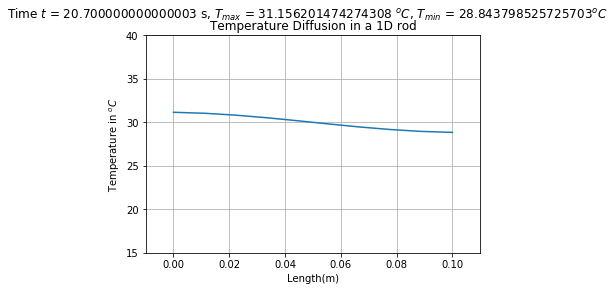

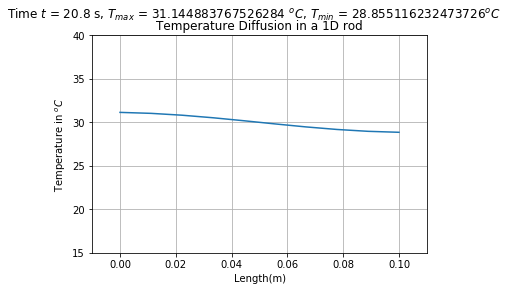

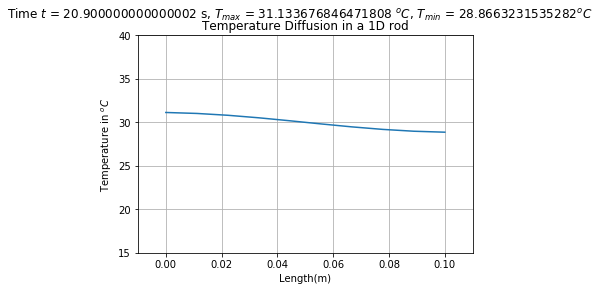

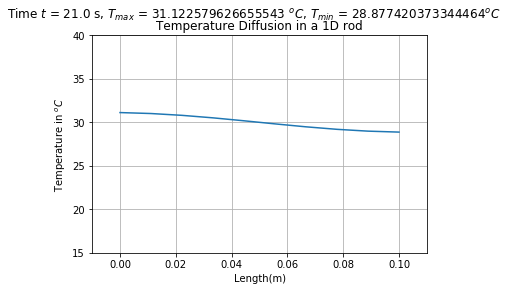

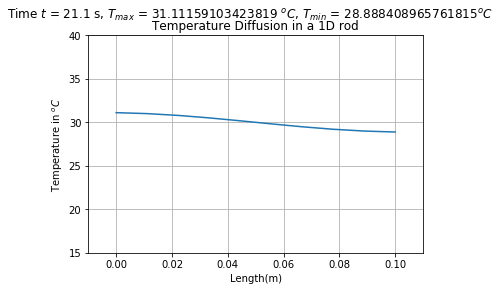

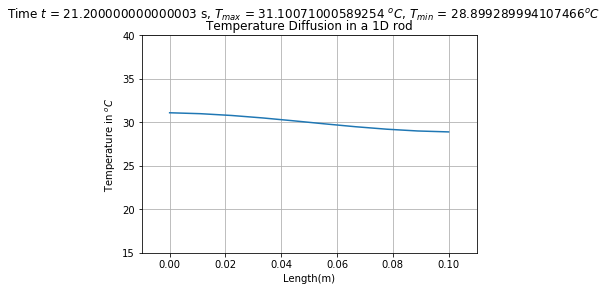

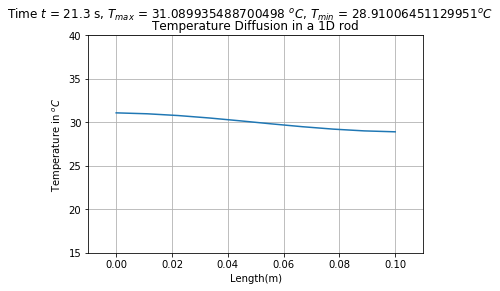

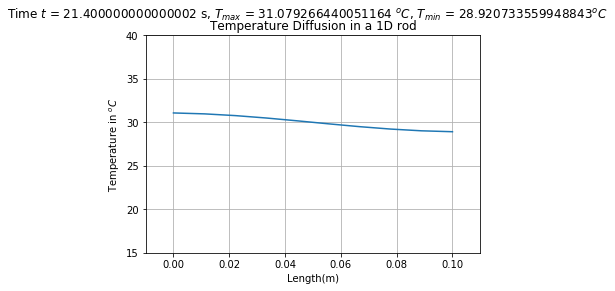

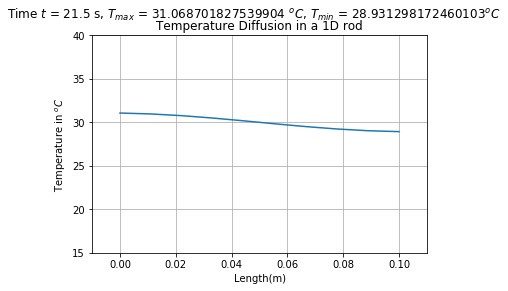

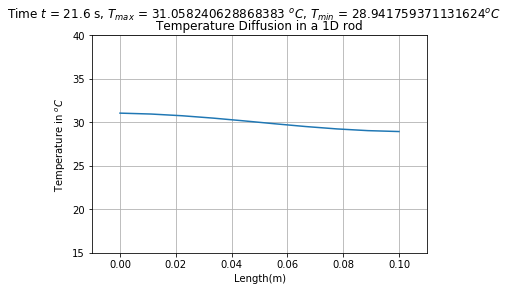

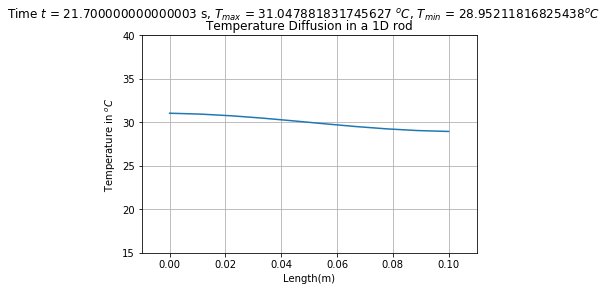

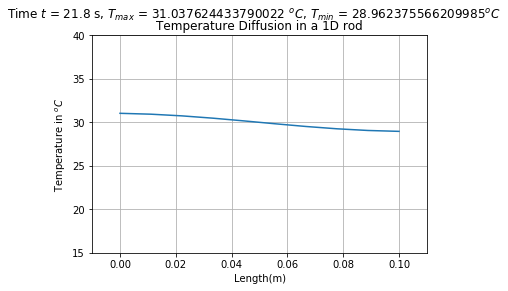

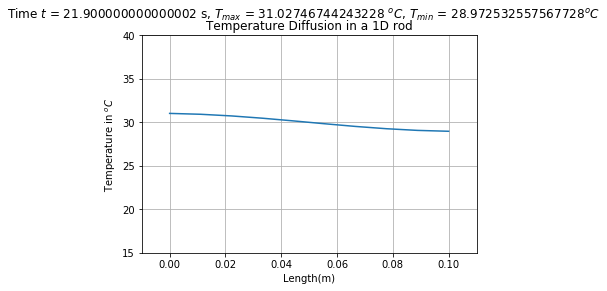

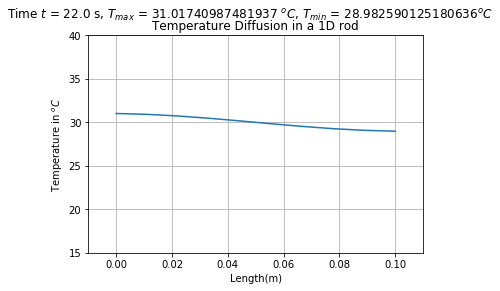

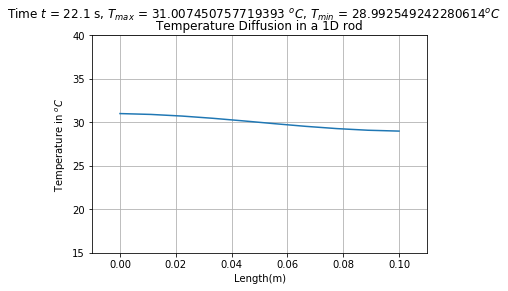

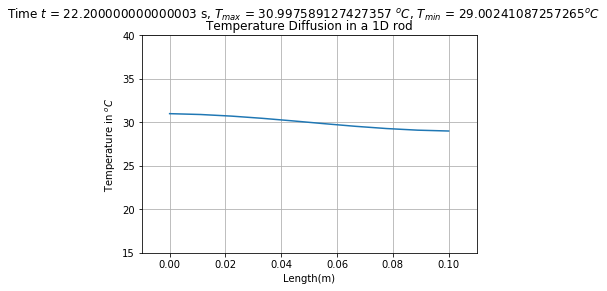

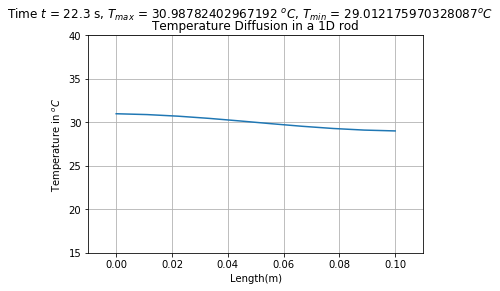

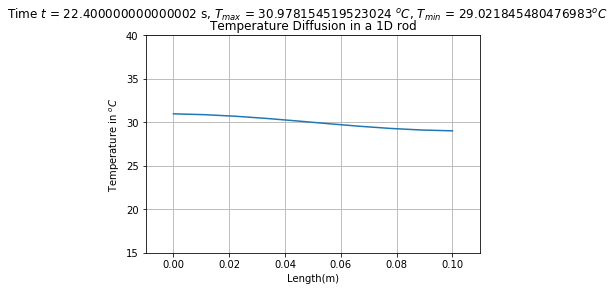

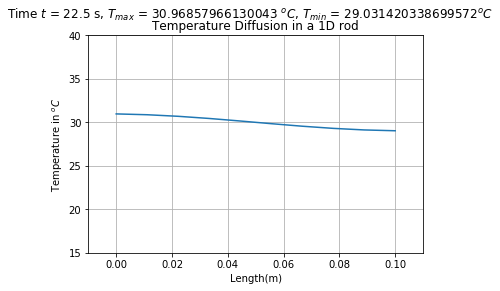

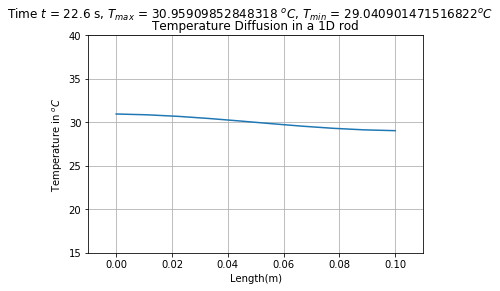

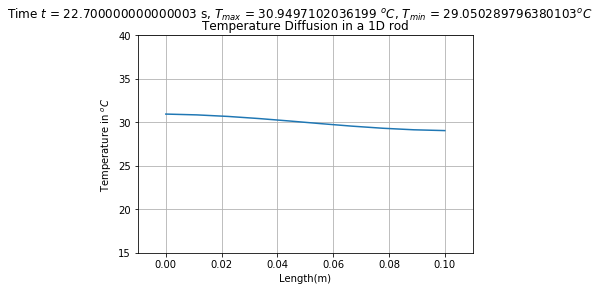

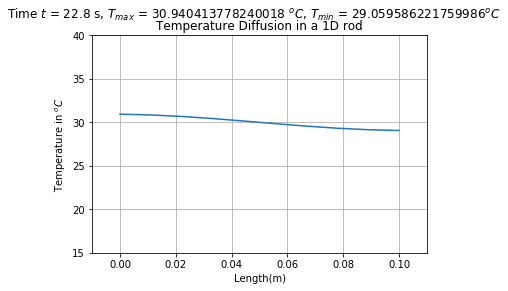

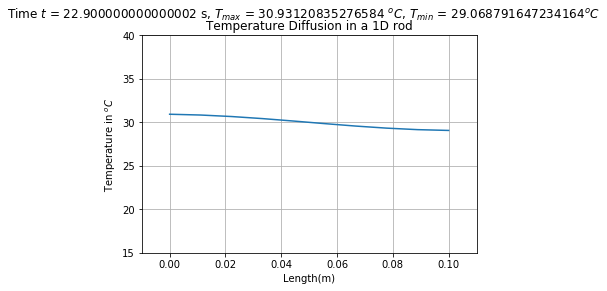

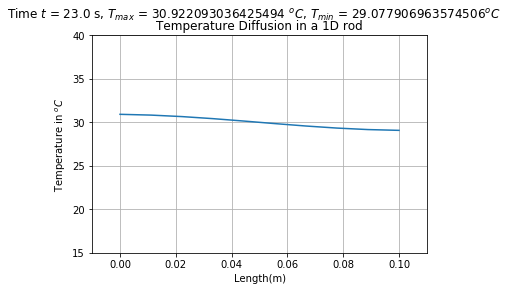

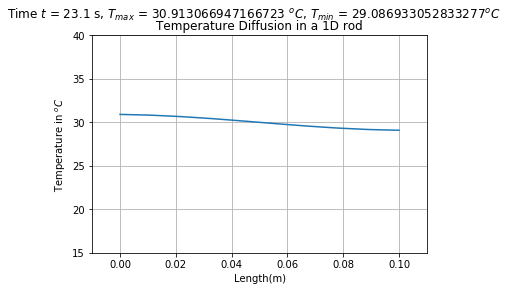

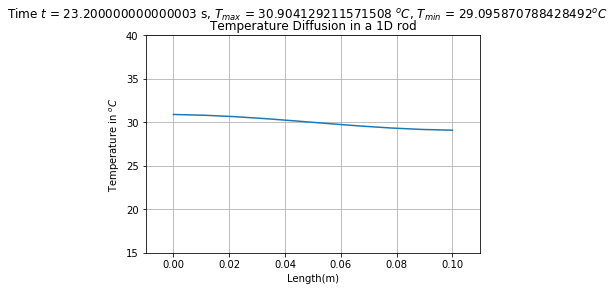

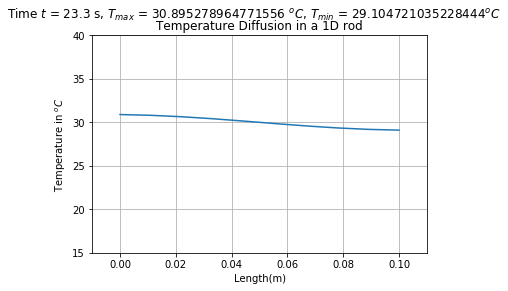

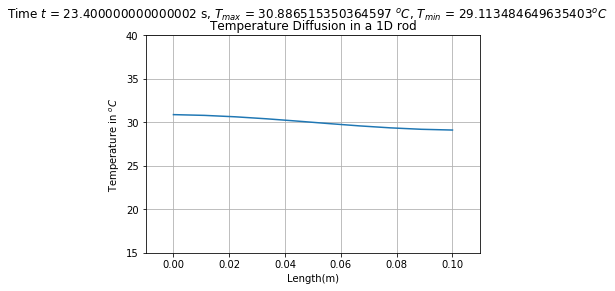

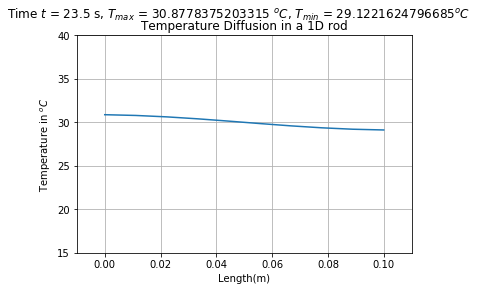

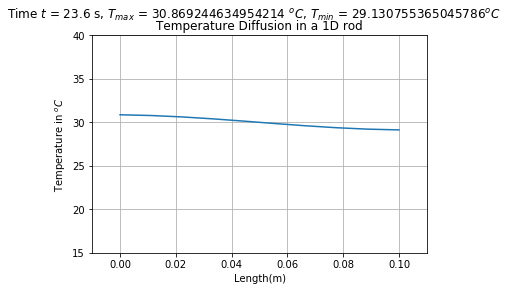

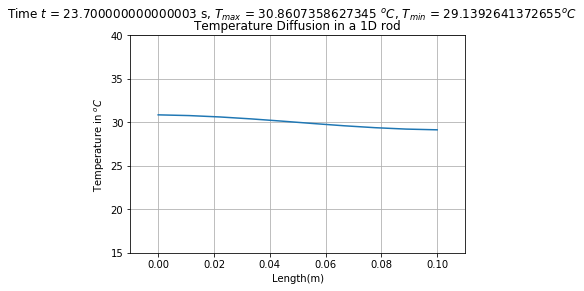

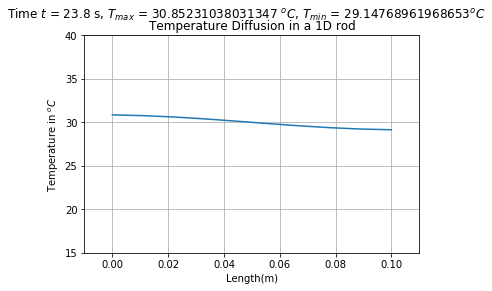

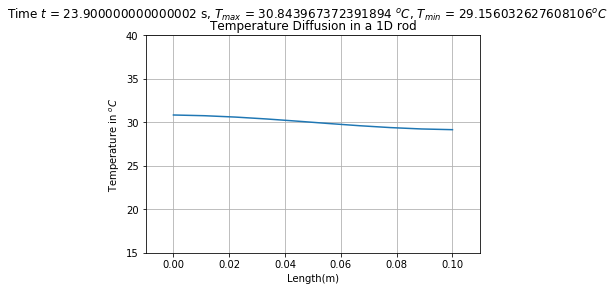

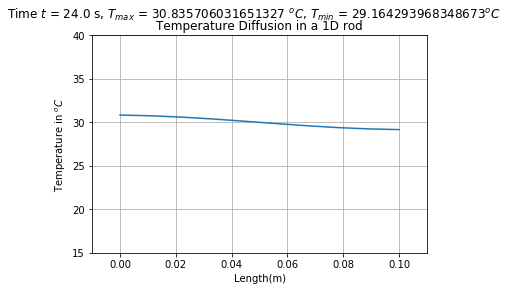

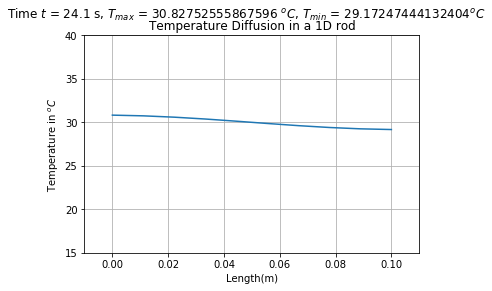

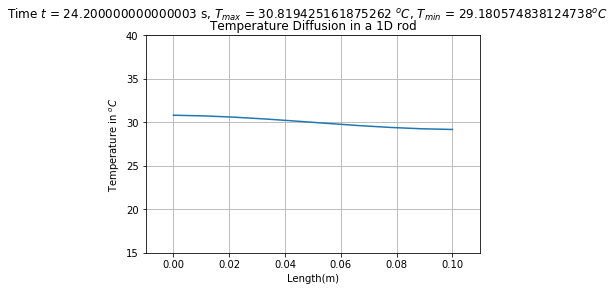

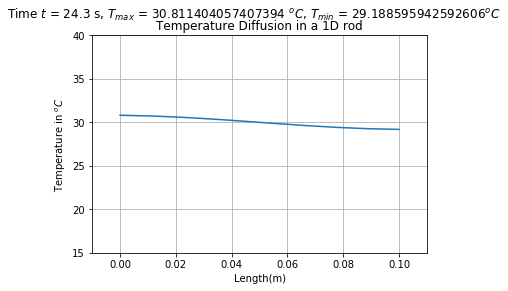

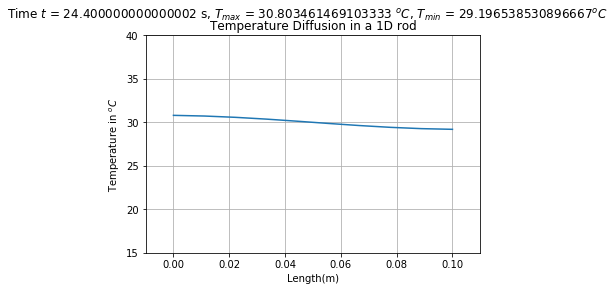

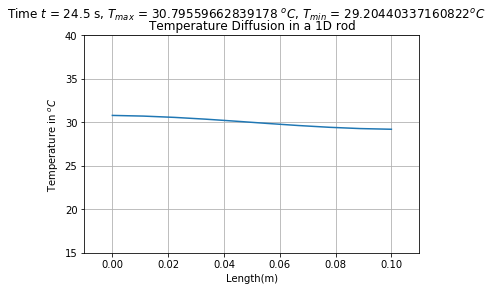

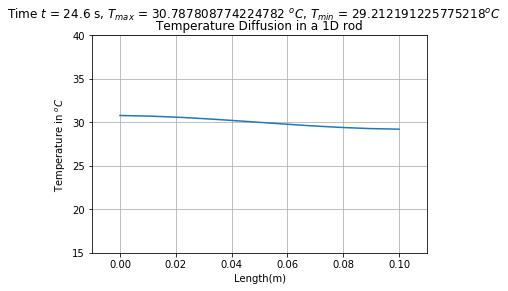

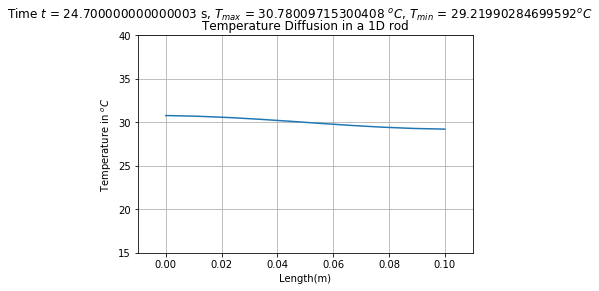

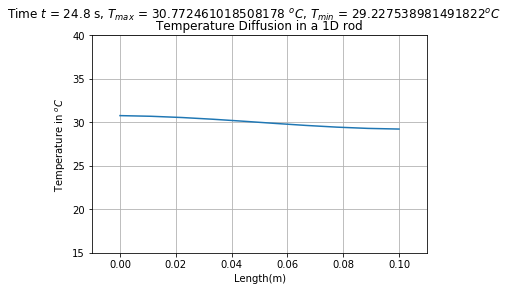

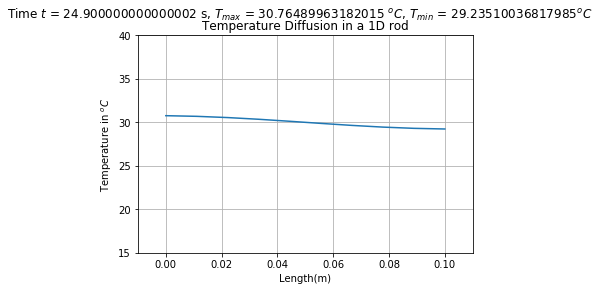

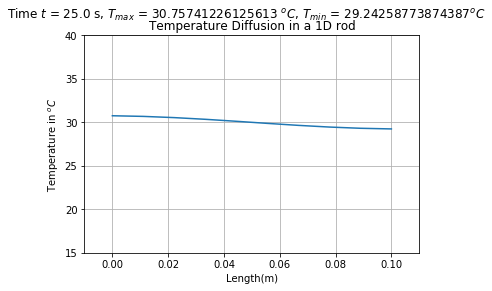

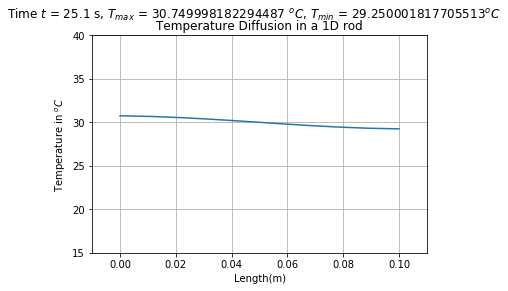

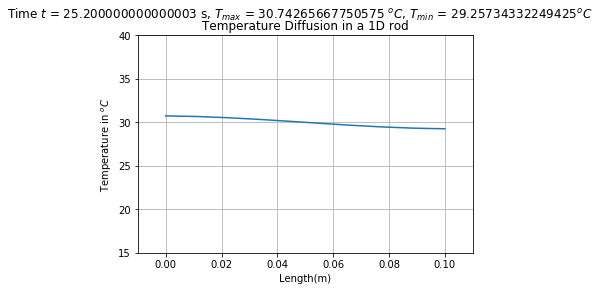

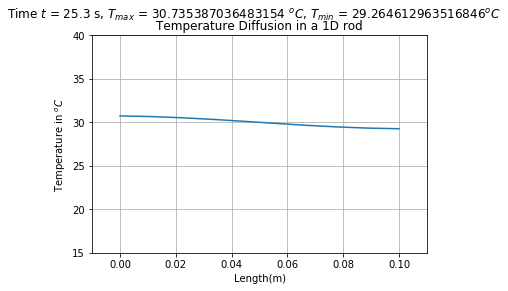

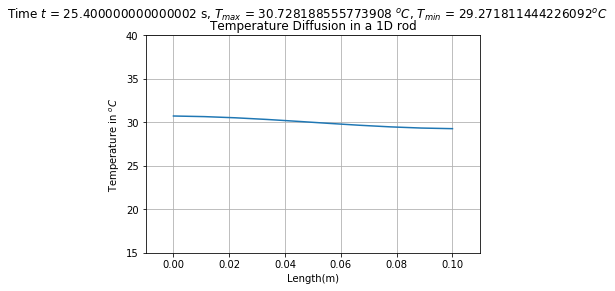

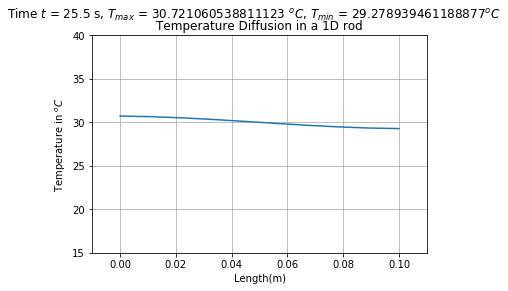

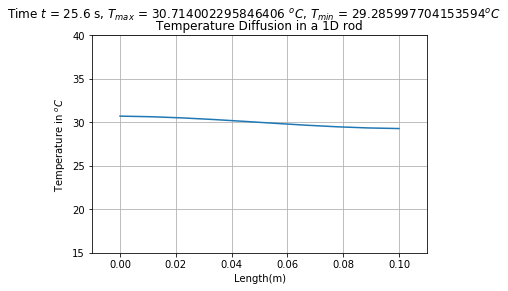

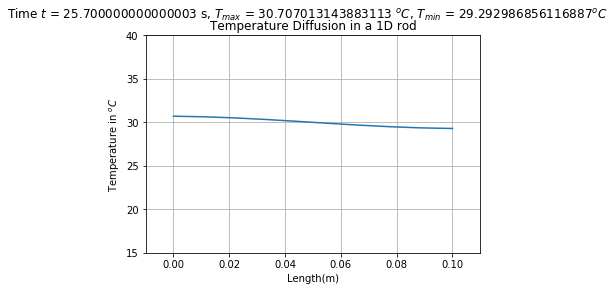

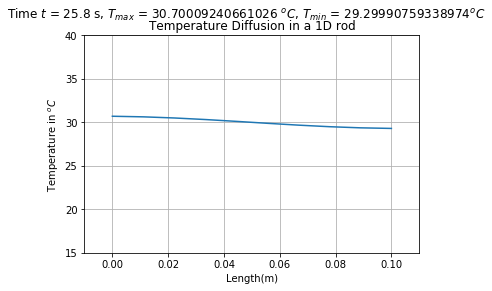

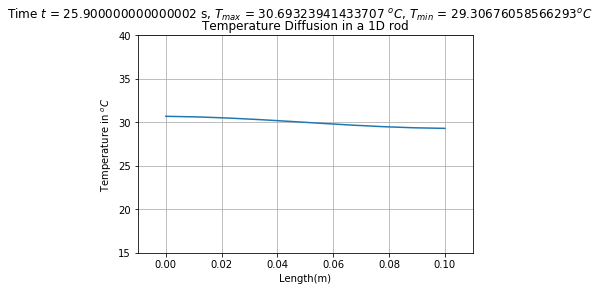

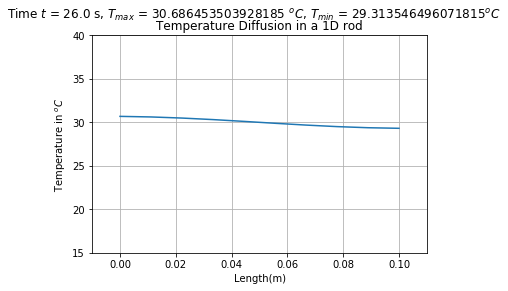

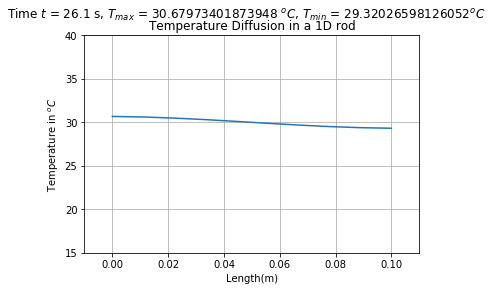

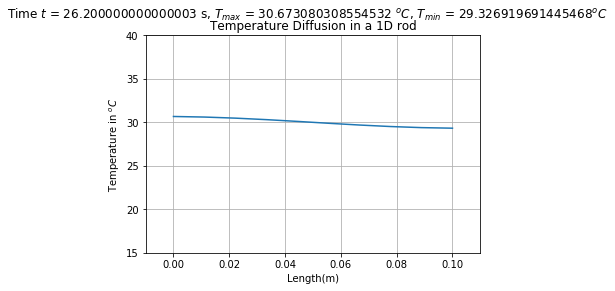

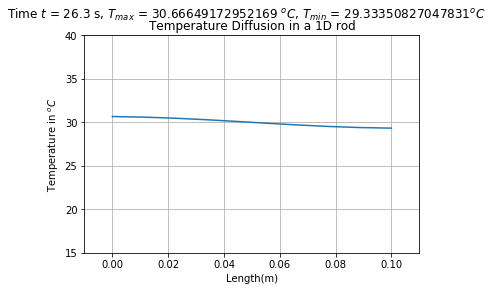

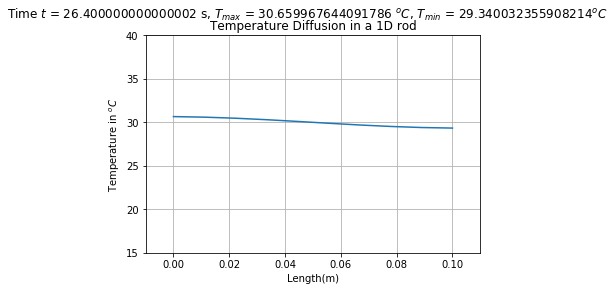

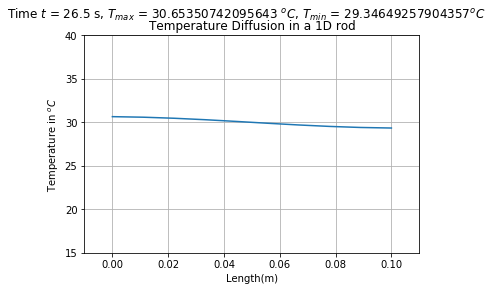

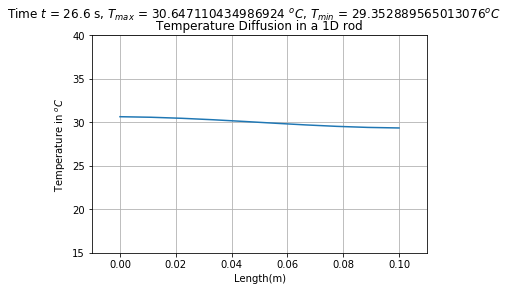

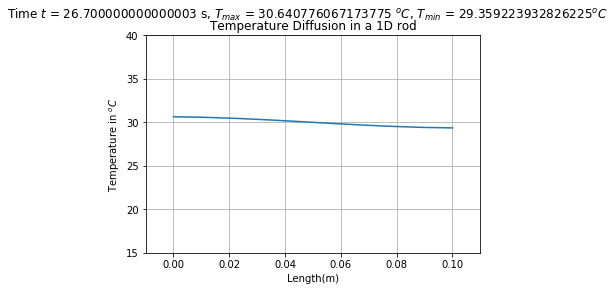

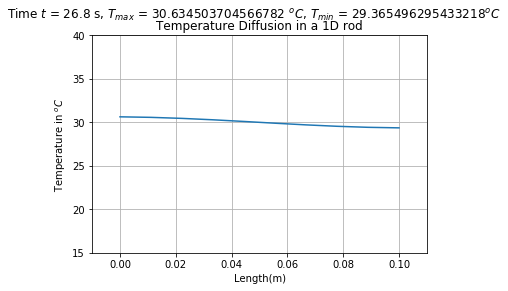

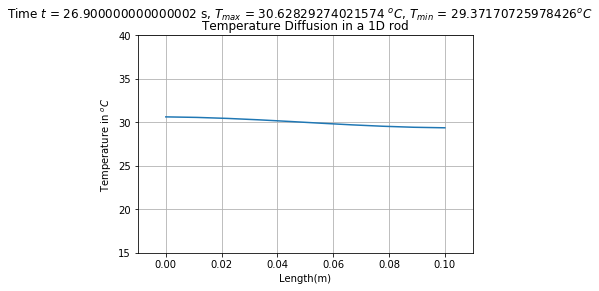

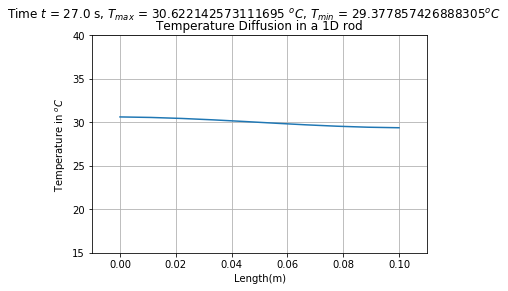

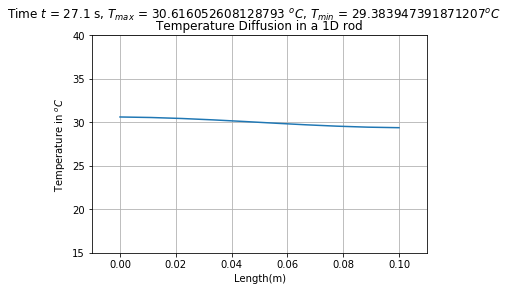

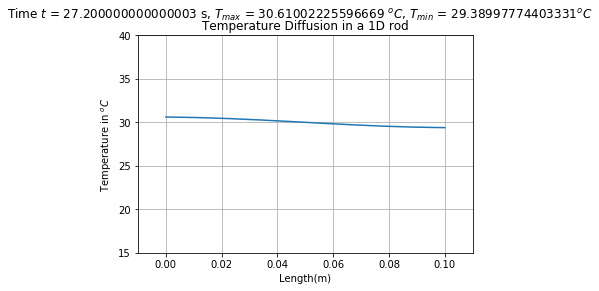

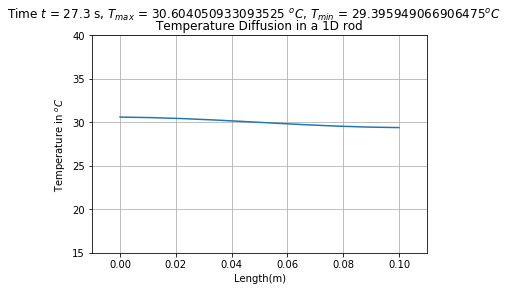

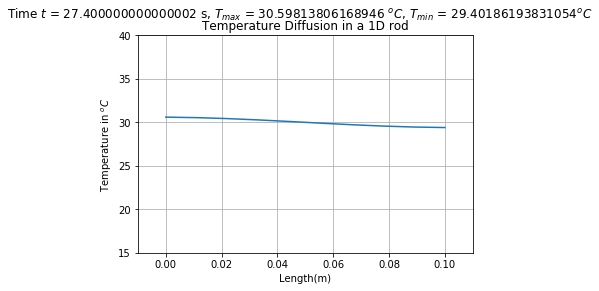

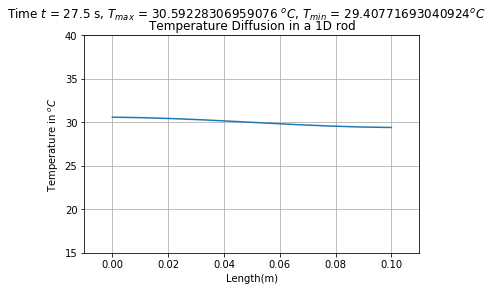

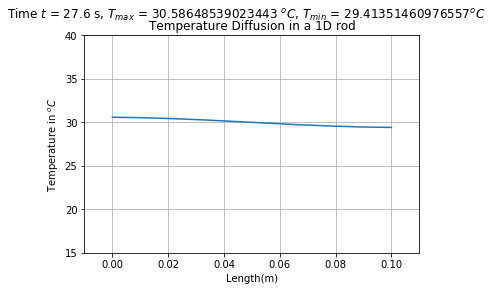

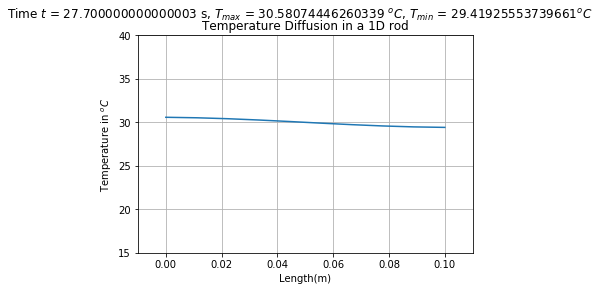

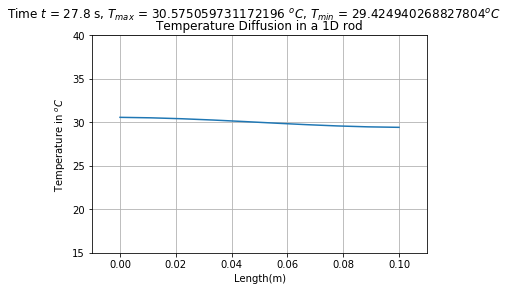

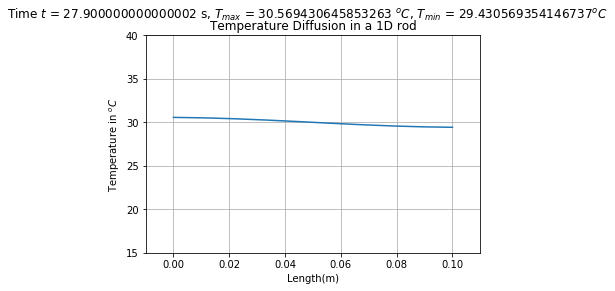

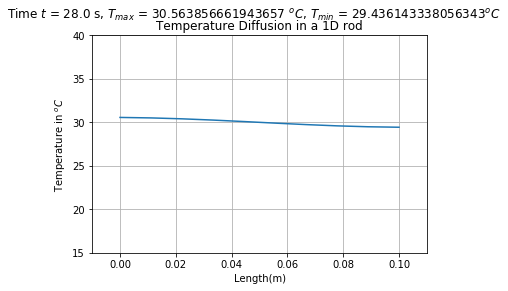

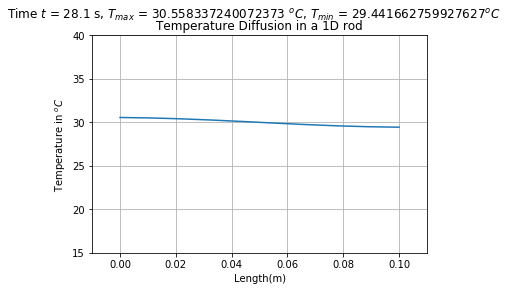

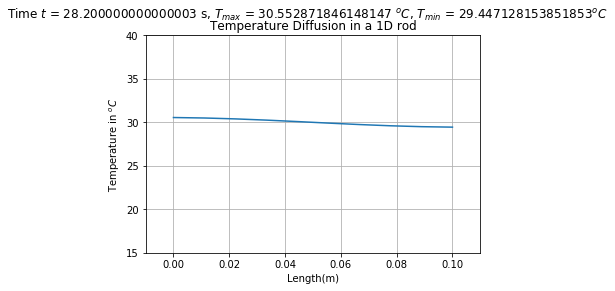

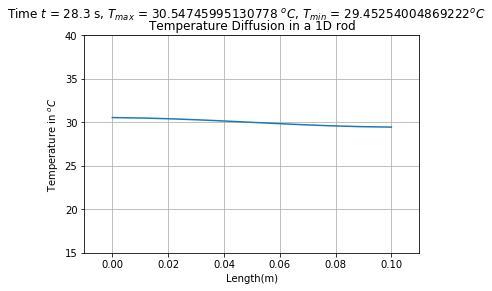

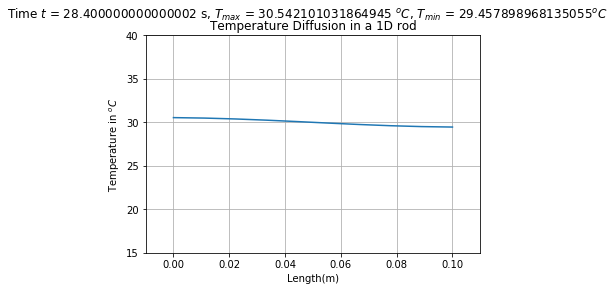

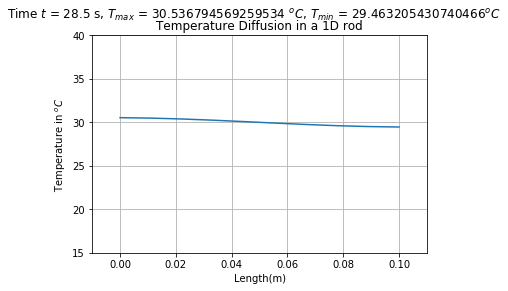

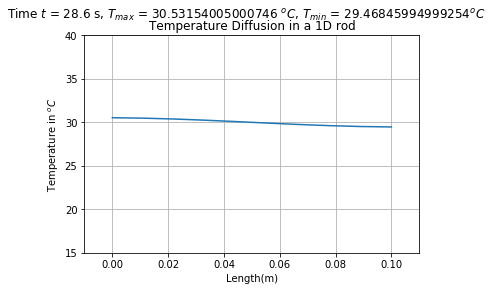

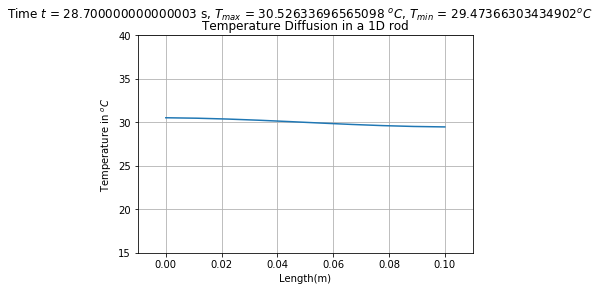

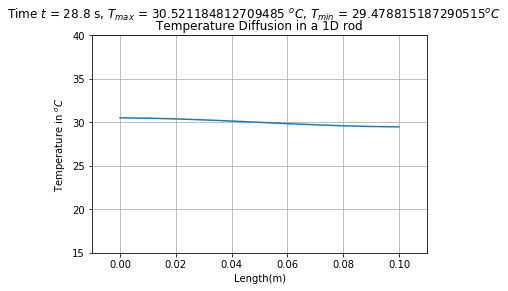

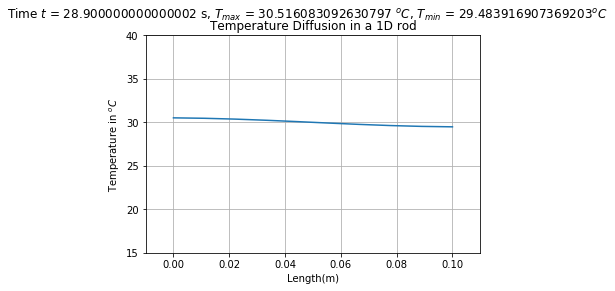

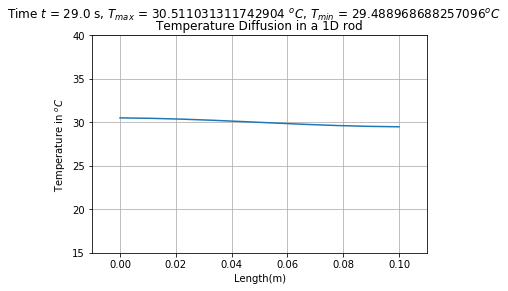

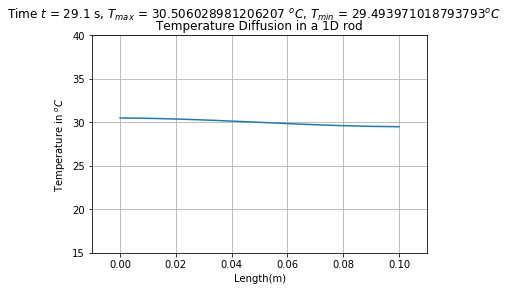

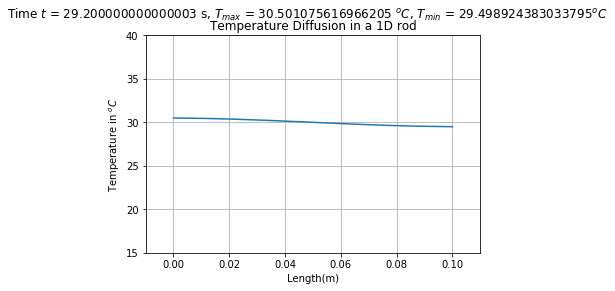

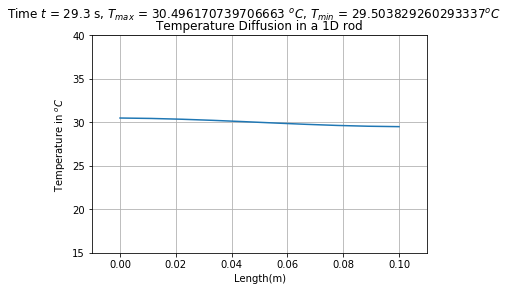

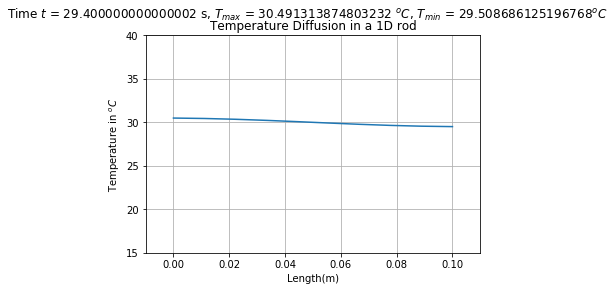

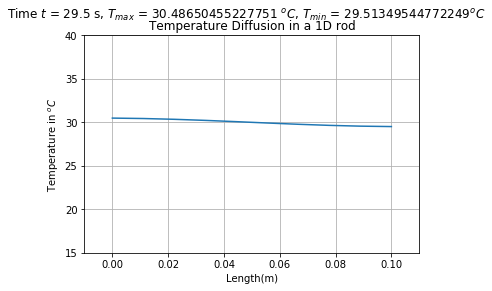

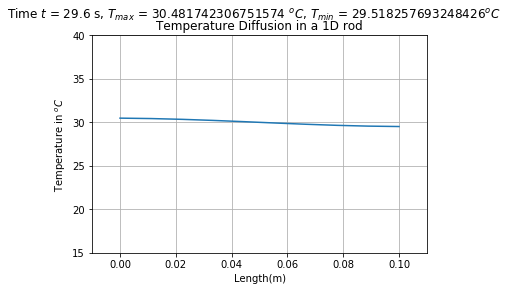

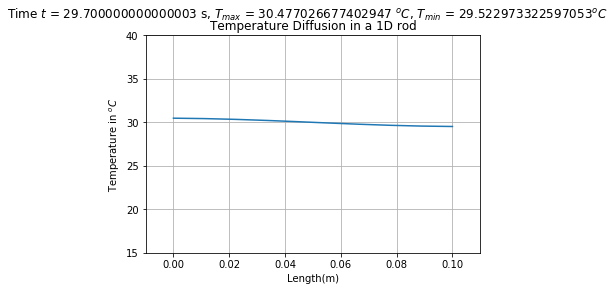

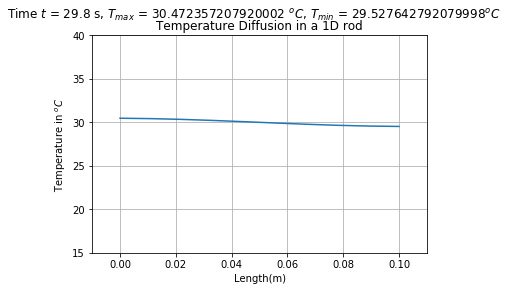

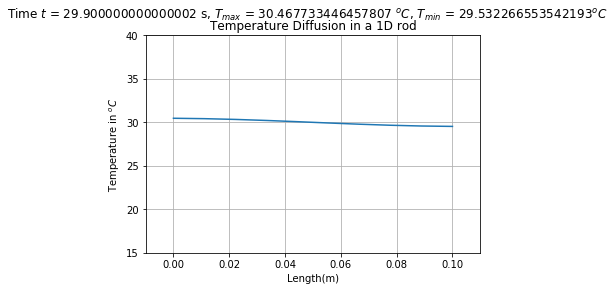

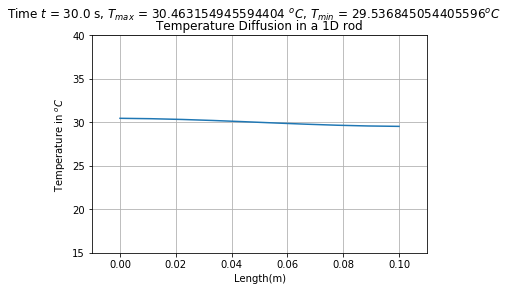

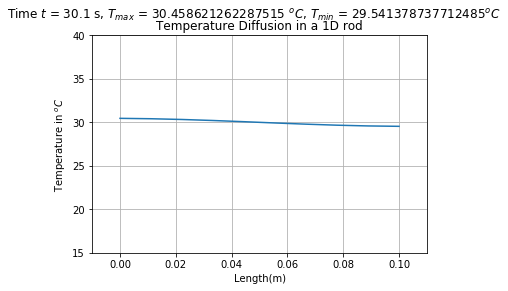

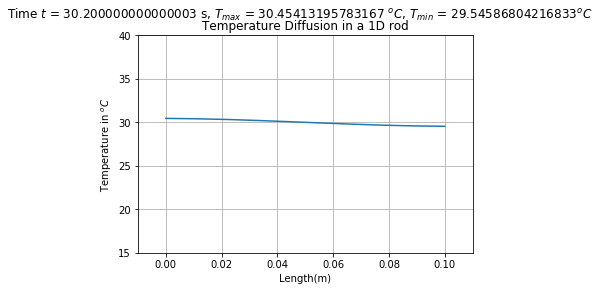

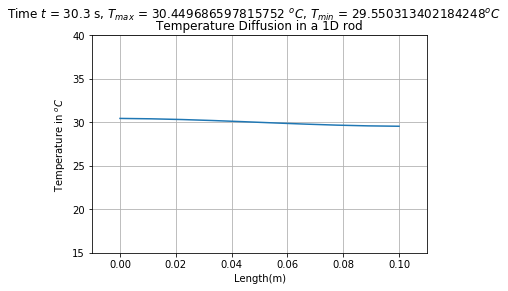

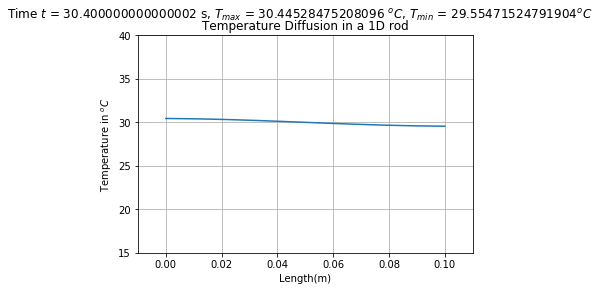

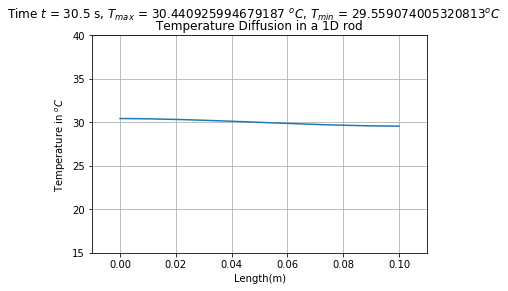

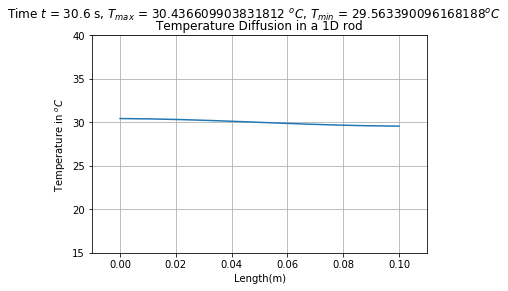

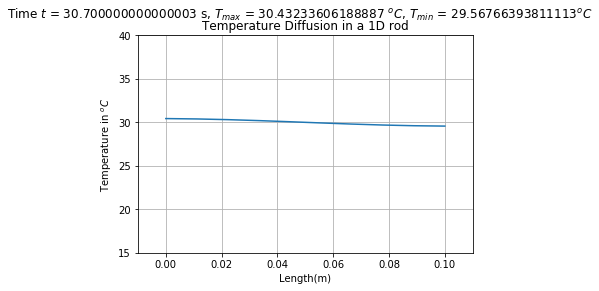

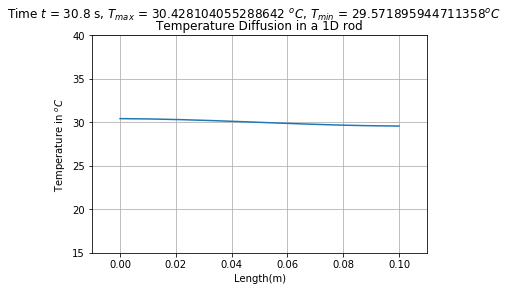

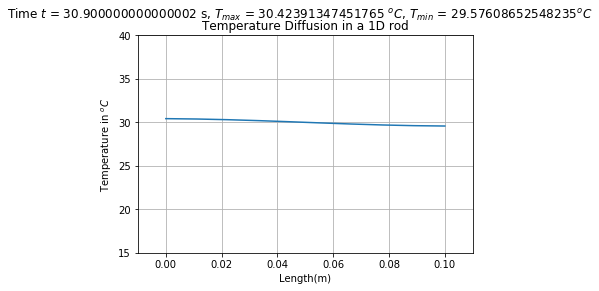

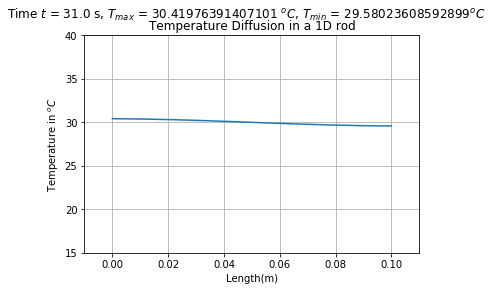

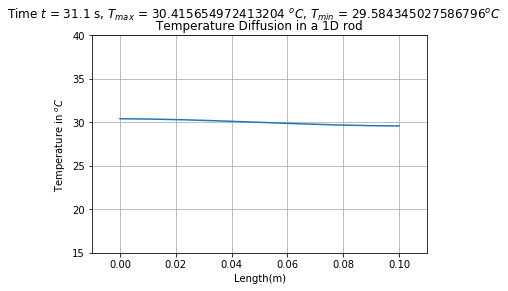

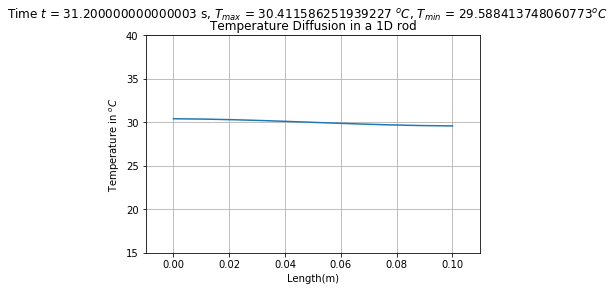

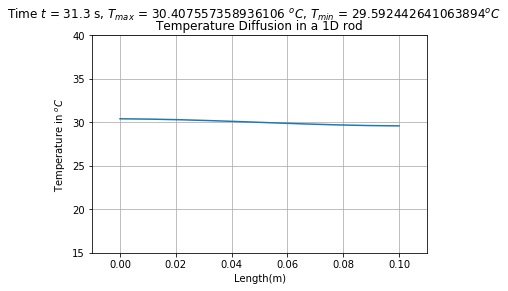

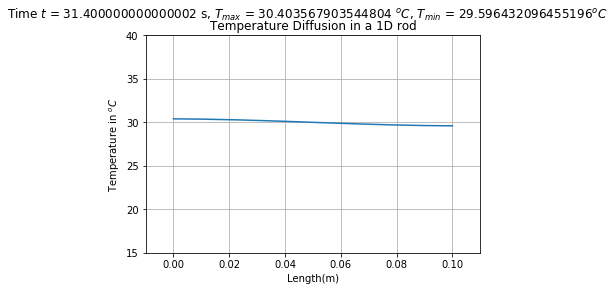

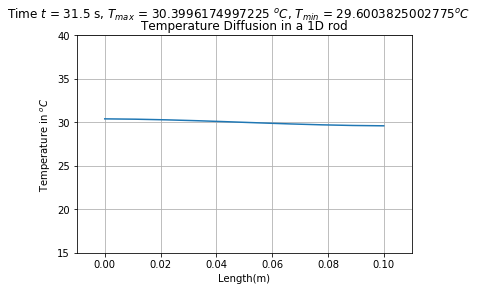

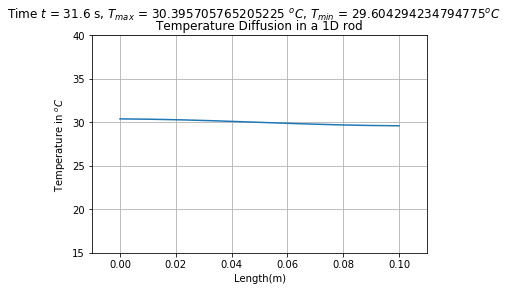

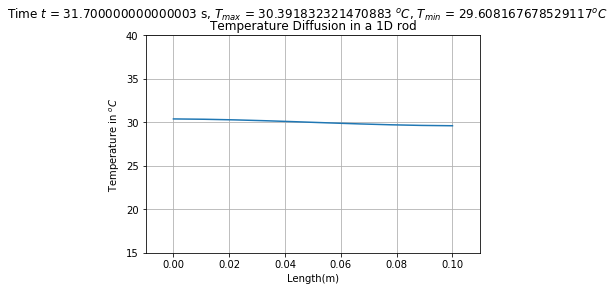

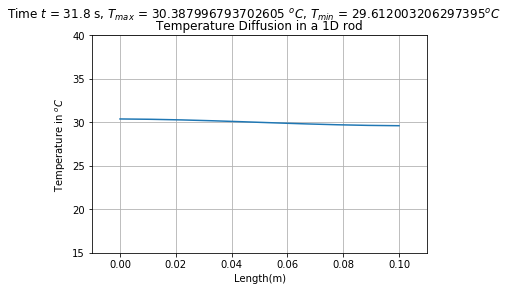

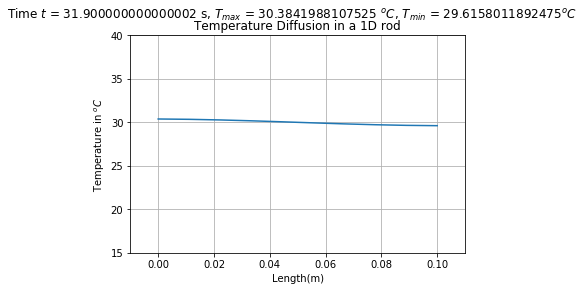

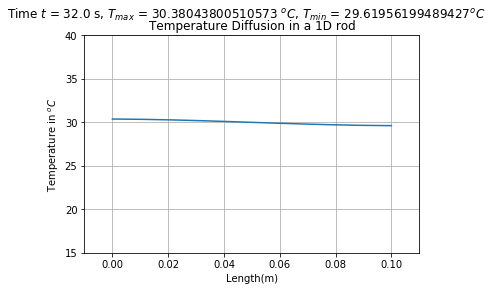

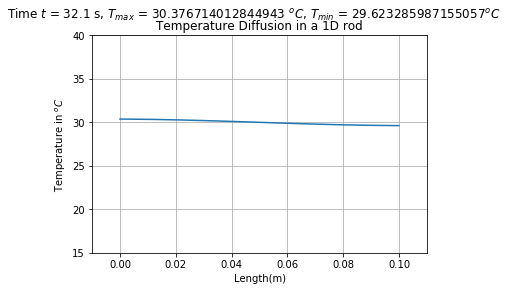

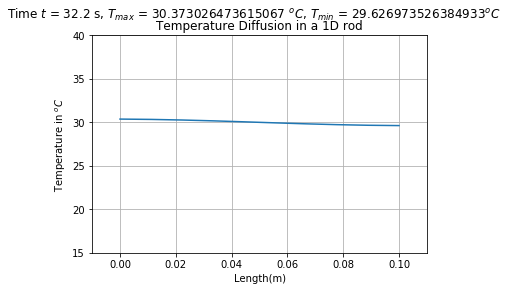

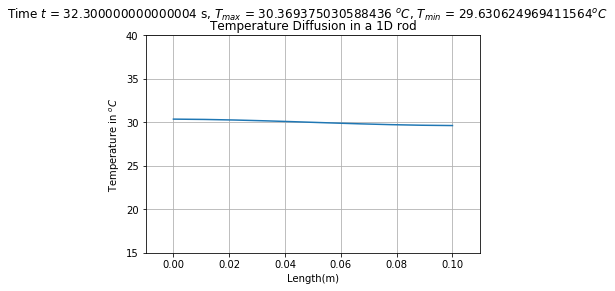

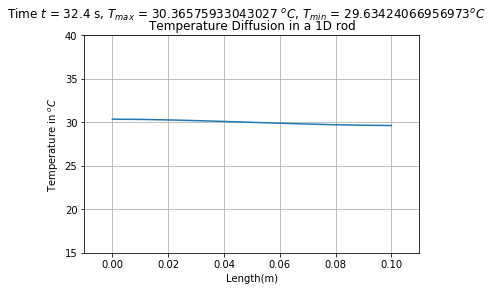

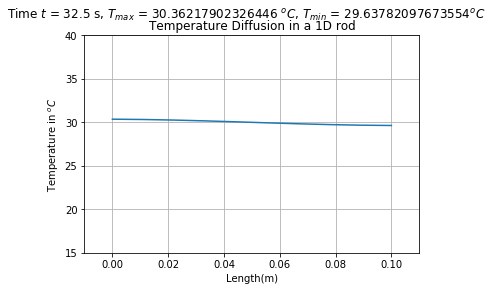

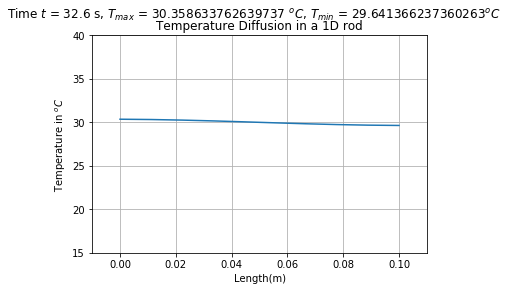

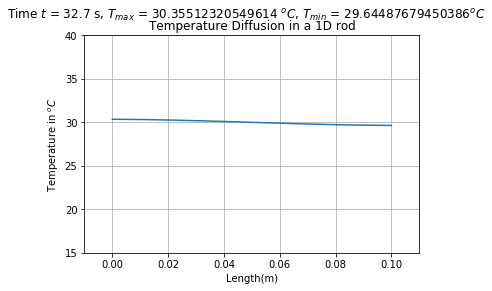

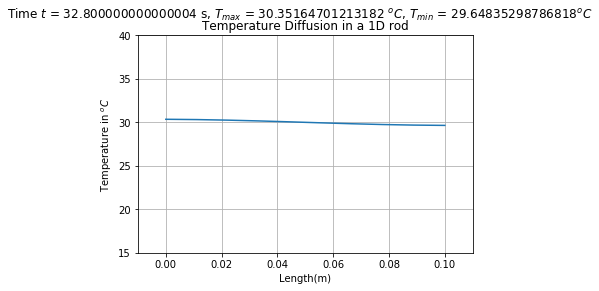

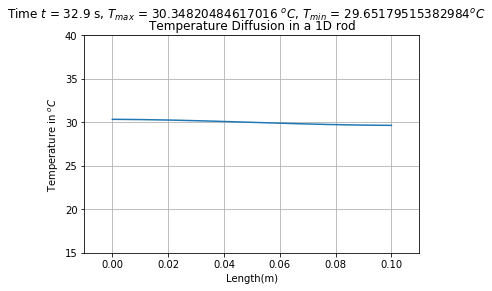

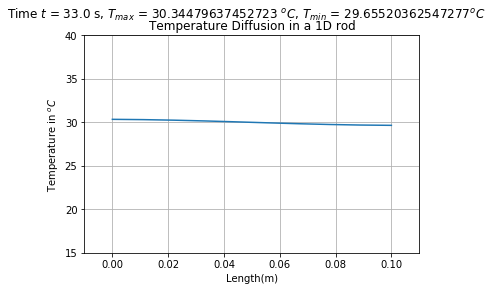

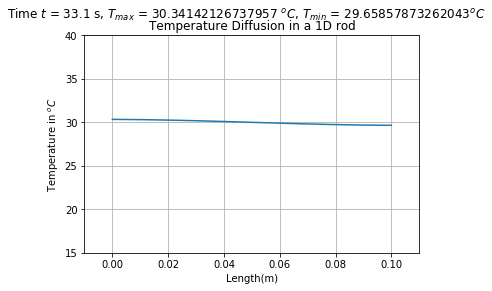

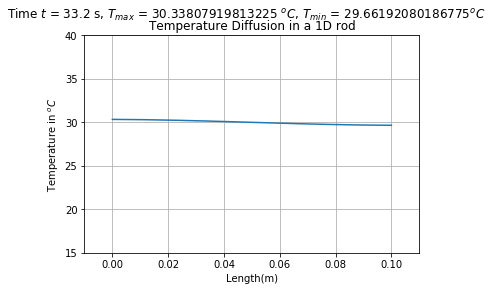

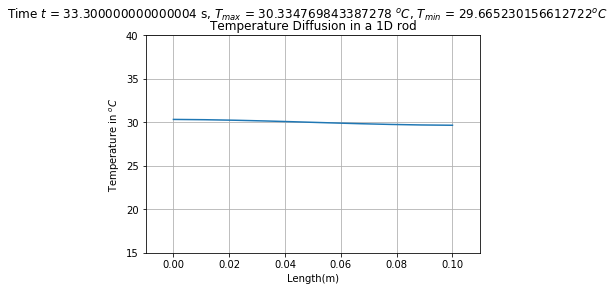

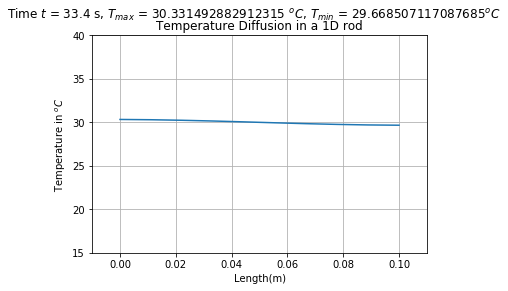

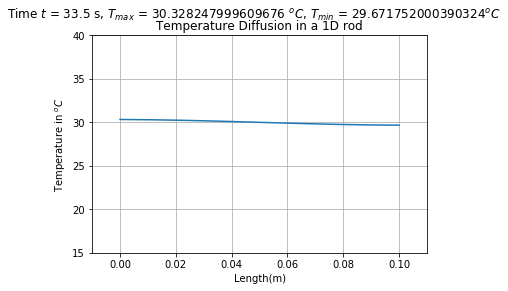

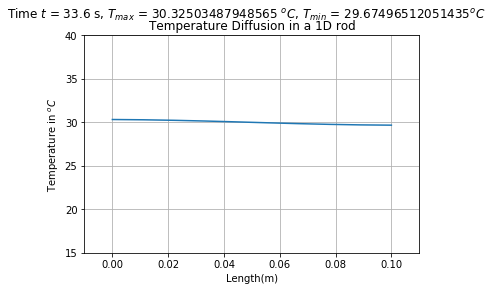

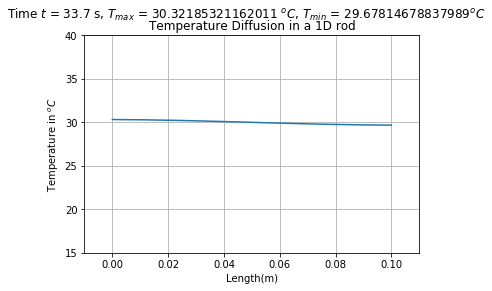

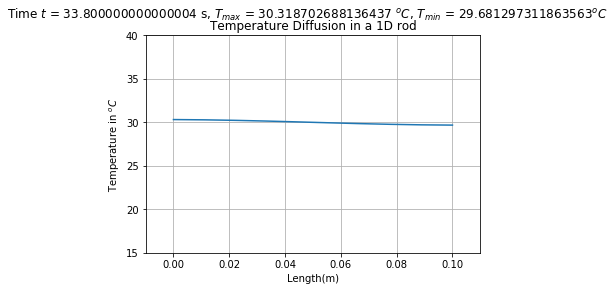

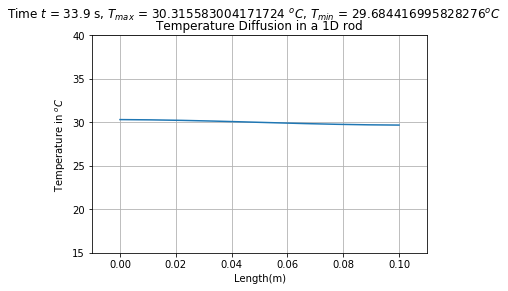

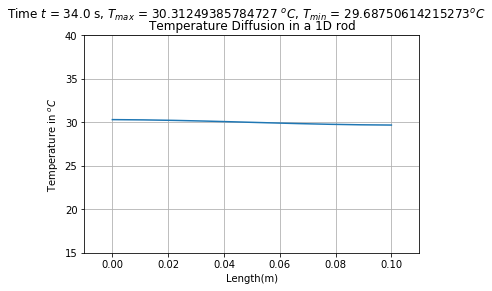

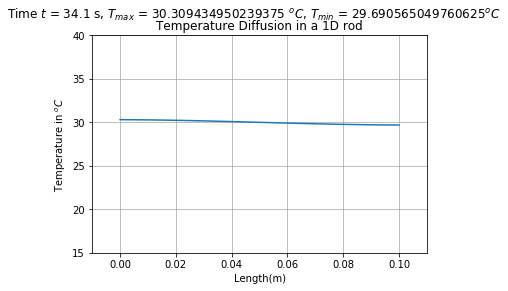

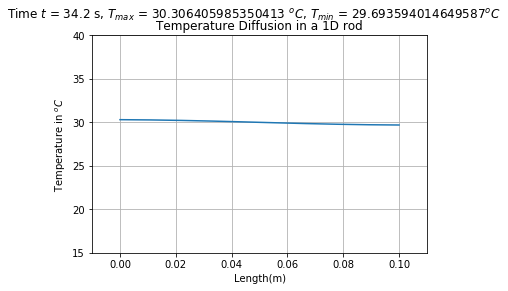

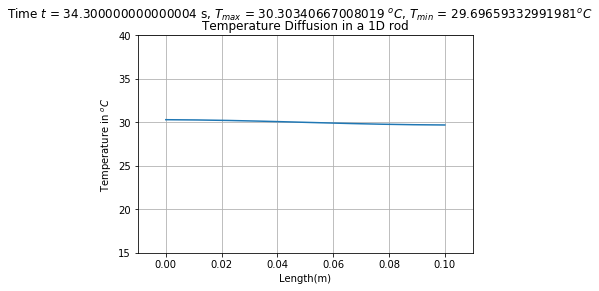

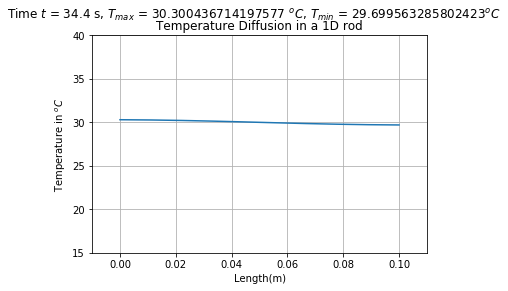

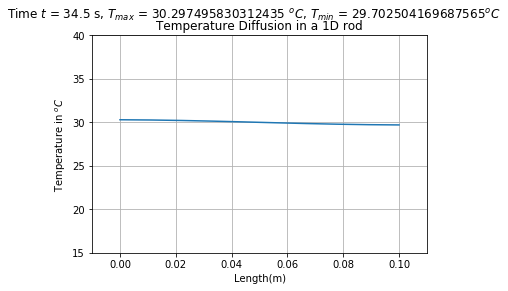

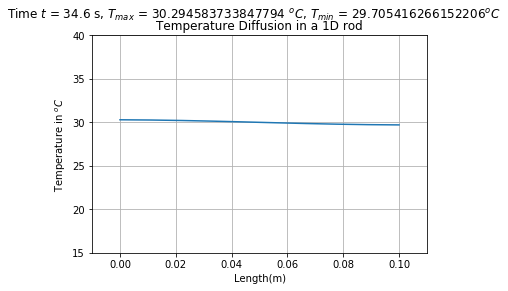

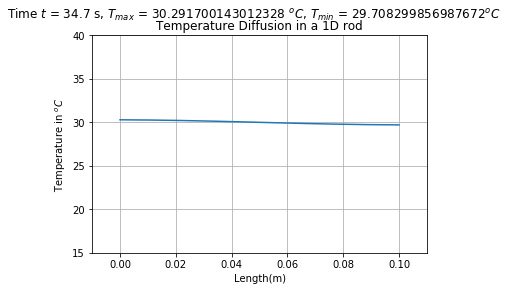

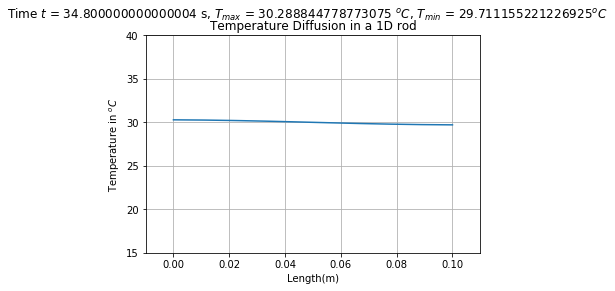

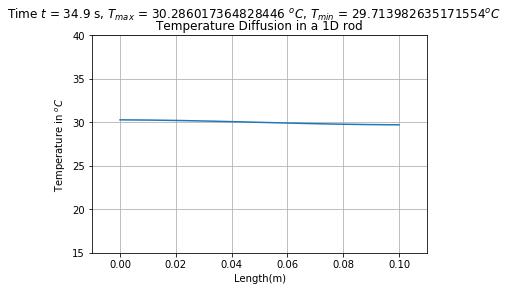

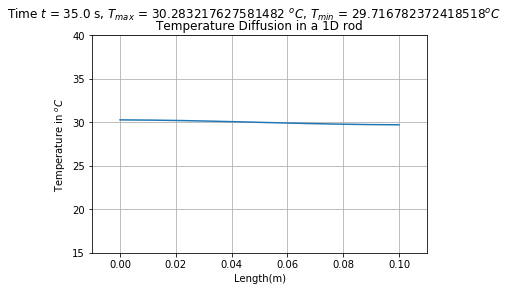

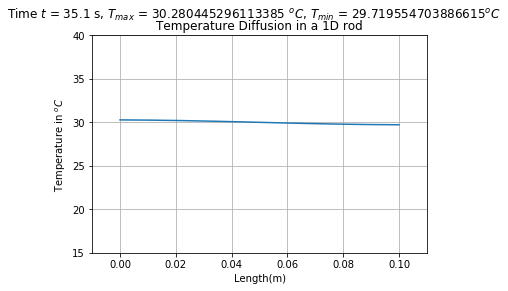

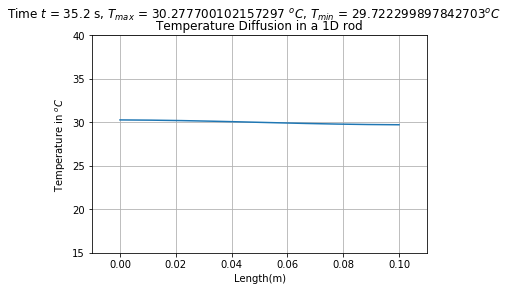

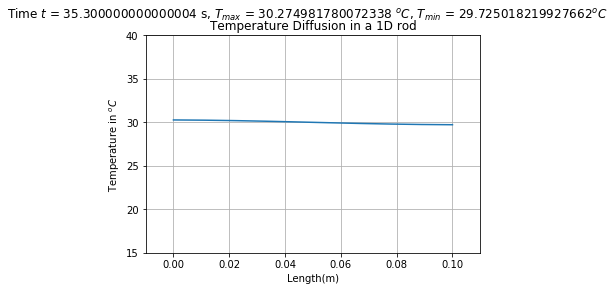

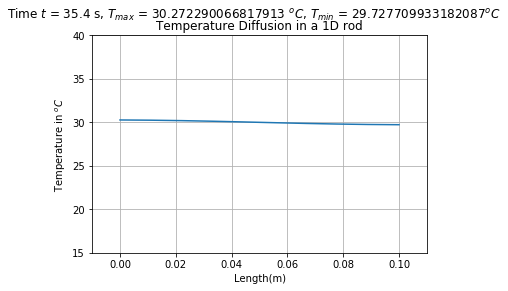

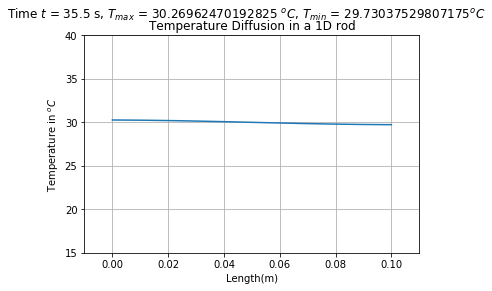

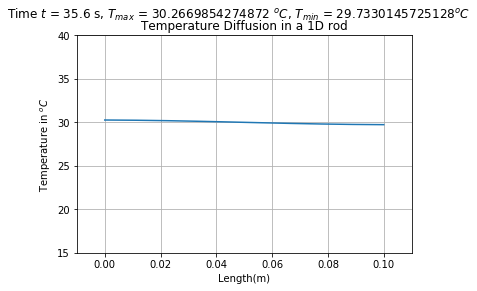

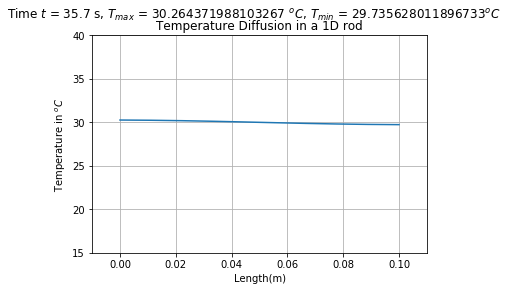

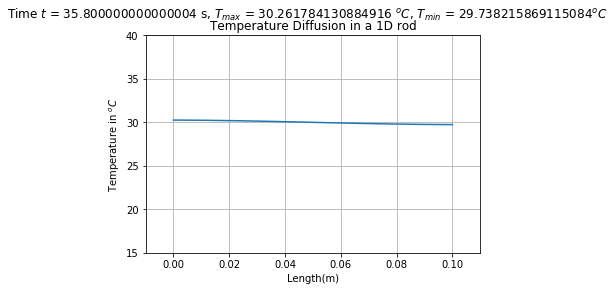

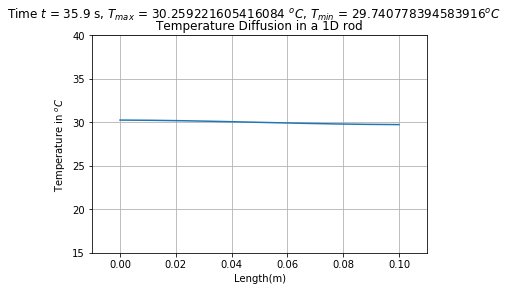

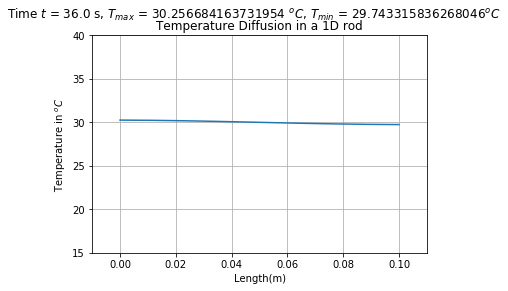

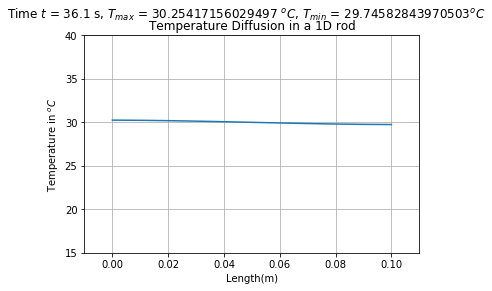

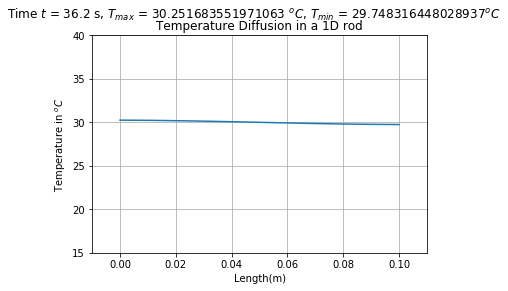

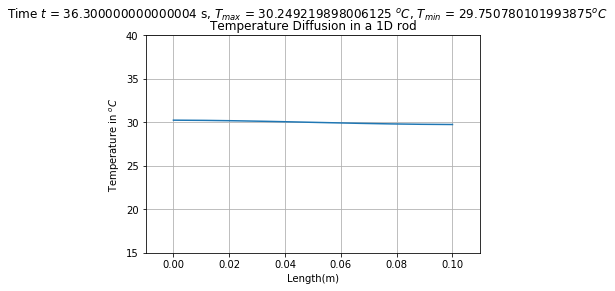

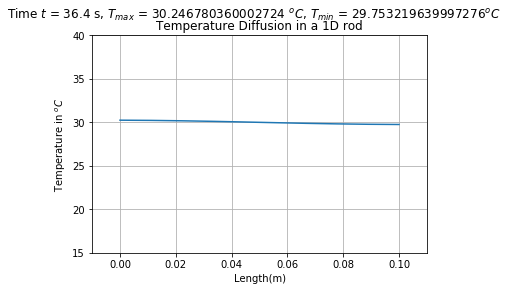

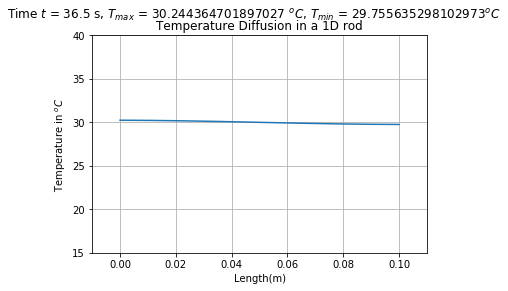

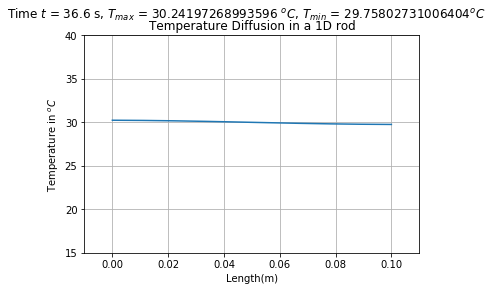

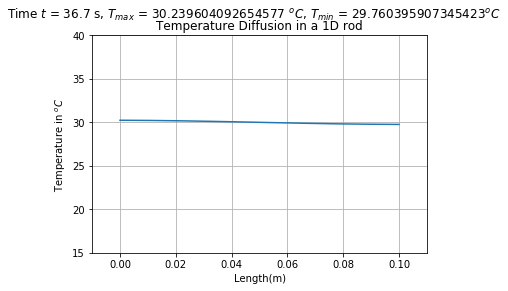

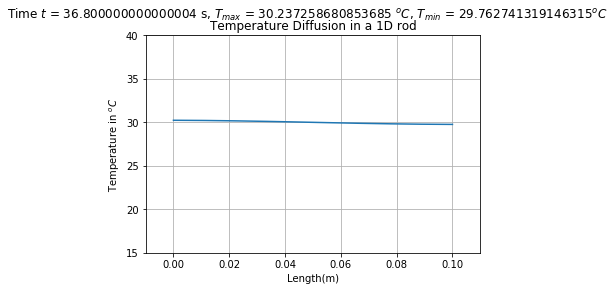

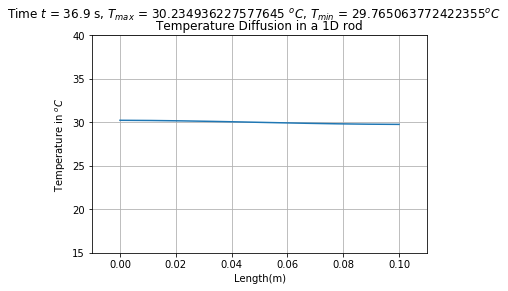

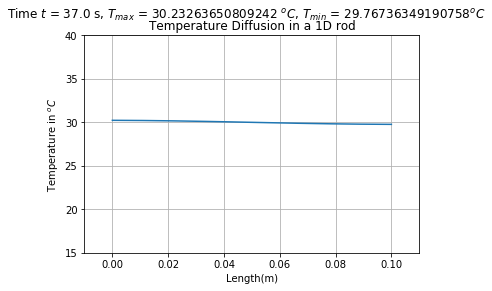

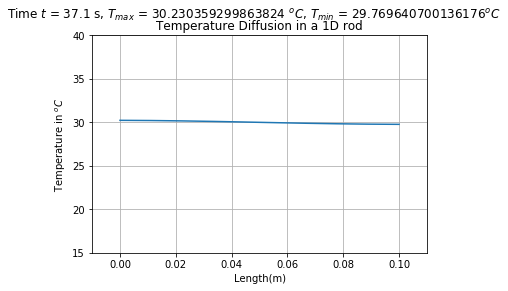

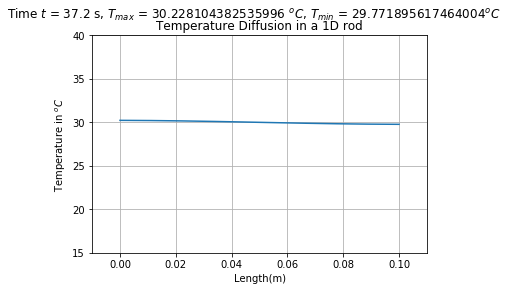

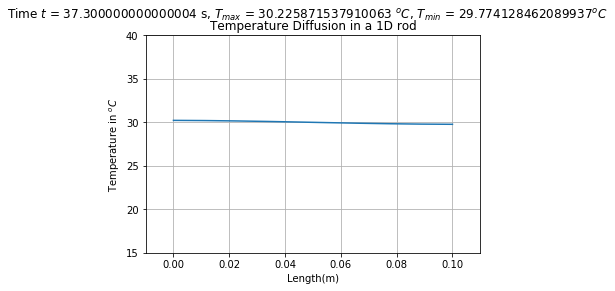

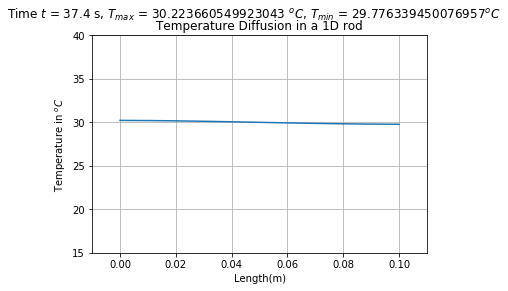

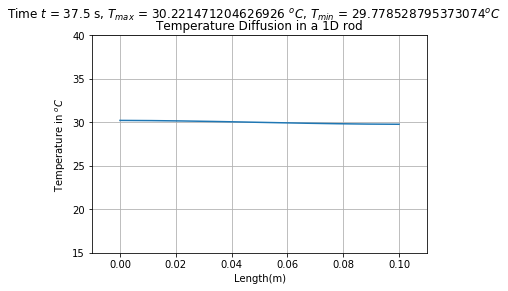

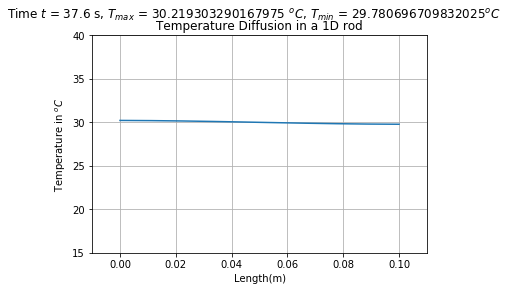

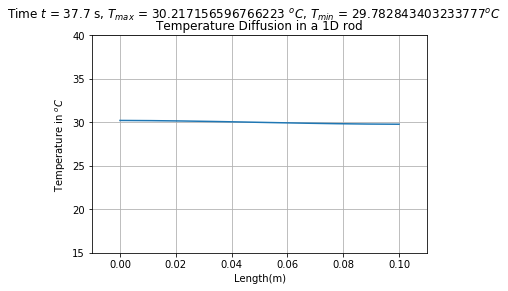

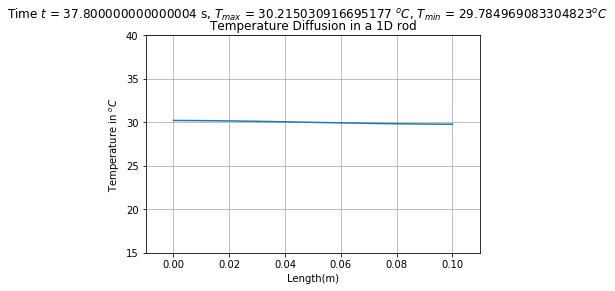

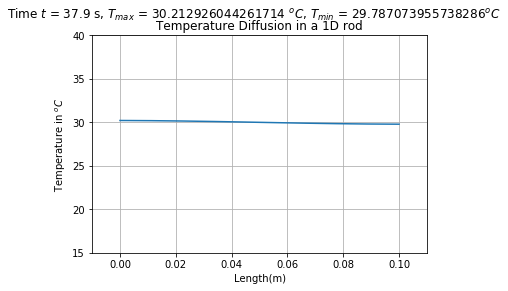

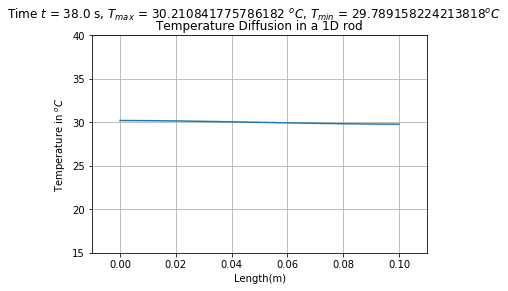

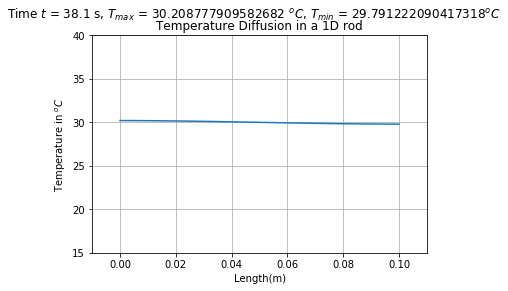

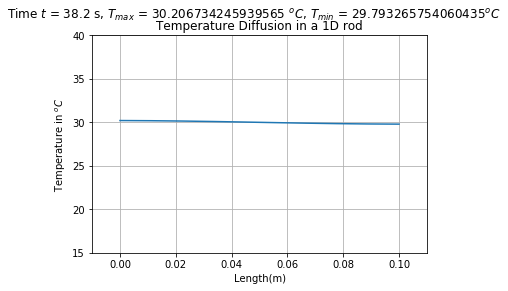

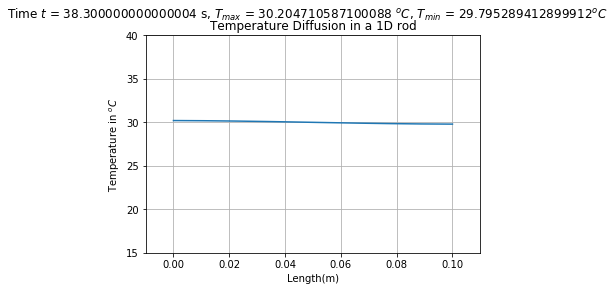

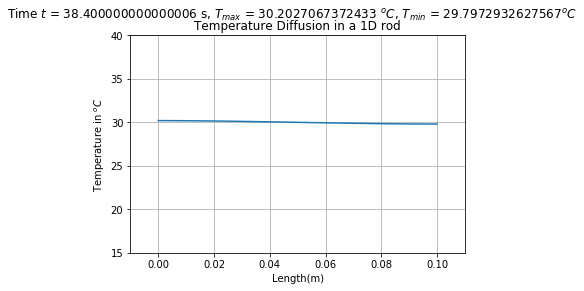

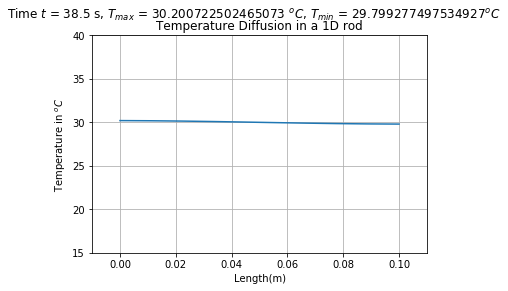

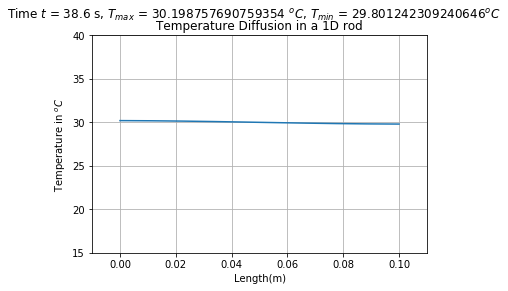

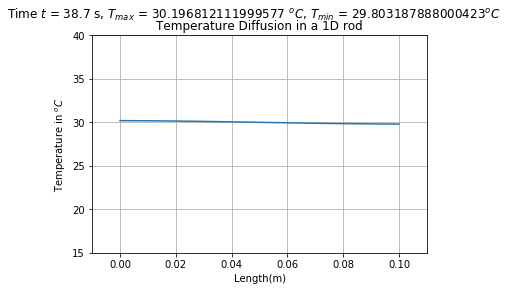

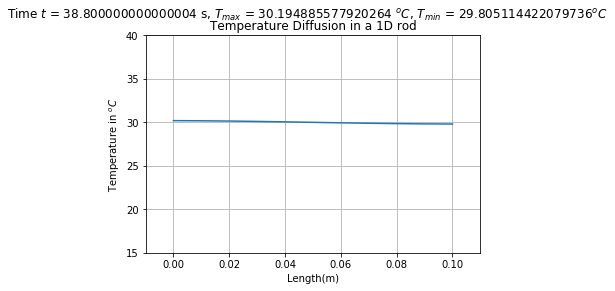

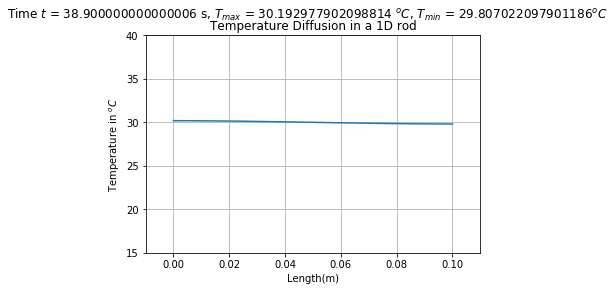

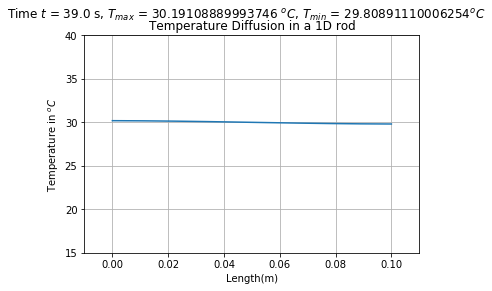

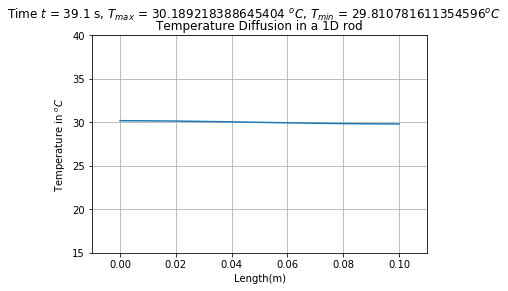

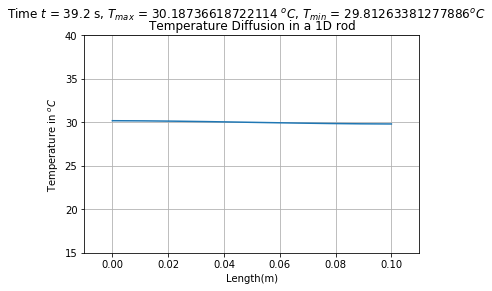

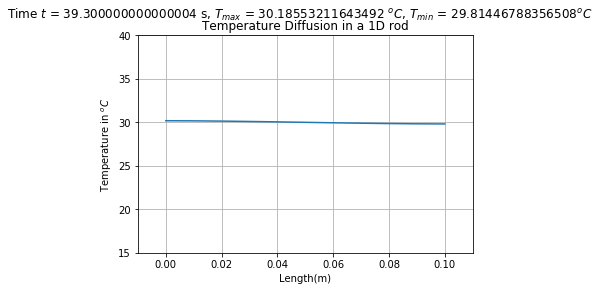

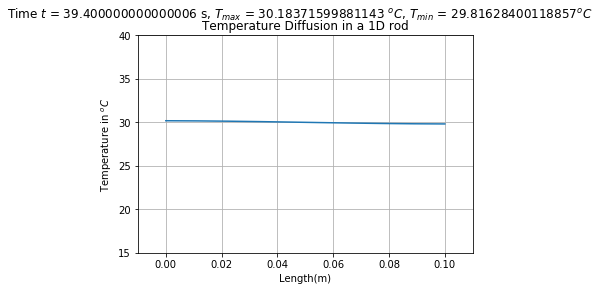

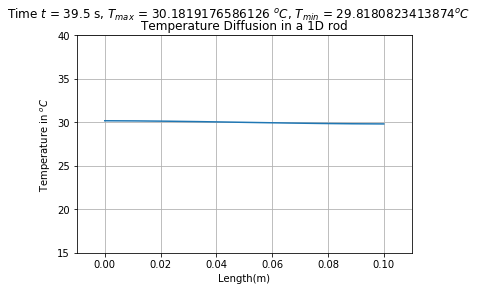

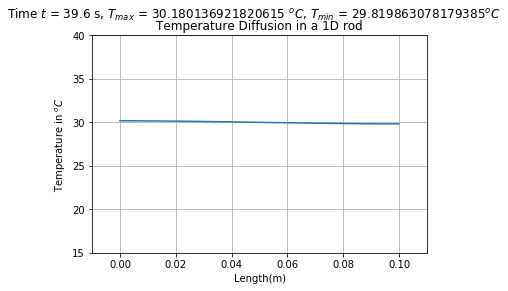

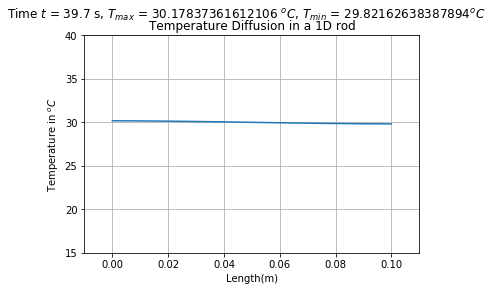

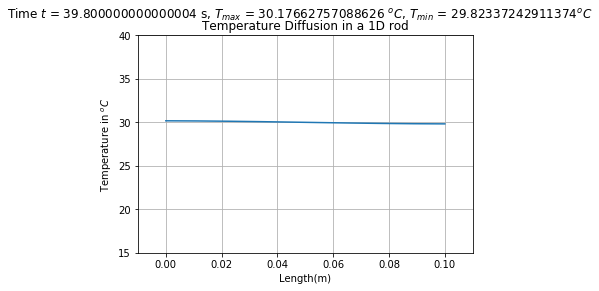

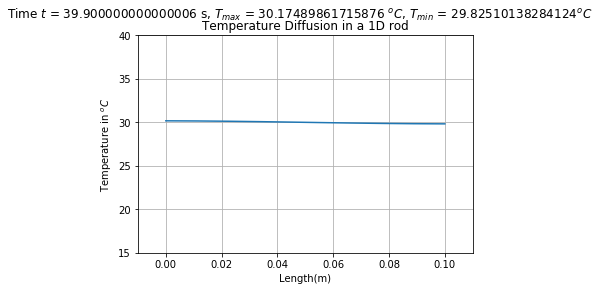

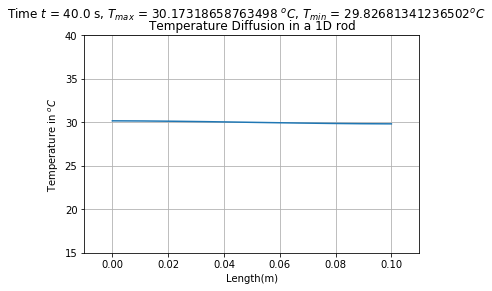

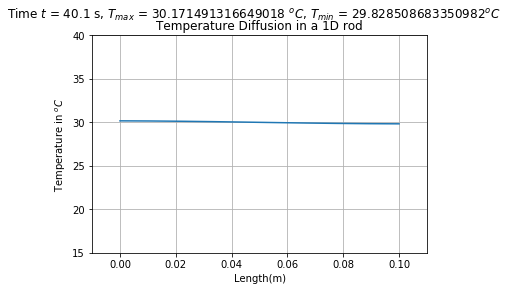

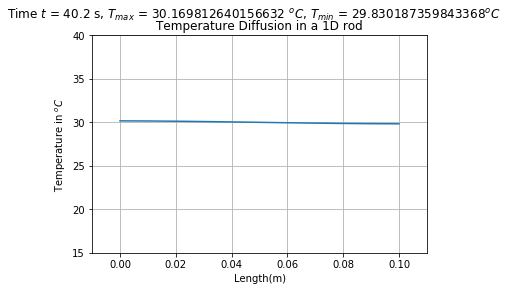

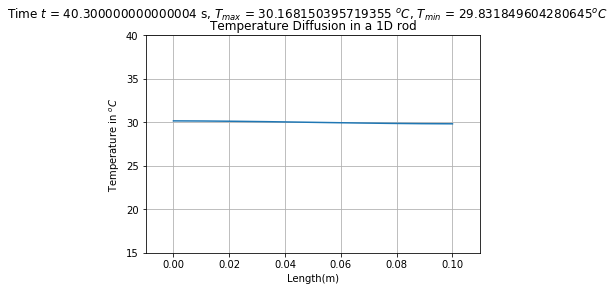

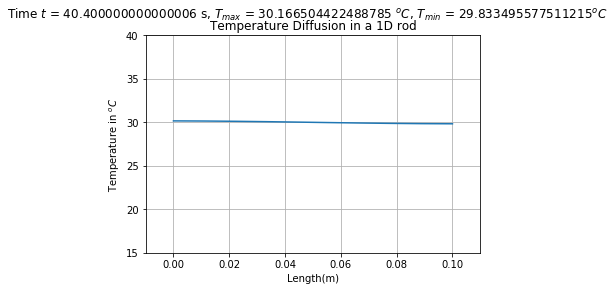

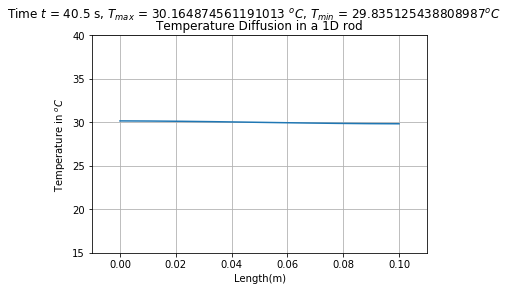

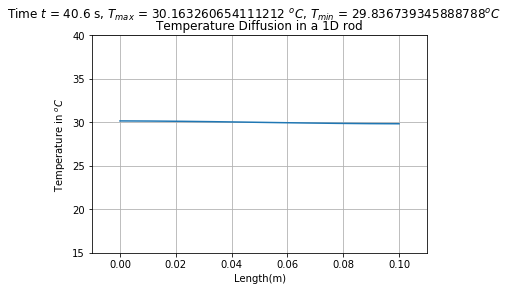

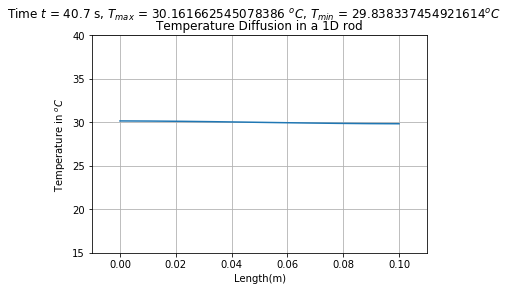

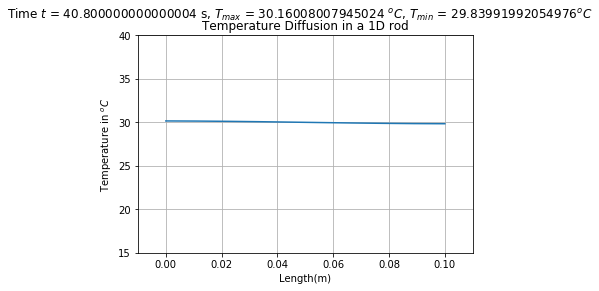

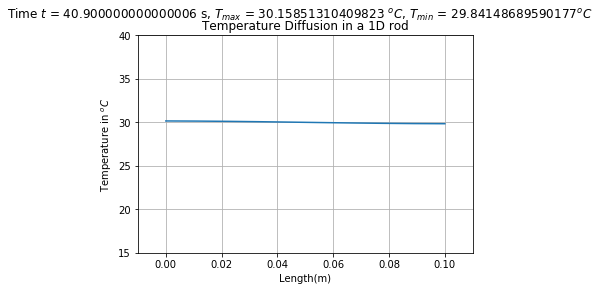

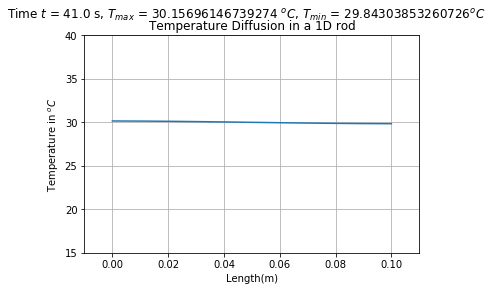

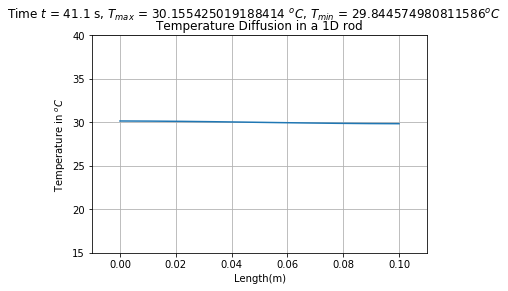

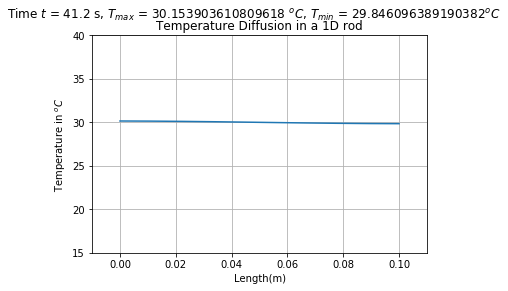

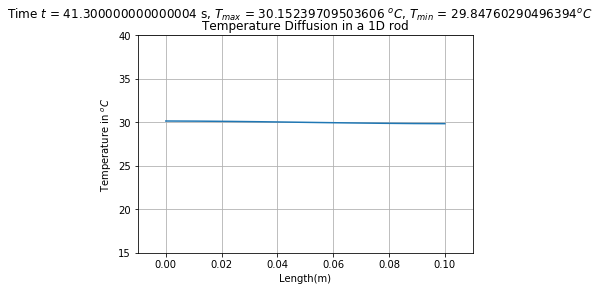

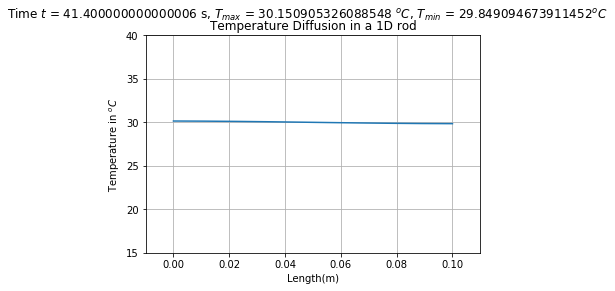

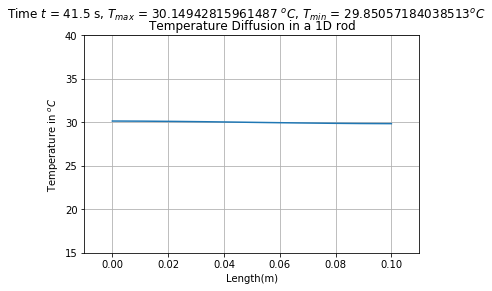

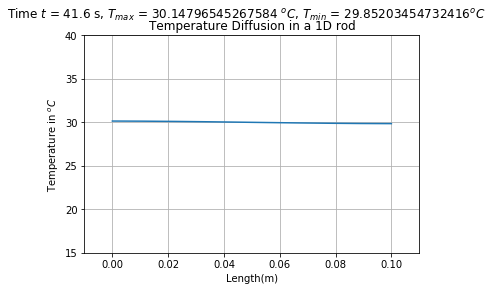

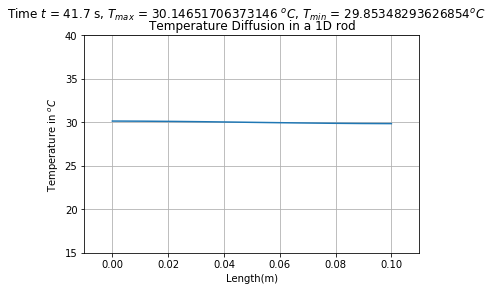

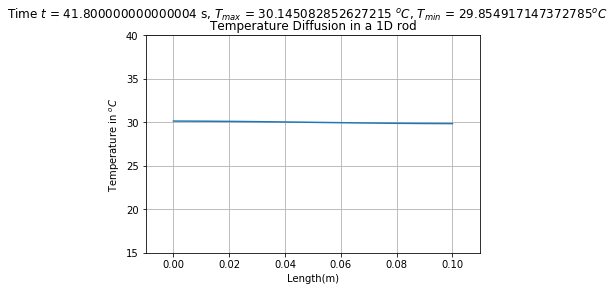

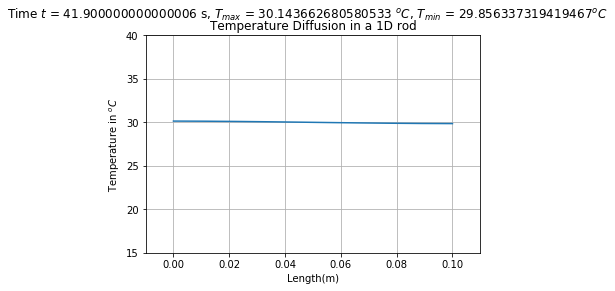

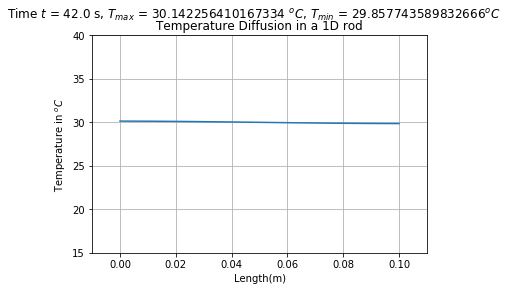

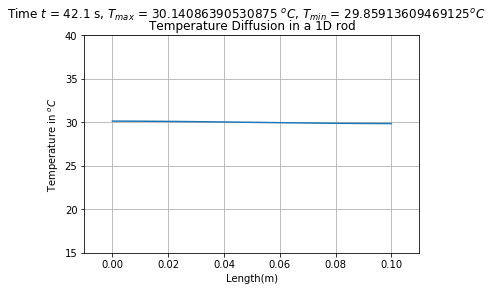

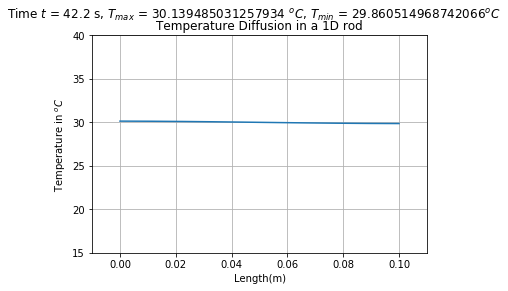

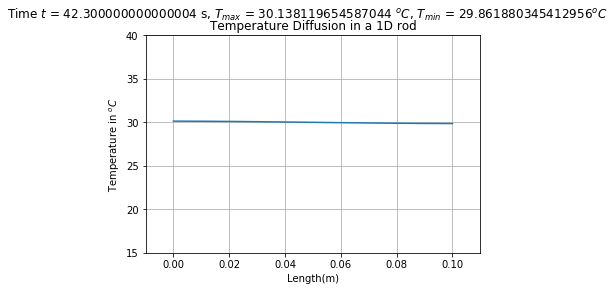

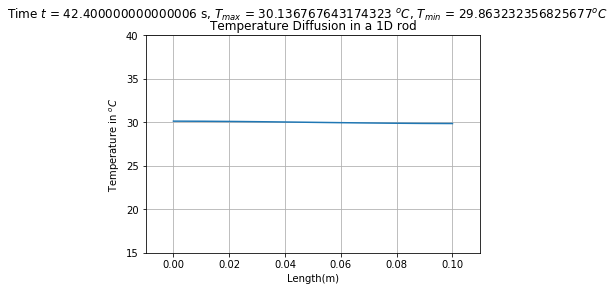

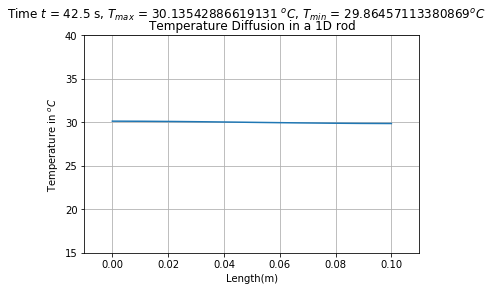

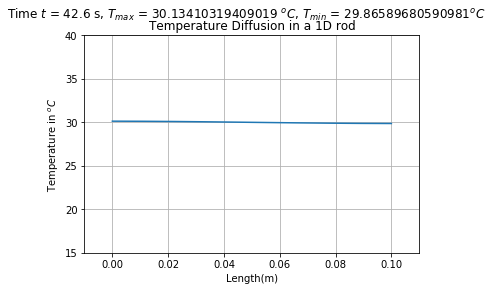

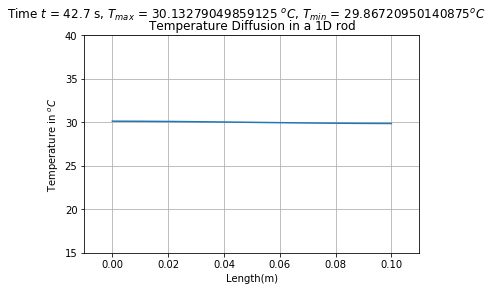

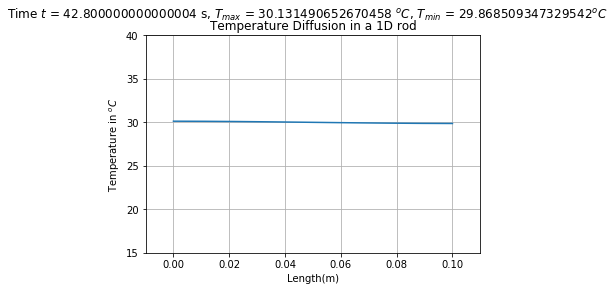

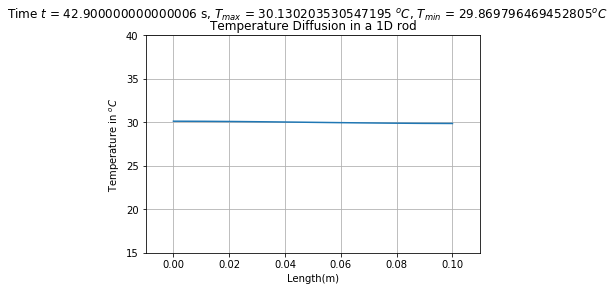

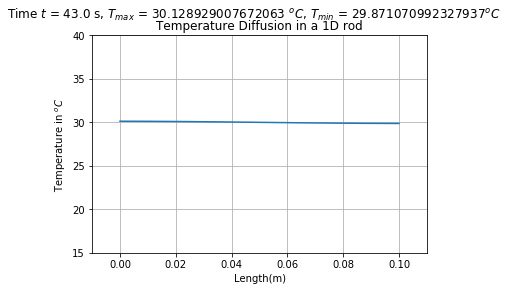

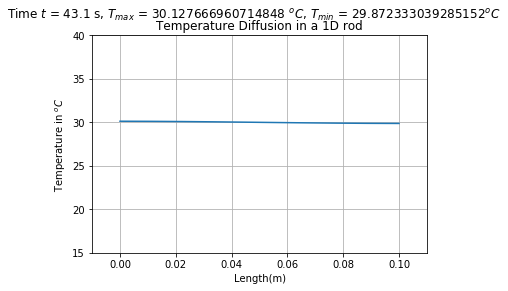

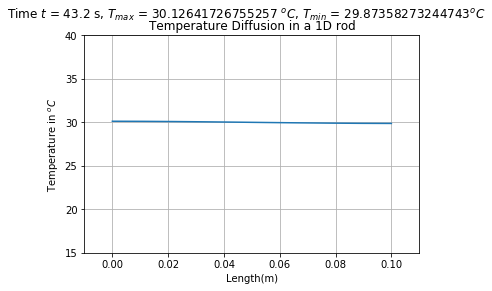

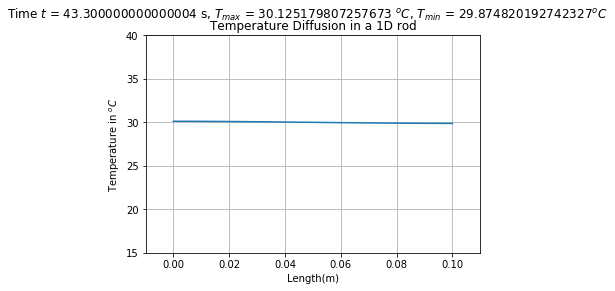

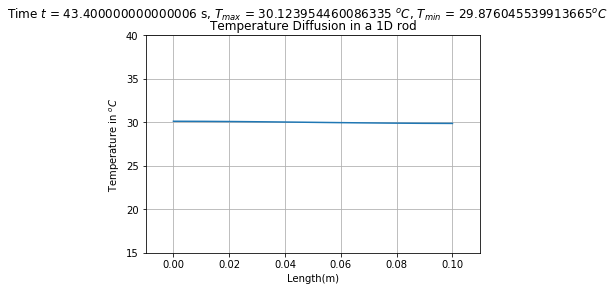

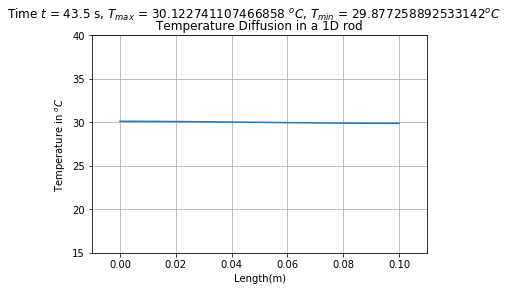

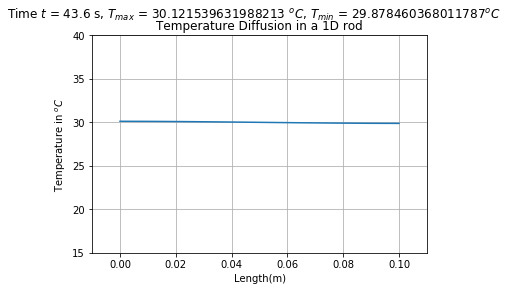

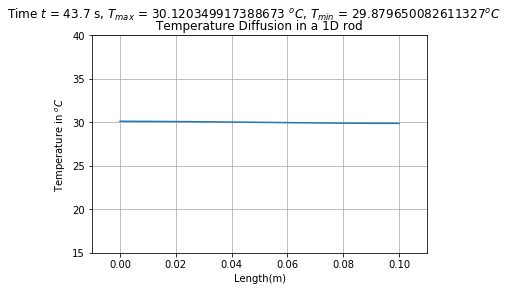

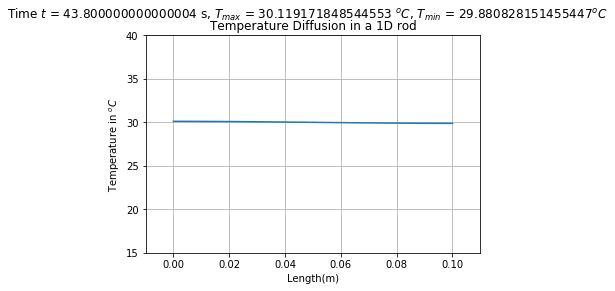

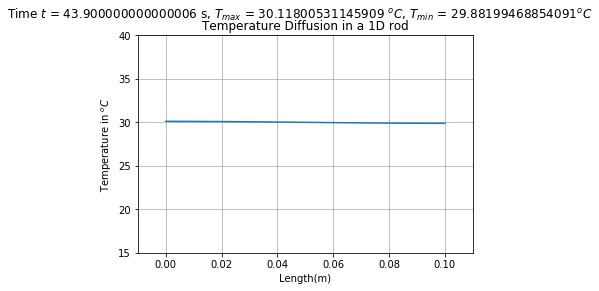

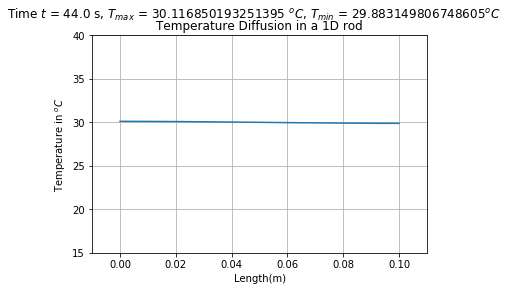

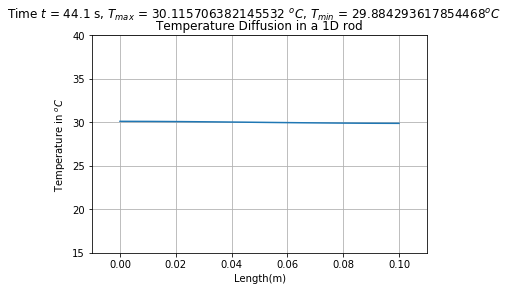

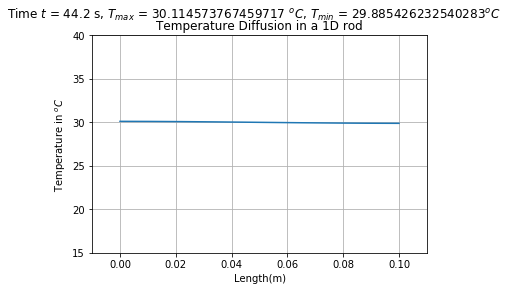

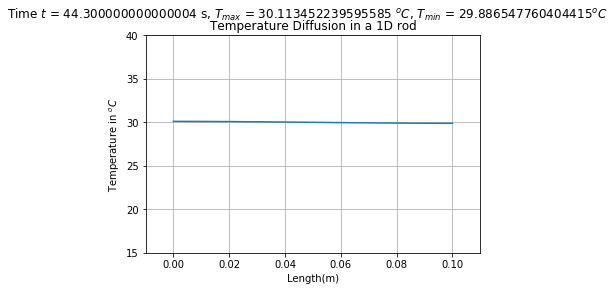

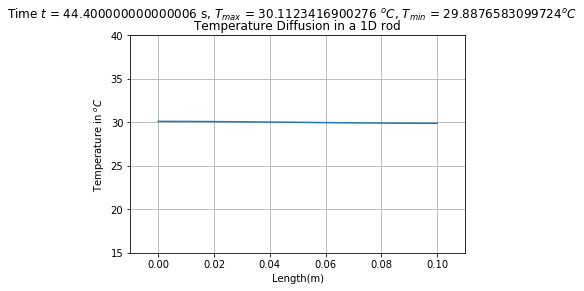

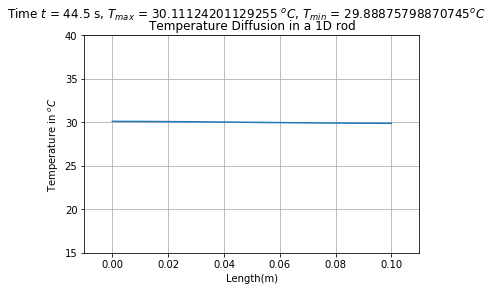

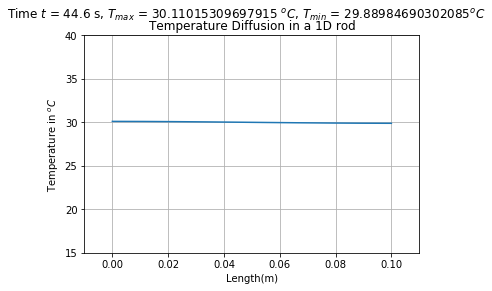

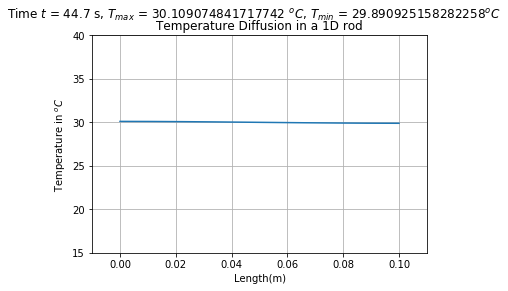

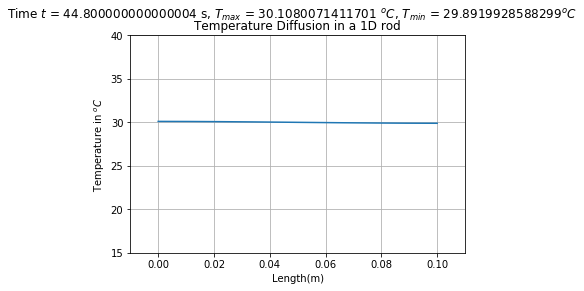

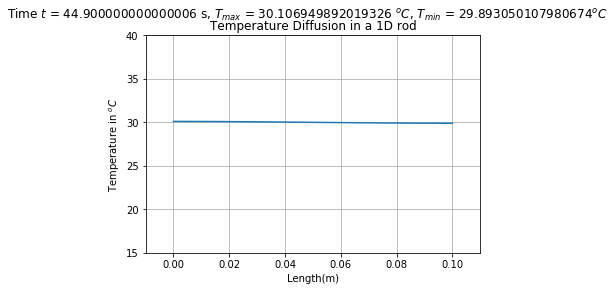

In [7]:
for j in range(1,len(t)):
    plt.clf()
    for i in range(1,n-1):
        dTdt[i] = alpha*( -(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2 )
    dTdt[0] = alpha*( (T[1]-T[0])/dx**2)# -(T[0]-T1s)/dx**2 )
    dTdt[n-1] =  alpha*( -(T[n-1]-T[n-2])/dx**2)#+ (T2s-T[n-1])/dx**2 )
    T = T + dTdt * dt
    Total_T.append(T)
    # plt.plot(x, T0, color='xkcd:black', label='Initial Temperature profile')
    #plt.plot(x, T, color='xkcd:salmon', label='Current Temperature profile')  # Contour plotting the values
    plt.plot(x,T)
    plt.xlabel('Length(m)', fontsize=10)  # X axis label
    plt.ylabel('Temperature in $^o C$', fontsize=10)  # Y axis label
    plt.title('Temperature Diffusion in a 1D rod')
    # string = " ".join(['Time $t$ = ', str(t[n]), ' s, $T_{max}$ = ', str(np.amax(Temp_old)), ' $^o C$, $T_{min}$ = ', str(np.amin(Temp_old)), '$^o C$'])
    string = 'Time $t$ = '+str(t[j])+' s, $T_{max}$ = '+str(np.amax(T))+' $^o C$, $T_{min}$ = '+str(np.amin(T))+'$^o C$'
    plt.suptitle(string)
    #plt.legend()
    plt.grid(True)
    plt.axis([-0.01,L+0.01,15,40])
    plt.show()
    plt.pause(0.01)


-60


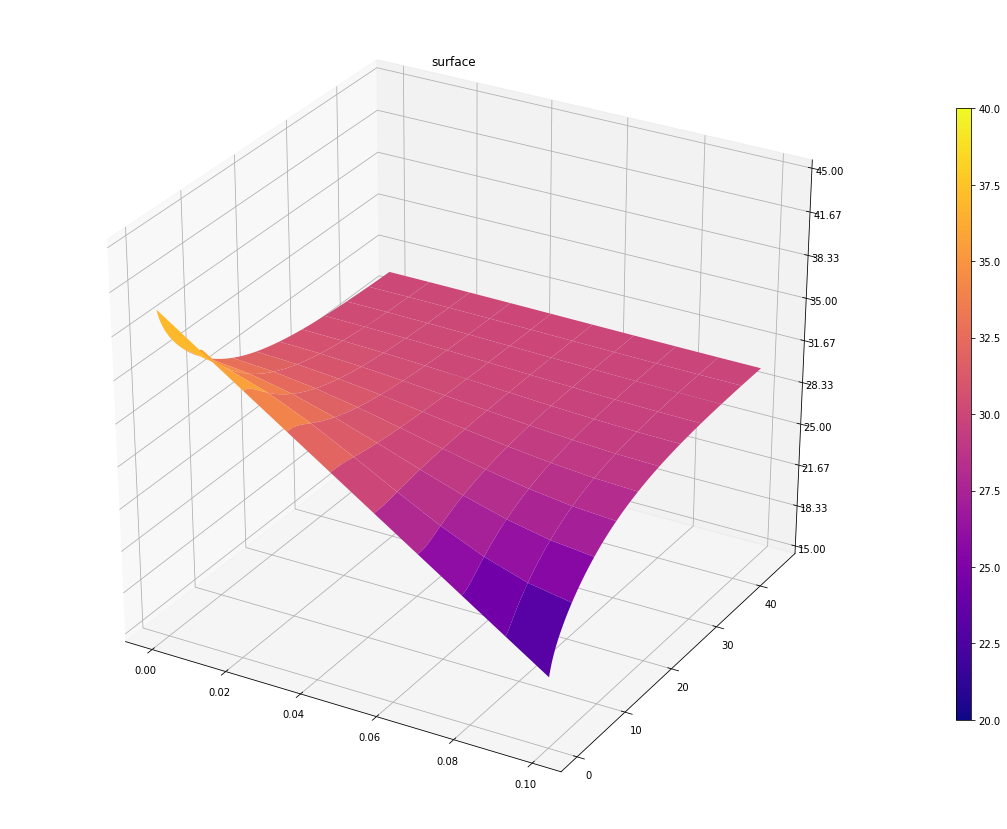

In [12]:
Total_T = np.array(Total_T)
Total_T
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
np.set_printoptions(threshold=sys.maxsize)
X, Y = np.meshgrid(x, t)
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
# Z = np.array(Total_temp)

surf = ax.plot_surface(X,Y, Total_T, cmap='plasma', rcount=10, linewidth=1,ccount=450,  vmin= 20, vmax=40)
ax.set_title('surface')
ax.set_zlim(15,45)
fig.colorbar(surf ,shrink=0.75,  aspect=40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# clim(-30,30)
print(ax.azim)

# Set rotation angle to 30 degrees
# print(Z)
plt.show()